In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
file=pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S02W4953_hour.csv',header=0,delimiter='\t')
file.isnull().sum()
file=file.dropna()
file = file.set_index(pd.DatetimeIndex(file['datetime']))
file.head()
 

,datetime,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-05 11:00:00,2017-07-05 11:00:00,1470.556030,1389.960327,1475.128052,599.853027,0.000000,1604.250000,1238.140991,0.060059,294.700002,...,1018.250000,516.166667,0.0,6.037200,22.816667,24.983333,15.716667,63.833333,34483.333333,2.833333
2017-07-05 12:00:00,2017-07-05 12:00:00,1470.556152,1391.007935,1475.128052,599.853027,14.714286,596.379700,1238.201050,0.060059,300.549998,...,1018.233337,662.666667,0.0,6.960717,23.466667,25.400000,15.633334,61.166667,33350.000000,2.000000
2017-07-05 13:00:00,2017-07-05 13:00:00,1470.579590,1391.560547,1475.128052,599.853027,11.562675,801.231201,1238.204956,0.003906,285.750000,...,1018.216675,694.500000,0.0,5.372850,23.983333,26.283333,15.466667,58.500000,36666.666667,1.666667
2017-07-05 14:00:00,2017-07-05 14:00:00,1470.579956,1392.567749,1475.128052,599.853027,0.089636,960.882324,1238.204956,0.000000,294.550003,...,1018.250000,812.666667,0.0,9.047567,24.233333,27.116667,15.483333,57.833333,35400.000000,1.666667
2017-07-05 15:00:00,2017-07-05 15:00:00,1470.581055,1393.423828,1475.128052,599.853027,0.000000,837.653625,1238.208984,0.004028,311.250000,...,1018.366669,811.000000,0.0,9.430167,23.950000,26.583334,14.983333,56.833333,35000.000000,1.500000


In [37]:
GP = file['gasPower'].iloc[220:388].between_time('6:00', '22:00')
Q = file['Q'].iloc[220:388].between_time('6:00', '22:00')
T = file['T'].iloc[220:388].between_time('6:00', '22:00')
datetime = file['datetime'].iloc[220:388].between_time('6:00', '22:00')


GP

datetime
2017-07-18 10:00:00    0.003052
2017-07-18 11:00:00    0.000000
2017-07-18 12:00:00    0.004028
2017-07-18 13:00:00    0.003906
2017-07-18 14:00:00    0.004028
2017-07-18 15:00:00    0.000000
2017-07-18 16:00:00    0.003052
2017-07-18 17:00:00    0.003906
2017-07-18 18:00:00    0.000000
2017-07-18 19:00:00    0.003052
2017-07-18 20:00:00    0.004028
2017-07-18 21:00:00    0.002930
2017-07-18 22:00:00    0.000000
2017-07-19 06:00:00    0.003906
2017-07-19 07:00:00    0.004028
2017-07-19 08:00:00    0.000000
2017-07-19 09:00:00    0.003052
2017-07-19 10:00:00    0.003906
2017-07-19 11:00:00    0.003052
2017-07-19 12:00:00    0.000000
2017-07-19 13:00:00    0.004028
2017-07-19 14:00:00    0.002930
2017-07-19 15:00:00    0.000000
2017-07-19 16:00:00    0.003052
2017-07-19 17:00:00    0.004028
2017-07-19 18:00:00    0.000000
2017-07-19 19:00:00    0.002930
2017-07-19 20:00:00    0.003052
2017-07-19 21:00:00    0.002930
2017-07-19 22:00:00    0.000000
                         ...   

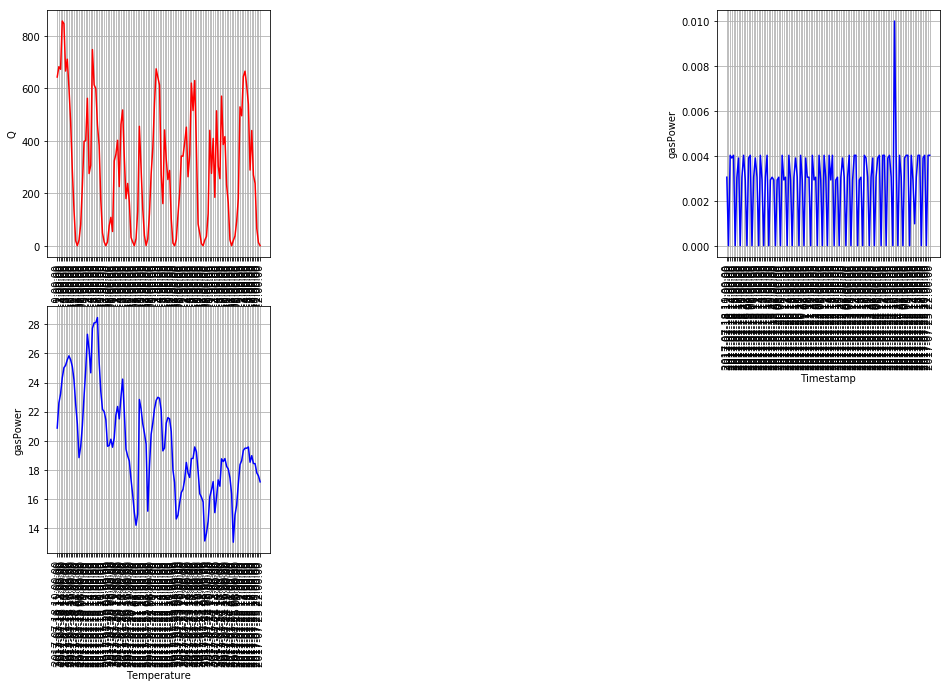

In [38]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(datetime,Q,'r')
plt.grid(True)
plt.ylabel('Q')
plt.xlabel('Timestamp')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.plot(datetime, GP,'b')
plt.grid()
plt.xlabel('Timestamp')
plt.ylabel('gasPower')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.plot(datetime, T,'b')
plt.grid(True)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA7YAAAKvCAYAAABeVFN/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsnXu0ZFdd5z+7XvdVfR/9uul0h3RCIiQBAknzyOCEO8QRmAdRBzQuEHRYZjkLR0dxnMSFgChqFI2iwkw0SkAlRGAkoyBqkgskhIQ0gUASknRene6EfuT2vX3f9drzxzm76tSpU++qW/dWfT9r1aqqfR5771PVt8+3vr/fbxtrLUIIIYQQQgghxFYl1usBCCGEEEIIIYQQ7SBhK4QQQgghhBBiSyNhK4QQQgghhBBiSyNhK4QQQgghhBBiSyNhK4QQQgghhBBiSyNhK4QQQgghhBBiSyNhK4QQQgghhBBiSyNhK4QQQgghhBBiSyNhK4QQQgghhBBiS5Po9QDaYefOnXb//v1191teXmZsbKzsGdhybb3uX/MZnDnW4+DBgyettbvq7iiEEEL0Cc3cd0L/3BMMynwGYY697r/amOrR8H2ntXbLPi699FLbCHfccUfF81Zs63X/ms/gzLEewH12E/wN0EMPPfTQQ4+NejRz39lP9wSDMp9BmGOv+682pno0et+pUGQhhBBCCCGEEFsaCVshhBBCCCGEEFsaCVshhBBCCCGEEFsaCVshhBBCCCGEEFsaCVshhBBCCCGEEFsaCVshhBBCCCGEEFsaCVshhBBCCLFpMca80RjziDHmkDHmmojtQ8aYT/vb7zHG7Pfbdxhj7jDGLBlj/jR0zKXGmO/4x3zEGGM2ZjZCiG4hYSuEEEIIITYlxpg48GfAm4ALgZ80xlwY2u1dwClr7XnA9cB1fvsa8OvAr0Sc+mPA1cD5/uONnR+9EGIjGUhhm370Uc694QbI53s9FCGEEEIIUZ1XAYestU9YazPAzcCVoX2uBG7yX38GuMIYY6y1y9baO/EEbhFjzB5g3Fp7t7XWAp8AfqSrsxCix6ytxfjFX4SVlXivh9I1Er0eQC/Y9ZWv8IJPfQpe+1q46KJeD0cIIYQQQkSzF3gm8P4I8Opq+1hrc8aYBWAHcLLGOY+Ezrk3akdjzNV4zi7T09PMzs7WHfDS0hIAs7OzLC0tVTxHbduKbb3uX3Nsru3b307xkY/Azp1JXvGKhU0xJvfcKQbSsY2tr3svrr2W1Mlqf/OEEEIIIUSPicp9tS3s09L+1tobrLUHrLUH9u3bx8zMTN1HOp0mnU4XX4ef+6Wt1/1rjs21DQ2NADA0NLppxuSe6z0aZTCFbSZDfmgIslnO/uQnez0cIYQQQggRzRHgrMD7fcCz1fYxxiSACWCuzjn31TmnEH2Ftd7vOfl8/9ZJG0hhG19fJzs5CRddxPDx470ejhBCCCGEiOYbwPnGmHOMMSngKuDW0D63Au/0X78FuN3PnY3EWvscsGiMeY1fDfkdwOc7P3QhNg+FgvfczyWGBjLHNra+TiGVgpERYsvLvR6OEEIIIYSIwM+Z/XngS0Ac+Etr7YPGmA8C91lrbwVuBD5pjDmE59Re5Y43xjwFjAMpY8yPAD9srX0I+G/Ax4ER4Iv+Q4i+xTm2hUL/OraDKWxdKPLICLFTp3o9HCGEEEIIUQVr7ReAL4Ta3hd4vQa8tcqx+6u03we8pHOjFGJz4xzbfha2AxmKHHRs42tr9Q8QQgghhBBCiC3KIDi2gylsMxkKzrHNZHo9HCGEEEIIIYToGoOQYzuQwjYezLF1S/8IIYQQQgghRB8ix7ZPia2vlxxbCVshhBBCCCFEH1NybCVs+4pg8ai4hK0QQgghhBCij5Fj26cUi0eNjno5ttWXOhNCCCGEEEKILY2TOxK2LWKM+SVjzIPGmO8aYz5ljBn2F9i+xxjzmDHm0/5i2xhjhvz3h/zt+7s1rnggFNkUCpDNdqsrIYQQQgghhOgpzrFV8agWMMbsBX4BOGCtfQneotpXAdcB11trzwdOAe/yD3kXcMpaex5wvb9fVwhWRQZgdbVbXQkhhBBCCCFET9E6tu2TAEaMMQlgFHgOeD3wGX/7TcCP+K+v9N/jb7/CGNP5K5/PE8tmizm2gIStEEIIIYQQom8ZhBzbRLdObK09aoz5MHAYWAX+GTgIzFtrc/5uR4C9/uu9wDP+sTljzAKwAzgZPK8x5mrgaoDp6WlmZ2frjmVpaYnZ2VmWlpb4yj//M5cDa8DDTz3FBcDX77iDpW3bAIr7uefN1Nbr/jWfwZmjEEIIIYToH+TYtoExZgrPhT0HOBMYA94Usaur3BR1lSuqOllrb7DWHrDWHti3bx8zMzN1H+l0uvh8+StfCUAineaCSy4B4DUXX0w6nS7bzz1vprZe96/5DM4c6z2EEEIIIcTWoeTY9nggXaSbocg/BDxprT1hrc0CnwP+DTDphyYD7AOe9V8fAc4C8LdPAHMdH9XaGkB5ju3KSse7EUIIIYQQQojNgNaxbY/DwGuMMaN+ruwVwEPAHcBb/H3eCXzef32r/x5/++3WdmEdHj+fVsWjhBBCCCGEEINAqSqyhG3TWGvvwSsC9U3gO35fNwD/C/hlY8whvBzaG/1DbgR2+O2/DFzTlYH5IjafSknYCiGEEEIIIfqeQcix7VrxKABr7fuB94eanwBeFbHvGvDWbo4HqO7YplJd71oIIYQQQgghNppBqIrc7eV+Nh8KRRZCCCGEEEIMECXHtrfj6CYStoE2IYQQQgghhOg3lGPbjyjHVgghhBBCCDFAuJK8CkXuJ+TYCiGEEEIIIQYILffTjzhhK8dWCCGEEEIIMQCoeFQ/EnRsk0lsLCZhK4QQQgghhOhbVDyqHwkKWyA/PLyhwja+srJhfQkhhBBCCCGEikf1I2trgF88Cl/gbpDYHH/oIV775jfD4cMb0p8QQgghhBBCqHhUP7K6SiGRgHgc8HNtN8ixHTpxglg+D0eObEh/QgghhBBCCOEErYRtP7G6WgxDBsgPDW2YsDX5vPdiaWlD+hNCCCGEEEKIkmPb23F0k8EUtn4YMvihyBuVY+uE7eLixvQnhBBCCCGEGHicU6sc235iddVzaX02MhRZjq0QQgghhBBio3GOrYRtPxEKRd5Ix1bCVgghhBBCCLHRKMe2HwmFIivHVgghhBBCCNHPqCpyPxLOsd3IUGSXrS1hK4QQQgghhNgg3Dq2Kh7VTygUWQghhBBCCDFAOEErx7afCBeP8oVt6sQJpr/0pa52bVQVWQghhBBCCLHBOMdWxaP6ibW1yBzbvZ//PBf87u92VXQqFFkIIYQQQgix0cix7UfCocipFKysMHL0qNewsNC1rhWKLIQQQgghhNho5Nj2I1E5tvk8o4cPew0StkIIIYQQQog+ouTY9nYc3WQghW1Fji1I2AohhBBCCCH6klJVZDm2/UN4HVv/dSyX8xq6KWzdTyQqHiWEEEII0RDGmDcaYx4xxhwyxlwTsX3IGPNpf/s9xpj9gW3X+u2PGGPeEGj/JWPMg8aY7xpjPmWMGd6Y2QjRG5wMUShyn2DyecjlykORh0N/x+TYCiGEEEJsCowxceDPgDcBFwI/aYy5MLTbu4BT1trzgOuB6/xjLwSuAi4C3gh81BgTN8bsBX4BOGCtfQkQ9/cTom+RY9tPFArE1ta8lwHHNihyAQlbIYQQQojNw6uAQ9baJ6y1GeBm4MrQPlcCN/mvPwNcYYwxfvvN1tp1a+2TwCH/fAAJYMQYkwBGgWe7PA8hesog5Ngmej2ADWNmhotWV4FyMZsPiFygq8KW4HI/1navHyGEEEKI/mAv8Ezg/RHg1dX2sdbmjDELwA6//euhY/daa+82xnwYOAysAv9srf3nqM6NMVcDVwNMT08zOztbd8BLvoExOzvL0tJSxXPUtq3Y1uv+Ncfm2jKZ/QDkcnZTzXG2gX9TjTIQjq3JZuHuu9l+331AuZh1Ind1zx5sLLYxjm2hQCyT6Vo/QgghhBB9QlTcZNgdqLZPZLsxZgrPzT0HOBMYM8a8Papza+0N1toD1toD+/btY2Zmpu4jnU6TTqeLr8PP/dLW6/41x+baEomk/52Ob5oxued6j0YZCGE7cvSol1ub9D7QiuV+gNW9e8mNjW2MsAXiKytd62fTcuONXPiBD/R6FEIIIYTYOhwBzgq830dl2HBxHz+0eAKYq3HsDwFPWmtPWGuzwOeAf9OV0QuxSXDBosqx3eKMPv00AI/+0i/BWWexclbpb1xR2O7bt7HC1g+LHii++lV2f/nLMD/f65EIIYQQYmvwDeB8Y8w5xpgUXpGnW0P73Aq803/9FuB2a63126/yqyafA5wP3IsXgvwaY8yon4t7BfDwBsxFiJ7hBK2qIm9xxvw1ao/PzMDhwyy96EXFbS4seXXvXvIStt3FLXP0zW/2dhz9zB13sP3ee3s9CiGEEKIjWGtzwM8DX8ITn7dYax80xnzQGPNmf7cbgR3GmEPALwPX+Mc+CNwCPAT8E/Bua23eWnsPXpGpbwLfwbsfvmEDpyXEhlNybHs7jm4yEMWjRp96Cs4+m8LISMW2tb174Sd+gpOXXcbOr35VwrabuGrQBw/CK1/Z27H0I9bCz/4sL8zn4Vd/tdejEUIIITqCtfYLwBdCbe8LvF4D3lrl2A8BH4pofz/w/s6OVIjNi3NsFYq8xRk9fBguDC955lFIpeDmm1nbu5dcOi1h202CwlZ0nLGnnoLHH2foxIleD0UIIYQQQmwilGPbD+TznrC94IK6u3Y9xzbg/UvYik6z8847AUgsL8Pp0z0ejRBCCCGE2Cwox7YfePpp4plMVcc2yEbk2OaHh4EBrYrshO2hQ8Tda9Exdn71q2D8P1ZHjvR2MEIIIYQQYtMwCDm2/S9sH3rIe27EsU2nPafLhpdH6wwmn/f6YEAd28VFVs84A4Btjz3W48H0F0PHjnnX9D//Z6/hmWdqHyCEEEIIIQYG5dj2Aw/71dsbDUXO54mvrXVlKCaf9/qArvWxqVlaYuHiiwHY9uijPR5MfzF1//3ei5/7Oe9ZwlYIIYQQQvg4306hyFuZ0VHmL74Ypqbq7loUnV0KkzWFAvmREYjFBs+xzedhdZXVPXvgBS9g2/e+1+sR9RUJ95299FKsMRK2QgghhBCiyCA4tv2/3M+73823LrqImQZ2dcI2sbzclaGYfB6bSEA6PXDC1jnU+ZERePWrGf/KV3o8ov4i5iIAJibIbN/OkIStEEIIIYTwkWM7YOT9/NeuCtt4HNJpEgNWPMoVy3LCdvjYMTh2rMejCjA/77nKW5T46io2FoNUivVdu+TYCiGEEEKIItY6x7bHA+kiErYBuu3YUih44mMQHVt/vk7YAnDPPT0cUQmTy8ELX8ieL36x10NpmfjamndtjWF9925VRRZCCCGEEEW0ju2A0fUc24BjO9DC9pJLKMTjm0bYJpaXYW6OoRMnej2UlomvrRWXklrbvdtzbLtU3VsIIYQQQmwtnKC11vTtLaKEbYANybEddGE7Ogqjoyyfe25PhW1qbo79H/84FArE/c/b5HI9G0+7xALCdn3XLlheLhWUEkIIIYQQA01QzParaythG6DrObaFgidst20bXGE7MgLA6QsugHvv7Vle6/a772b/TTfBY48V851jmUxPxtIJ4mtrFJyw3b0bgKHjx3s5JCGEEEIIsUkIitl+LSAlYRsgPzwM8fjGFI86fborfWxWElHCdnGR0cOHezKemHNnFxaKoeexLezYxldXS46thK0QQgghhAgQdGy3cL3UmnRV2BpjJo0xnzHGfM8Y87Ax5jJjzHZjzL8YYx7zn6f8fY0x5iPGmEPGmAeMMZd0c2xVBgzj48XQ1I6fPp/3ikddfjkj3/8+fO1rXelnMxJ2bFf37gVg6PnnezIek816L+bni45tsW0LUiwehR+KDAxv4ZxhIYQQQgjROYKOrUKRW+OPgX+y1r4YuBh4GLgGuM1aez5wm/8e4E3A+f7jauBjXR5bNBMTXctNLDq273wn2W3b4MMf7ko/m5GyHFvw1vOld3mtRXd2fr74Q0ZsCwvbshzb7dshFiN18mSPRyWEEEIIITYDyrFtA2PMOHA5cCOAtTZjrZ0HrgRu8ne7CfgR//WVwCesx9eBSWPMnm6NryoTE93PsR0b49krr4S//3tGBmRZlqKw9cVXr4WtCYQiJ/pA2MbX14s5tsTjsHMnqVOnejsoIYQQQgixKRgExzbRxXOfC5wA/soYczFwEPhFYNpa+xyAtfY5Y8xuf/+9wDOB44/4bc8FT2qMuRrP0WV6eprZ2dm6A1laWmJ2drbsGYhsmy8UoIH9Wml7VTZLtlBgdnaW7A//MC/4279l6h//kRNve1tD5+vGmDaqLb+wQCGZZHFtjdnZWcz6OgCZ5eWezPFMX8w+fvAgeSe619Y6PpaNms9rVlZYi8eLbUvpNLETJ1oeixBCCCGE6B+UY9seCeAS4GPW2lcAy5TCjqOI+umgYpUla+0N1toD1toD+/btY2Zmpu4jnU5XPFdrm9y3j9T6et39WmmLW0t8eJiZmRmSZ52FmZpibHW14fN1Y0wb1TaSyxEbHy+2jYyPAzCSTPZkTEMx76v/wh07GPXd21Sh0PF+N2o+ifV1Ytu2lbafdx6jCwstn6/eQwghhBBCbB0GwbHtprA9Ahyx1rrFSj+DJ3SPuRBj//l4YP+zAsfvA57t4vii6eJSPCafh1jgkg/Qerbx1VXwl1MCKMTjQA9zbF3YcSAUecuuY2ttWfEoAM44Q6HIQgghhBACUI5tW1hrvw88Y4x5kd90BfAQcCvwTr/tncDn/de3Au/wqyO/BlhwIcsbSjpdrJLbaYrFowJ9DZSw3bat+H7T5NjOzxN369hu1RzbtTWMtRSGhkptZ5xBam6u/K+YEEIIIYQYSMpDkftT2HYzxxbgvwN/Y4xJAU8AP4Mnpm8xxrwLOAy81d/3C8B/AA4BK/6+G0+XHdsKYbu21pW+Nhthx7bXwjYWXO5nqxeP8sfvCnMBMD1NLJvtWiE0IYQQQgixdRiEUOSuCltr7beAAxGbrojY1wLv7uZ4GsK5qF1wuiqE7dgY8ePHqx/QR8RXV2FPqci1uw6xHmWvR1VF3rLr2EYJ2zPOAPBcWyGEEEIIMdCoeNQgsm0bplCAbri2hQJWObbA5nJst3wosi9sC6EcW5CwFUIIIYQQg+HYStiGcXmgi4sdP7VybEs5tsXiUb12bAOhyBshsk0+Dx/4APFOhgjLsRVCCCGEEDVQ8ahBxLmK/tqenSQ26MJ2Mzq2CwtFkbkRju3YoUPwG7/B1MGDnTtplRxbgKSErRBCCCHEwCPHdhDpkGMbW19n9223lX4eKRQAKkKRY4NaPGqzOLaLiyT8HzE2QtjG/H5j6+udO2mUsJ2aopBIaMkfIYQQQgihHNuBpEPCdsddd3Hhb/0WHDrkNfiCpqJ41NpaUfT2KyafJ76+XiZsicUgFisKvY0mKGJdAauNKB7lBHU8k+ncSaNybGMxMlNTCkUWQgghhBAUCoZk0nvdr8v9SNiG6VAocnEtXPccJWzTaYy1nXXvNiExF24dyLEFIJns/Tq2juHhDRHZG+bYApnt2yVshRBCCCEE1lIUtgpFHhQ65NgW16d1zlwVYQv0fZ5tcX5BxxY8YdujWIiKsONdu4h10kWtgtlAYZuVYyuEEEIIIfDEbCpVet2PSNiG6VSOrRO2TkD5Ai6cYwsBEdyn1BS2PXRsc6OjpYZdu7xlnrostIvCtguhyJGOrXJshRBCCCEEcmwHjw6FIsedIyfHdtM6ttnJyVLDrl1ee5eFdjHHtpOOrR/uXhgaKmsuCtt+rRAghBBCCCEaojzHtrdj6RYStmE67djWErZjY0D/C9tENWGbSPSseJTJ5chECNtuF5Byhao6HYqcHx72CnIFyGzf7rnQzz/fub6EEEIIIcSWQzm2g0gySSGZbD/H1gmXUCgyA+jYFkW+L+SL9DAUOZbLRTu2XRa2Tjh3OhQ5H3JrAbLuhwSFIwshhBBCDDRBx1bCdoDIj4y0HYrckGM7IMK2KPKDOa3Q01Bkk82SnZgoNezcCWxcKHKnHdtCKL8WwLoKARtQFEsIIYQQQmxerIVEwnvdr8I20esBbEZyo6MkN7Iqcp8XjyqK/Chh20PHtjA05IWeLy6WQpG7LAKLocid6Od3f5ezH3mkFIocouD+evX5clJCCCGEEKI2Wsd2QMmPjLSfYxsORZZju+kc20IiAZOTXui5n1u9pYpHfeEL7PnHf/SE7chIxeaC++slx1YIIYQQYqAJ5tiqeNQAkR8dbb8qctixjVruZ0CKRxVFflh89bB4VCyXwyaTMDFBbmwM/BzVrufYdjIUOZtl+MQJOHw40rG17q+XHFshhBBbGGPMG40xjxhjDhljronYPmSM+bS//R5jzP7Atmv99keMMW8ItE8aYz5jjPmeMeZhY8xlGzMbIXqD1rEdUDrq2NYKRfYdzG4LW5PJwDvewfDRo13tpxqxWo5tL4SttcQCjm1+dBT3L73rVZE7uY6tu3YPPxyZYyvHVgghxFbHGBMH/gx4E3Ah8JPGmAtDu70LOGWtPQ+4HrjOP/ZC4CrgIuCNwEf98wH8MfBP1toXAxcDD3d7LkL0ElVFHlA6IWwbyrGNxcgPD3c9x3bsySfhk59k6lvf6mo/1YivrVGIx0v/mhy9CkV2n0UyCWefzdr0dMmx7aDQTs7NwctexvBzzxXbOu3YOiJzbOXYCiGE2Pq8CjhkrX3CWpsBbgauDO1zJXCT//ozwBXGGOO332ytXbfWPgkcAl5ljBkHLgduBLDWZqy18xswFyF6xiBURVbxqAjyo6Pw9NNtnaMixzYqFBlPRHfbsR0+frx8TBtMbH2dwvBw5a8ovRK2/o8NhUQC/vAPeXB2lh90jm0H3c3RI0fgO99h7KmnWNuzxzt/J3Ns6whbK8dWCCHEJsEXmvustc80eeheIHjMEeDV1fax1uaMMQvADr/966Fj9wKrwAngr4wxFwMHgV+01i5HjPtq4GqA6elpZmdn6w54yU9nm52dZWlpqeI5attWbOt1/5pjc22FwmUsLs4B21lZWd8UY3LPnUKObQS50dHOrWNby7FlY4TtUI+FbXx9nUIqVbmhV6HI/mdSzLGdmCiGInfSsTURFZCj2lomMNaaxaPk2AohhOgx1loL/H0Lh0ZZS7bBfaq1J4BLgI9Za18BLAMVubsA1tobrLUHrLUH9u3bx8zMTN1HOp0mnU4XX4ef+6Wt1/1rjs21WRtjeno7AMnk8KYYk3uu92gUCdsIiqHINvx3s3GKYrWesB0e3jjHtkfOXWxtLdJR7FnxqKBj6+hC8SgTkU/b0RzbwFgj17GVYyuEEGJz8XVjzCubPOYIcFbg/T7g2Wr7GGMSwAQwV+PYI8ARa+09fvtn8ISuEH2NlvsZQPIjI5DLtV5IyNrGlvthgxzbY8eA3q2XG19f99aMDbMZHFtHqvPFo6KErTt/p3Jsc35lbeXYCiGE2AL8Ozxx+7gx5gFjzHeMMQ/UOeYbwPnGmHOMMSm8YlC3hva5FXin//otwO2+Q3wrcJVfNfkc4HzgXmvt94FnjDEv8o+5Anio/ekJsXkpFPq/eJRybCPI+9V7E6urZKNCaOuxvo5xbm+t5X7whe3KSstjbYShEyeA3ubYRjq2myHH1tEFxzbmz81EhSJ34rPI5Tj94hez/eDB4nc2SHF+cmyFEEJsDt7U7AF+zuzPA18C4sBfWmsfNMZ8ELjPWnsrXhGoTxpjDuE5tVf5xz5ojLkFT7TmgHdba92Nx38H/sYXy08AP9Pm3ITY1Fjb/8v9SNhG4PIV46urZCcmmj9BUKg2kGObev75lsbZKL0ORY6vrVXPse2hsN0wxzZwzmIocj7f/tyzWVbPOgt+4Rc4tm1bxWbrrrkcWyGEEJsAa+3TxpgfBM631v6VMWYXkG7guC8AXwi1vS/weg14a5VjPwR8KKL9W8CB5mYgxNYl6Nj24vZ7I1AocgTO/WrZSQ0eVy8Uuds5tplMUTh3pBJvC1R1bBOJnoYi9yLHNjjftl1btxbvO95BdmqqYrMcWyGEEJsJY8z7gf8FXOs3JYG/7t2IhBgcrDW4W8N+dWwlbCMoOradELahUGQ2Osf22WeLYdE9Xe6nSo5tL4tHRTm2Ha2KvAHCNvxDSRDr/nrJsRVCCLE5+FHgzXhViLHWPgtUhhwJITrOIOTYSthGkAuEIrfEcmAZtEaW++lmUafDh4svexaKvIVybDsZihyLWNonKJzb/jxyuZrCFmO8AlJybIUQQmwOMn5RJwtgjBnr8XiEGBisNRK2g0hHQ5EbEbbr690LdnfCdvfu3jm2WyjHdsuEIlvrObaJ2mnyhWRSjq0QQojNwi3GmP8DTBpjfhb4V+DPezwmIQaCcse2t2PpFioeFYELRU606thG5di6qsgRwhYod3k7yTPPeM8/8APEu1ykqhrx9fXIdVZ7vdxPmWObSGBjse4L24CQj7fhpBr/L1JNxxY/HFmOrRBCiE2AtfbDxph/D5wGXgS8z1r7Lz0elhADQdCx7dd1bCVsI3AiLNZqiLAvbK0xpaVenGMbXu7HCb6lpdb6qsfhw2THx0nu2EHs2fB65htDbH2dfFSObY+LR5U5tnhCt6NVkSNCkTvl2Lpz13VsUyk5tkIIITYFxpj/CnzVWvs/ez0WIQaNQqFUPErCdoDIu7DUVp0uX9jmR0dJNBCKDHTPsT18mLXpaZIjI70JRc5mieVyVR3bXhaPKoREoU0mO7uObYRjG8vlwBiwtj1h6587PIcwBTm2QgghNg/7gbcbY84GDgJfxRO63+rpqIToc/w6ssTjEItZ5dgOEq6Cb8vL4/jCNpdO11/uxwnbxcXW+qrHc8+R2bEDXC7vRuOHc0c6tsmkF1Lr/rVtFNUc2w6HRketY2tyOfDXnO2EsA1HAISxyrEVQgixSbDWvs9a+3rgJcCdwP/EE7hCiC7ibrVjMYjHJWwHCptIQCzWuvBwwnZsrGK5n7CwzaX9dcnn51vrqx5ra55h5EIwAAAgAElEQVSoHBlpqwpvLJNh+913N3+gL2yrLfcDbHw4chXHttBhx7Zq8ajxcaDNHNtGQ5FVFVkIIcQmwRjzXmPMF4F/Bs4DfgXY19tRCdH/uGJRsZhzbHs7nm4hYRuFMZ4QbFXY+mHFuXS6sipyyGHLTk56L44fb62veqyve3mWbYYi77jzTl72a78GTz7Z3IEuLLuWsO1yZeTU3Bz7brml9HNVFce206HIUTm2sYCw7YhjK2ErhBBi6/BjwA68asifA2611j7X2yEJ0f+EhW2/5thK2FajHYcz6NjWCUUuCtsTJ1rrqx7r656Ac6HILYb9Ftf0XVho7kD/WkQ6tr4o67Zju/tf/5XzPvYxcMWzaji2HV3Hto5j25aD3qBjaxMJhSILIYTYFFhrLwGuAO4F/j3wHWPMnb0dlRD9jxO2xnjitl9DkVU8qhptCtv88LAnKE+f9tqqhCJnt23zqid3UdgWkknw1+Zt1ZF0Qopm1/Z1wrZK8aiyc3eJIXdtnTiv5tgmEt0JRQ7m2ObznXVs6yz3U0il5NgKIYTYFBhjXgL8W+B1wAHgGbwCUkKILhJ0bJVjO4i0U2zJF7ZlFWmrFfuJx8mOj3fVsS34ji20LqaKrmqz1ZvrFI8Knju+vAw/+qOkOrzeblHYuuWbajm2rbjH995Lam6uojkqxzaWzXbEsXVhzoVG1rF1n/mzz3bUkRZCCCGa5DpgHPgIcIG19t9Za9/X4zEJ0feEha1CkQeNdnJSV1YoDA15oqLOcj/ghyNvQI4ttL42b1HwdcGxdecee+op+Pu/Z+K7321pjNVo1LFtuXjUm9/MWTffXNEcuY5twLFtp0p10zm2+TxcdBFnfv7zLfcphBBCtIO19j8C1wOngRcZY5J1DhFCdIBBKR7VUCiyMWYUr3odwCPW2v5P2utAKHIhmazIsSVieZbs5GR3HFtrIZPxxI8vbFutxGuCocgTE40f6IpH+WsDlxEqHuXcxPjSUktjrMbQyZPei4CwtcZUuOcthyIvLpKIGHPVHNtUyhPRGxGK7C/3E19fh/l5hjrshgshhBCNYox5HfAJ4CnAAGcZY95prf1KTwcmRJ+j4lGAMSZpjPkj4AjwV8BNwBPGmGv87a/o/hB7RJtVkQtDQ57oCCz3U4jHvaztEJkuCVsnFDsRihxrNRS5lmMbKh7l+kg020ct8vmSsA2EIttEouKzKKRSrYXqZrOR17Xqcj/JJPmhofaEbaPFo3zHNu7PvZ0+hRBCiDb5Q+CHrbWvs9ZeDrwBz8EVQnSRcmHbv8Wj6oUi/wGQBs621l5qrX0FcAFwrjHmY3il2vuTDuTY2uBSK7lcpFsLkJ2Y6Iqwde5jWShyuzm2LYYi18qxdcWjTDeE7fHjGPevOeDYFpKV0U8tObbWQjZbFI5B3HyCYjnmC9vC0NCGVEUu+Dm2MX/u7YQ/CyGEEG2StNY+4t5Yax8FFI4sRJcZlOJR9UKR/wNwvrWlNWKstaeNMf8NOAm8qZuD6ykdyLEtJBJlocjVwkazk5MwN9fx9VydSLOdLB7VrLD1BVUjObbOsY0320ctjhwpH8vERMmxDdFKjq0TzZGOrf95xjOZ4jJLxVDkoaHO5Ng2WBVZjq0QQohNwH3GmBuBT/rv3wYc7OF4hBgIlGPrUQiKWoe1Nm+MOWGt/XqXxtV72s2xnZoqLx6Vz9cWttaSaHaN2DrEgqHI/nI/befYthqK3EBVZOdsRuWrtszRo6XXgVDkKMe2larIxbzgCMc2FjiXyWbB2pJjm0x6369Mhlb+ujRbFVnCVgghxCbgvwHvBn4BL8f2K8BHezoiIQaAQcmxrSdsHzLGvMNa+4lgozHm7cDD3RvWJqBNxza/Z48nnvJ579tUw7HN+MWYUh0WtsYta9PJHNsWQpGtMZFCMlw8qis5tmHHFqo6trYVx9a5zTVybMHPs3U/DrhQ5PV1uOIKztu9G17/+pb6bbQqshO2UQJcCCGE6DZ+XZYXAl+01v5hr8cjxCDhbMp+z7GtJ2zfDXzOGPNf8UJFLPBKYAT40S6Prbe0mWNbXO4HX4TUCkWemgIgOT/fWn9ViHWweFQ7ObaFoaHIolnh4lFFx3YDhG2kY5tINF08yuW6Fr8rp04x8swzAGWh5bFsthSW7hePSs7Pw6OPMnzZZU31CY2HIlu/KrJb5qmdvF4hhBCiFYwx7wPejncv+XvGmN+x1v55j4clxMCgdWwBa+1Ra+2rgQ/ilWY/DHzQWvsqa+3RWsc6jDFxY8z9xph/8N+fY4y5xxjzmDHm08aYlN8+5L8/5G/f38a82md4uHURsLxcWu4H34msl2NLF4StEz+B4lGtivWisG1WdK6uko/Kr4WqxaPinRS2R4+yvmOH9zpcFTlEIZVq3bF15/6d3+Hi97ynbBv4gjIgbAtDQ2x77DEvPLmFz6Th4lHJJBQKJPwfJOTYCiGE6AE/AbzcWvuTeAbJ1T0ejxADhRO2xrgc2wEUtg5r7e3W2j+x1n7EWntbk338IuVhy9cB11trzwdOAe/y298FnLLWnodX+v26JvvpLCMjnshptqCTtSXH1heyxj9PvVDkjghba+FznyOWyWyaUOTI/FqoWjyq047t2hlnYI3pSlXkohh31/XYMZKLi0B5jm0xnxa84lGpVLHwVCs/NjS63I+bZ8KNSTm2QgghNp41a+0KgLX2eRq8/xRCdIbKqsi9HU+36OofFmPMPuA/An/hvzfA64HP+LvcBPyI//pK/z3+9iv8/XuDE4LNuLZPPslF738/5PNkpqa8MFACjm2V5X5yLse2A8J27PHH4b/8F3bcffemCUWOXOoHKotHdUPYHj3K+q5dnriuk2NbrIpcWS+tKhWO7eJi8TtTz7EtbmtF2Prnrls8SsJWCCFE73mhMeZW//H/Qu9v7fXghOh3Kqsi96djWy/Htl3+CPhVYJv/fgcwb611d/xHgL3+673AMwDW2pwxZsHf/2TwhMaYq/FDWKanp5mdna07iKWlJWZnZ8uegZptjx05wvnA6txcw8ce/5mfYcc99/DUT/0Uj83MsPcrXwFgZWGBY0ePMmZM1bFkx8fhxImafTQy9vSTTwKQm5tj3RfSy9kss/fcwwyQa+FazM7O8gO+cJt/9tmmjn3+mWeIJ5OR8/jG44/zSmB9eZnZ2VmmfUEbX1pq6TOraFtcJH/4MIsXXcRkMsn3H3+cpaUlTh0/TiEWq+jjDF/Qfvm221haW2uoD06f9sacybB0+jRzzzzD9kKBL992G6/IZotieX1hgbu/8hUuA773+OOMBX/kaLCvYNuUf62W19dr7rfqnN25OcAT4I1cWyGEEKKDXBl6/+GejEKIAaVc2DKYObbtYIz5T8Bxa21wfbKoq2gb2FZqsPYGa+0Ba+2Bffv2MTMzU/eRTqcrnuu1nf+ylwEwnkw2fOxuY1h88YvZ/4lPMLpjB6mxMQC2DQ0xvXMnJpmsemxyzx5GV1Zq9tHI2Cf9ysqjwJjvSg5PTDBzxRUUEglGrG36WszMzJD0zfPJ0BzqHbtjdBRGRyP3e6VfNGkkkWBmZoZhX+zFs1m2pVItjbPsWlhLfH0du2cPdmiIvdu3k06nmRodJTY0VDlH//N63WWXNdzHWCpV/G6OJ5Ns9x3S173mNcStJTY+Dv5ncdmBAwC8+KUvJeb3BZDIZpue47D/2Y6Mj9fcL5lOe98H362OZzIN9VHvIYQQQjSKtfbL4QfwAF4K2pd7PT4h+p1BcWy7GYr8WuDNxpingJvxQpD/CJg0xjineB/wrP/6CHAWgL99Apjr4vhq00ro7uoqhYDQKbiqv9lszVBkAHbv7kgo8tCxY4A37rIcWygtMdMC3cyxdYWQgvmtiWb7iWDYvxZr09NeOHQDVZEBaOIaBcON4+vr4If8sr7ubfOFZdVQ5Je+tLUc2waX+ymGIvuubHxtralQayGEEKJTGGNmjTHjxpjtwLeBvzLGaOkfIbqMcmzbxFp7rbV2n7V2P3AVcLu19m3AHcBb/N3eCXzef32r/x5/++3W9vAOvBVhu7JSVgHYBnNIa1RFBmDXro4UjxoOCNuyHFsg34awbXu5nyiq5NhCZ/Jsh7//fQDWzjjDG0OdqsjW/SjRRF51LLikz9oa+AKS9XXvx4BtXhR+uHhUZmqK3MgIXHZZS9W3i1WR6+TYus8+6YdMm0Kh7DoLIYQQG8iEtfY08GPAX1lrLwV+qMdjEqLv0XI/3eN/Ab9sjDmEl0N7o99+I7DDb/9l4JoejK2EWx6nGdEREnFOPNVb7geA7duLBX7awYm5WCZTFLZOsBWGhlpewqi4JmuzgrOJ4lHBKsJxJxDboEzYplLljm1U8ahOOLZu3Gtr3jULCtuAY3v0R3+U+268EaamWvpMWnVsQQWkhBBC9IyEMWYP8OPAP/R6MEIMCoMSitzt4lEAWGtngVn/9RPAqyL2WQPeuhHjaYhWQ5EDIq4sFLnGcj+uv2aXmonCObbxtbUKx7aQSrW8jmnLju3qKoU669g60WyCocidcGyPHYN0mtz4eIWwtVGhyK6tRWEbdmxN0LHNZstDkYeHWduzBx59tKVlpdw1q1cVObzcD7S+lrEQQgjRJh8EvgTcaa39hjHmXOCxHo9JiL5nUIpHbYiw3ZK0GoocdGyDOaS5nPdNqkYbbmqR5eViyGnVHNsW+yjLsW0mQryWY+uEf4Rj27FQ5P37wZiKUOQox7Yodpv4gaFszCsrpT7Cwjbk2Bbxv2c0+YND0bGtJ2z9eSYDwjbW4o8bQgghRDtYa/8O+LvA+yeA/9K7EQkxGMixHXRaWcd2ZaXMnawoHlVLhAwPe321k1Z8+HDxZTAUuaM5ttY2fk2shdOnyTvxFiZUPMpks2AMWNs5YXvBBYDnVhcLO1VxbIthvU185kHHNnnqVGnD2poneqsUjyp+zu7aODe50X7zee9a1VvH1g9DD0YDNBVeL4QQQnQIY8ww8C7gIqB4w2St/a89G5QQA4C77VTxqEGlWcc2n4dMptyxDebY1gtFHh7GWNuUW1jB008XX8YDxaOCObathqGacJGkBoivrUE+T84XdxWEi0fl87B9u3dsp3Js9+8HqKyKXCvHtonPIChsy6par6978wkK20DxqCLtCNsIcR6mbJ7uhwQ5tkIIIXrDJ4EzgDcAX8ZbHaP9AiNCiJoMimMrYVuNJotHuf2q5tjWW+7HOb3tiA4nbPfs8UKR/fBnJ6jbWe6nokhSA7iCRTk/HLeCcPGobBZ27vSObdexnZ/3zuEL20IqVV4VuRuObVjYNhOK3KSwjeVyxVDuWpQta+RfW+XYCiGE6BHnWWt/HVi21t4E/EfgpT0ekxB9jxO2xnjiVsJ20GjSsXUuWFSObUPL/Thh247oePppr5jQued6y/1kMhAYT77NHFsnzBt1/FzBoqqObTyONaZUPCqXg7Ex8sPD7a9j+9RT3nNQ2HbBsQ0u95MKhiKvrHgO/MgINhbzftzooLA1uVxDjq2NELaqiiyEEKJHuP9g540xLwEmgP29G44Qg4GW+xl0mhW2/n5Vl/upF4rsjmvTsV3fvRvGxkqhyIGw10Iq1bpjm8+TGxsDaLiyctGxrSZs8YofOWHrxpsbGyPermMbFraueFSh4P3I0G3H1oVSJ5Pede+wY9twKHKUsFUoshBCiN5wgzFmCngvcCvwEHBdb4ckRP8TDkWWsB00miwe5cI72ykeBbQtbNemp2F01HNss9kyx7atHNtcriRsOxWKjCcmXWVhk8sVhW2i3RzbKGG7uloUojWrIrcobMsc224L21Yc2127ABWPEkII0TMmgJ8BDgB/hidqc8aYl9c6yBjzRmPMI8aYQ8aYayK2DxljPu1vv8cYsz+w7Vq//RFjzBtCx8WNMfcbY7SmruhrKnNsezuebiFhW41YjEIy2bCIqxWK7Jb76WqObT4P3/0uq2ed5a2Ju77uCeqQsG0nxzbvC9uOhSLjO7bBHNtkkvzYWPs5tk8/TW5kpFiMqpBKQT5P3BeQkevYthKKXE3YugrMQWHb6eJRLebYyrEVQgjRIy4Ffg7YC5wJ/CwwA/y5MeZXow4wxsTxRPCbgAuBnzTGXBja7V3AKWvtecD1+C6wv99VeFWY3wh81D+f4xeBhzsyswieegq+8Y0pALJZw9/+rfdcC2vh7/4OMpnKe8b5+SR33rmzbr+rq/Gq+33ve/DII9UNh1o8/TQ88MBE5La77oLnnhuO3BbFZz8bPccolpfj3HXXjshtDz8MjzxSfp/56KPw8MPlc3z8cXjooXHAW8P19tt3tbUQydxckvvumwq1pfj0p8/iuuvg8cfHqh57+nSCL3+5tf5XV2P867/uLh77+c/Dpz51FrfeeiaB7DgymRj/8i/TxbZwKLLLsbUWPv3p6HVt5+aS3HLLPq67Dp580pvPwkKCe+7ZHjm2e+/1xvKHf+jN0WEt/N//CwsL3j3pAw94+113HXz3u+PNX4QaSNjWoJnQ3cjiUb5DuxGObfqJJ2BhgfmXvQxGRrxQ5Igc2/j6ektLCsWCjm0HQ5ELiUR5VWTn2LYobMeeeIKXvPe98NnPsnbGGV6WPKUfHIbm5gDIRoxpK4Uixxp0bMucaefYKsdWCCFEb9gBXGKtfY+19j14zu0u4HLgp6sc8yrgkLX2CWttBrgZuDK0z5XATf7rzwBXGGOM336ztXbdWvskcMg/H8aYfXjFq/6iU5MLc/31cM01L+Ob34Sbb34Bb3sbPPDAZM1jnn56lB//cSqEqbXw2799Ab/+6y+h3i3S7Owufv3XX8KRI5XbrrkG/uAPfqDZqQDw+78PH/jARZHb3v52+MQnzm7oPM8+O8xb3gJf/vKuhva/447dvPe9L+XZZyu3XXst/MEfvKis7X3vg9/93ReXtf3mb8Jv/Za3BOR9903xm795EQcPNtR9JJ/73D5+7dfK6579v/+3h//9v1/INdfAxz++v+qxt9++mw984CJuuaX5fj/2sfP40Icu5Hvf895fdRXccMMLuf76H+CBB0r7ffzj+/nt376Au+7y3pc7tqXiUY89luaqq6gQq9bCb/zGRXzsY+dxzTVw003eZ/tP/7SHa699KVGBlf/jf3hjec97YHZ2d7H9zjt38mM/Bv/yL9OA9/nccIN3nb71rdr/HppF69jWoJl1X2s6ts3k2LYoOia//W0AFi6+GObnS+vYBoW2cwpb6MMElu1p2LFtJMc2kYjMsR06frzpMQJsv+cedt51F5x9Ns+/9rW4nt3ch06c8MY0UfmLYzvL/VQUvAoK22SyZzm2NugO+8JWxaOEEEL0iBcAwV+Ps8DZ1tpVY0y1/5z2As8E3h8BXl1tH2ttzhizgCei9wJfDx2713/9R8CvAjXtS2PM1cDVANPT08zOztbaHYAl/x7g8cefpVA4k7e8ZYmjR18AwMLCOktLS8zOzpY9A8zOznL0qHffduxYoWz7Bz/4IN/4hicqb7vtTmKxymPd/qdPe+7mF794H3v2lO/36KOnWV01VY+t1fb448+xsHAGt98+y8pK+baFhQwnT8YaOu+pUyZyjtXns8ufzzeYni7f7+jROU6dGilre+aZk8zNjZe1PfXUcebntzM7O8v3v++Jqbvuup8XvrD2vKttO378XLLZGLfdNsvqqtd28uTZjI5mOeusVVZWbNVjFxc90ffud6/z0Y+uNfxZfPSjB/mHf7gEgK9+1fts19bg/PPneeyxSe6665vs37/Exz9+L7fccgCAO+54kEsvXeLQoW8BL+eBB75FPj9JLuc+C+9e8rnnyj+La699mAceuIB3v/sBvvSlc1hetv5nsQdrDf/4j3czNlY+zqefXuUVr1jk/vt3c/p0lqWlJb74xa/ykY94Y1lc9NqOHp3j/PNj/MmfPMDq6iKzs4fr/ptqFDm2NSg0UUW41zm2Ew88AOeey/quXdVzbF0fTYooaCPHNp2uOe9g8SiXY9tOKHJ8dRVrDDzxBE++613F9rCwzUYI25YcW3/s7toUCTu29aoiN/m5m0aX+wnuMzWFNUbCVgghRK/4W+Drxpj3G2PeD9wFfMoYM4ZXSCqKqNjdcOhZtX0i240x/wk4bq2t69lZa2+w1h6w1h7Yt28fMzMzdR/pdJp0Os3u3WcC8OSTaTIZ714omRwlnU4zMzNDMjnOpz41Qy43VWzLZr3QzExmrNiWSo3z539eckpf85ofLG6bm9vFxz/+ci6/fKbYFo9793svfOGBYpsbUzY7jrXxsjb3ul7brl17KBQMl15auc2YFKurwxXnSKW8OWYy24ttQ0NjFXMcGUnz2c/OsLS0s6L/RMK7lz3vvFdW9Ltt23aWllJlbRMTO1leTvKDP1hq2759N6urCV772hmyWc/2eOlLX1Fz3vH4BH/zNzMUCpMV21ZWRgGKfczMzLC+PsLERI4dO8aBZNXzuvk8//wQn/3sRRX7jY2l+eIXZzhxYrqs7S//8lKs9b7SL3/5AUZGvN9k0mnvn8PLXnYJ6XSav/mbV5FIeG1nnHER6XSal73MS2O/5JKXMzSUwFoT+ixK/cdiE9x44wVcdNECP/Zjc2zfvg1jkv418cb+4hdfVnHtVlZGmJ727osTiWHS6TR33fVvOXnSX0I1Plz8zIaH4Q1vuJzJybGG/k01ioRtDQqpVOM5tjWqIhuXY9stYVsoeI7t5Zd776uFIrs+mhWN1nqhyL7z2lQo8mTtEINg8aigY9uOsC0MDXlxFgHc51IUtuOVMf3FvNsWcmyLwtZd76gc2yhh2+KPDY06tsRiJQE8NuYVEFOOrRBCiB5grf1NvLzaeWAB+Dlr7QettcvW2rdVOewIcFbg/T4gHJRa3McYk8ArUjVX49jXAm82xjyFF9r8emPMX7cxtUiyWTjzzFV+5Vfgp3/6SQByuZLWfuSRbdxwA3znO6Uf210e4uJi6f/4EyeGOHoULrxwoXhex5137uKzn93HMwFPO5/37oH87KsyTp6EXK6123/Xb9R5s1lYXKz8wf2xx9LccEMp1xhK16B8jsP86Z8SmUvrxlut37W1eJknkc2CtYZg6RM39lOnSvmf9W73HnxwnL/4C7j//sp7Wfc5Bc9x+nSSdDpHMln+OVebz8xM9Lnn55P83u/B175WuhYrK3EOHoSXv/xUsV+XFzs0VCgby9e+Bm94w/cB7/OG6sv9uHG6+QA8++wIJ0/CW95yhFiMsvm448KfRT5vmJ+HHTsyZee9+2548YtPl7V53kwbCc41kLCtQTM5tlGhyP63xxNs9UKR2xC2Y08/TfL0aXjd67wG3wWMr6xU5NgC0Owasc6VbCUUeWqq5j7B4lGu0m92fNwTXy1ci/jaGnnnggaoELZRocju82k2xzYeL7nh4+OeSxqVY+vOu4GhyECpWNXYWFPh9UIIIUSnsdYetNb+sbX2j6y19zVwyDeA840x5xhjUnjFoG4N7XMr8E7/9VuA26211m+/yq+afA5wPnCvtfZaa+0+a+1+/3y3W2vf3oHplZHNeiLi938fXv96L8UqKHhcGGiw7fRpJ2xLItFtHxvLF88bPkcwg8vtHxR2UBIfrS71EhSHUduCQjU8vvn5UmpUSdhWzjG4X3hbtX7D21zb889H77e01JiwjRq7I0ocLy0lGB/PkkzWvsZuPmef7YnYMK6/4PfCtZ1xxlqxX7d9aKj8e5HNQjqdY2QkV7wGrryO53fYoriOEral83pqODgfd1z4s3DXY/t2717X7Z/NwvBwvuwc7t9FN5CwrUG7ocgApFKe+GnUsW1BdEz4+bVBxxZ8YRkVityssPX/pRSGhyEeb9jFTi4u1nVsC4EcWxeKnHXHuJ+ZmiC+uhotbMM5thFLELW83E8qVXLD02mvEvFGLPfTQCgyUPoOjI1RGB5W8SghhBBbBmttDvh54Et4FYxvsdY+aIz5oDHmzf5uNwI7jDGHgF8GrvGPfRC4BS/M+Z+Ad1tr8+E+ukU2C4mEJw6cQ+XcVIBTpyoFjBMYTnwFt4cFTPAcx45RsX/YVXPio5abWG8+Ued125aWEhX1Sd34nEgM9h81x+B+lduqjylK2AZvI8sd20q3NQo39ijxWcuxTSTqObaGeLzA9LQnWCuvmXfuoDh2bTt3Zor9uj5SqZJja21JOE5MZCMd20Si0rF11yTYFo+7727QbY3+brnrMTmZJRYrCWDv34D1Xd9SW7eErYpH1SA/NFRcHqYezgXLp0K/6qRSXrhqLlcRHluGEx8tuJRDJ05QSCSInXMOHD4Mo17cf2JxMToUuVlh6yo+JxJe/m4zju0LXlBzHxuoihxzwta5qb4IbYb42lppngHyQWE7ORn5I4NtdbmfZLIUgp5OewI5GIocKB5ViMeJmcAfO39ZqVgrVZHDeb3VCDu2CkUWQgixhbDWfgH4QqjtfYHXa8Bbqxz7IeBDNc49C8x2YpxhvKAu7wbePQfFinPhgmLXCYQooeEctMCCDEXRdfw4uFqdro+wEHTnblXYun5PnSrWowQ8MZXPe/MI32K6OTqRGBxf1ByD+4X3jxLUbkzBba7t+efB3VIG93OCOngdo3Bjn5srH1OhUHKng+dYWkqwbVsOY2o7tvm8IR63TE9DNhtjYaF8e+kHj8ofQXbuXC/26743w8Ol74WrdpxIWMbHcxXC1hjvx5ZCwVAolMYZ5di6H2PKHdvo75b7LCcmshXubCJhSSTCLq4c2w2n4JbHaYB4RI4tAMlk14tHxbJZzyV0gino2AaEdqHVHFtf6Flf2DaVY9tIKLJzbP0c26Jj24qwrebYBkORd0av7dZyKHIyWRLT27Z57nCV4lE2wmUtpFLdDUUOOrZNRCEIIYQQonXcTT2UnuuHInv3CcEw3ZKAqe7YBkORqwlbJz46HYpc7iyWbyuF8yYD+3vzCTq2ri3KHa02n2pjqufYumT1SyUAACAASURBVGvbaijy/HxJQLpzWOud14Ui18pjzucNiYRlt78iTnghkKjvhWvbtWu92G8px7b0vQiK0omJbDEUOZxjWzqHN87gjwyuLShs3Xzq/WhSmn+5sA22eUGHharXpx0kbGtQDCFtgNjamidOw66sc2y7mGNrcrlSGC0UhW0sn+9Mjm1I2Daao9lQ8ah4vFQ8yndsM204trFqOba+wE8sL8OO6EW+icexsVjzy/2EHNtIYes7tlHCNj801N1Q5IBjq+JRQgghxMYQDLl0YZ3lYqV6KHJU/mm4SFDwHOWhyNHFlkqObWeLRwXHH95WCkWuzLF1Ij7YFuXY1iseFd5WX9i2F4ocdd7lZW+crnhU7RzbGImE59hC+Wfn9Vc9x3bHjpKwjfpelIRtoWYocnj/eo5tveJR7njn2JYL20JFm3Jse0ChiUI78fX1Ur5kkGCOba1Q5HYd26DICY6jE6HILsc2HoexscaEUT7vicgGqiKbXM6rvBx2bFvNsY0IRS5z0qs4tuCHWze73E8yWfrRoFaObSYT+eNGoRVh26Jjmx8elmMrhBBCbABRjm15KHKt4lHVQ5GdmCoUSoKikeJR3XJsy8V6+TY3xyhhu7iYLOaX1ha2nSseNTfXuGMbNfZq53X9j483mmNby7F1IerlP4JMTZXCjusJ23jcMj4e7dhGCdvFxYSrFRuZY1u/eFTJsQ2HHcfjVsWjNgPNVJCNra8Xc1vLSCZJLixALkc+antgP2tMS8WjKhzbYD9RxaM2IhT5tFfau14ocrF4lEtSSCbJpdPejwCt5tjWCEUGqju2+AWkWsmxDYYih3JsbTDHNkKMthSK7PfbEM6xHR31lrCSYyuEEEJ0nXo5tiUBU5ljm83GWF8vr1zrQk6DOaQuJDbo+tVz1Vx+ZSvziTpv7VDkkuvpRKzbv1AwrK7G/XN7bWtrcVZXy+VJrVDkYN5vuC3ojwT3cyKsXo5tVOGraud11ySdrl8V2eXYOmFb6dhWOuunTiXZvbv0PfI8s8rvRTCMeGIiiydBTCgUuSSE3TitNSwtlf/QUivHNuq7NTLiCe9Gcmy13E8PaHod2yjhmkox/vDDACyed171ExjjiZ5uOrYbGYrs/sI06tg6MZlKQSzmFZBqMce2ojI1pVBkoKZja+Px5hxb32XOh0ORA0I9OzHhudeLi9E5thvg2BaSSYjHPcdWVZGFEEKIrhNVFTmqIJATC5kMrKwkOMtfedeF6jqxEnZsndMXi9mGHNvycNPW5hN13qAwjwpFdlVyS0WbKnOKg+cI57RWE1PBMUWFIkc5q4cPV+bHRmFtaexLS0my2dKYq4U4A2zb1sg6toZEolAswFXNsQ2HIk9Pl7utTigGXVzX5hxb8IR8VI5tUBxD6fvhPgu3X1QoctRyP+72OlwBOVwVWevY9ohioZ1wHe4I4mtrVYVt0ncvl170otr9pVKt59g2IGzbXe6n6Ng2IsLm573nBnJsTT5fEpO+AM1OTLQWilzFsS2rVl3DsS0kky2FIhcCy/2UuefJJKtnnOG9fvTRyFDkVnJsY00u9+OuSTPh9UIIIYRonaAzVRITnjBYX4flZSfqvDYnxM4/33t2DlpUkSAoCaK9e1cji0dVW+4neI5m5xN13mqhyLmcJ6qcr1NaxqYkP8JzDO7n6GTxqMcfr2yLYnHRc83d2INiu1qIM3ihyI0Wj0okvNDdasWjwtfEc2yDItbrI5WqXjwKYGEhUTUUuTxaoPz7WKt4VJRj626vg6HYwVDkcN5tN5CwrUFhaAhTKDT0s1Ysk4nOsXUiZ//+0jI21fprUdjGstlyR7KasE2lvHDnFkORXY5tQ8LICdsGqiLHcrloYdusY1soVF3up2HHNpFoKRS56Ni6UGRHMsnamWd6rx99tNxZd2PrtmMbWGe3mUrfQgghhGidYC6ht8xK6eY+ymF1QswJW5cLWi3H1oWw7t+/zIkTBHIkXaXbUhuUO7btCNtGc2zdbdxLXuK2VTqR4TkG9yudv5TXGQ6hbjbHtlFh665taeyla1fLsU2ny3NMo8jlYsXvxdRUpuHiUWHHtnaObaHo2C4sJOvm2Lr9gv2W8sMbW+6n3LEtr4CsHNtNQDOhu7UcWwAOHKh7jo45tlVybDHGE1HtOradDkWOcGwzk5Olv4jf/nblX7Io/HlFObbE4yUhWMuxbbZ4VDjH1oUiO5JJVvfs8V4vL1df7qfJz73ZUGQnbLWOrRBCCLExhG/ggwIhymF1Qsy5hM5hdSIhGHIaPMe55y6H1lYtiZXgkjrBJV265dgGt7nxvfSl3nOUYAvPMbhf+PzWeqHa5dsq+43KsXVjd7U9g/tFER57UGwHBXM4x9c5trWFrSkTtsHvwtKSl2cM5ULw9OnqObbBdWyjHNtwKHJUOLPbz40PSu5weY6tJx0XFip/NHG318lkebh3PF6ZYyth2wMKTQjbWjm2QEPC1iaTLRWPKq5j66ji2IJfGbkdYTs21tFQ5ILLsa0Sijz2xBPw8pez/b776vfp/7WKcmyB0nXpoGNbtSqyI5kkOzVVHFPHcmybCUX+8R/n+296k9fX8DDxTKaxHwqEEEII0TLhXMKgQIhanifs2IaL+YSLRx075uXXvuAF3n1dVDXdYHXldnNsowo1hfsLbnNzdOJwbq4yxDY8R+8c0aHIUL4MEtR2bE+dCrrYlfNpxLEtCdvaju3cnPdZjIzk6+bYulBkgMnJbNl3odzJ974XzufZvTtalAZD1MuLR3mTDju2wXDmRhzbqBxba0uh9FDdsa2+jq2E7YbTzPI4sRrL/QBddWxj4fVR6wnbNqsidzoUuax4lC8Ks5OT8PzzjD/0kNfszlcLf16Rji2UrkutqshdcGwxpujaRoYid7sq8k/9FM9cdRUQiEKQayuEEEJ0lXAuYTBXsZFQ5HBhpSjHdnIyw/bt3n1LVG5mUAi6yrXBczQ7H++c5YKoWvEoN8cLLgBjbNGJLXcJK4tHhUORo/YHT1w54RouHjU0lKdQKDnWUfOtdQ3c2F0octBFPnmyMt/51CkvX9aY0udcrUSPJ2y9zzLs2EZ9L1xbtVDkVCpqHVtbForsxhLl2HpjLlQUj4oStlFh5Pm8YXGxVDzKC7mPLh5lrYRtz8g3sTxOvMZyPwBcckndc7QTilzmEgYdy1T5H4d2QpGL69iur9d3/E6d8pbsSadr7lazeJS1TN5/P0Bja6/Wc2xde611bFtc7ieYYxsuHgWw5gvbKMe2leJRTYUiB2gmCkEIIYQQrRMOuQwKBCdWRkZKbS7E9dxzPSEYriIcLBLkzjE5mWVqyrtHigr1dY5tPm9YWkrg6lm2I2yhPMS5Wo6tm+OZZ8LERDZyGZvwHIeG8sX9os7vHF43p2C/pTVxKYr90vJJlfNpJBT53HO9MYVDkd35g6HQ27Z5b9ytXrVbZa8qsgtF9pbkyWTKnfyRkUp3v1rxqETCEovZihzboaECY2O1Q5FzuRjJpPf5hEORy3NsY/4PCZXfrcXFBNaaslBkt8RQoVDKsc3lTFnV5m4gYVuDZtZ9jVXLsd2xg+X9++s6l9BBx9aYktDqdCiym2M9ITY/Ty6d9v4F1cAmEtHFo/wQ5qlvfhOgMZe4Ucd2+/bq42l2uZ9cDlIp1qanPSG/f3+lYwus+gWkoqoit+LYNlUVOUDxe9Fkf0IIIYRojlrC9tgxGB7OMzlZEgsnT8LISI7hYU8khXNmw47tsWOewJqc9O5bXKhvLhcrunXOVXPio11hGz5vcHzj49mKUORkssDEhCfAw8WjxsezFXPcuXM9snhUvX4zGVhfjxXFlBOeTqwFxx6PFxgZydUNRR4f99ak9cZeHorszh90bNNpT9g636Ha+YPFo9xn536UcIJ6377KH0F27y7dVofzaROJQkUbeEGKwVBkr4hZuWObTHpzDYciB3NswXPHczlT8Vm4axwMRc7nTeA8pRzb0vhUFXnDaSYUOV4tFPnDH+bbv/d7DfVXSKVayrE1uVxFiGuhirAttBuKPDbmtdU7x8ICuSihH6KQTHprwYaLR/kVpFN+CHIzjm2hhrDNjY1VuNjh8bQSirxyzjnceeutcOGFFTm2UNux7XpV5HBf0Px3QAghhBBNEQ65DBePmpzMlIUnP/88xYI/6XQuEKYbnWPrHNtt23IkEpSF+jrB5M7hxIcTtq3m2LrzBnN33fgmJzMVociTkxmM8UJuwznAnktY7tju2lUpbKPmEzwmOCbXFnRsXfir2298PEciYeuGIrv9p6YyxWtbKHjubFjYzs2VhHM9YZvPlxePglIYedDlDoetT087YVoIrVlbKM4nHEa8c2fUOrblocuJRLljG7Xcj9s/+Fm474ATxGFhGxxLqU2Obc9oOBTZ2urFo3bsIONWYK5DIZls3bENiZyia9gtx7beOZaXS453DfIjI15FaTfvYChygIYqMddzbIeHyY6P1zxFq8v9AOR90R8lbIs5thFitDA0BPm8J5IboVDwlqFqQdiuu+/iE080fawQQgghGie4ji1UFo+amsqWubgnT3qiC2DbtmwgTNe7XY9a7mdyMkMsBrt2lS+nMznp7eRCd534cAs1tOrYTk1Vd04nJ7PMz5dCcL3xeft7wrbkCLo1XN0cnQjauTMTGYocnk/wGLdtcTFRbAs6tq5Cr9svna4vbKuNfXk5QT7frmNbHorsHZ8q9js2liOdLnf3k8kC27Z5x7uxlzu2tkzsVnNsg6HIzuGtdGxjxGIldzg4n1wuVna9obT+bXgd2+D43Pc87Ch3GgnbGjQaihzLZjHWRgvbZvprJ8c25ARWC0XuRI4tUF/sLy9Xz3UNkEunvWvnfuILFo8K0FAocr0c223bKs4bpuniURHOaVQo8lqNUGT3WTU0R9cntBSKvHT++d5axgcPNn2sEEIIIWrz3vfCnXd61lW94lFTU5mytW1Pniw5ttu25SpyHoPCdnU1xspKSWBNT1MUhPm8KeZXlsRHuWMbFF0HD8LXvhZdWPOv/xoOHx4pHuPcuhMnhrj+eshkYkUxOTWVoVAoLclz/HhpfFNT2TJHOZFwrnRlKPLCQpL3vAfuv3+yuP/oaJ6hIc+x/T//x+vfiTjnep4+nSi27dhRcmzdud1+27ZlicdtmWu9uhrn7/5uXzFw0n0+4bG76+jOH6wU7Rxbd3sWPP+XvgTf+c5EYP6l4lFQHoq8fXumwt3fvt1zvsFzO8vzaW1km3c9o6oiV4YiT0yUhyIHbzHda7e/G3P4u1VeFTlWFtLs2tx3RY5tD2g0FLkoSKo5hQ3SVo5tWFx1O8e2Ace2qnMaHI8Tyq4U4P9n782jLTnOOsFf3PXtVa9Ktah2SVWqkmRtlix5wXZhgy2bdgvc2LiHsc20GUFjwDR9+hyaHpbuGZ+h6T7Ndgxjt03bQPcYegFk2oPhGBfGgOVFkiVLsqSSqiTVptrr7XfLmD8ivhtfRkbmzXtv3nqvSt/vnHfue5GREfFF5Hvv++W3eRZbrRQwNlZMjO2v/iqe+chHMofoN3lUKDsxEVtdKoH+Cq3Y/ySpdWzRB7Glv5QDWGw7ExNY3rFDiK1AIBAIBCPA7/wO8PDDhpBlxdiShY/X/Lx0yVjrAENsnTUzSWzJcklWwtlZRzQMMYlibQsL5sU6kQ9X17WCd74T+IVfeBUeeywuyze/OYv3vx/43Oe2dWNXycL4n/7THvzszwKPPz4Ts9gCbk5uxZyebnWtnZSwKCTjbbddxORkG7/+68Dv//7umDwbNgB/+Zdb8OM/DnzpS5sYYXXWXGqbmmqjXDYWVn9909PtLhEk/Mf/eB1++7f34qtfRXftlAxqerrVlYlK3NALiFbL7MvFi+kW25Mnx/D93w/83u85eei5oDn8PePWfb6PALqknLv6UpsfH7tuHbC4WM6sY1utmvEXF1393IDzYXf88fEOxsedKzLtCdmO/BhbY1FOto0CQmwzkNcVuURkdA1ZbDOJ7eWIsV1aymexpfGoSBeRQuMXgeXt24H164vJinz77VjYvz9ziIGSR3kEk14ycOtsVK8Du3YFSTedVTnnvCWy2A5AbAFg/sYbhdgKBAKBQDAC1GrGihlFJksvJ7bcCtdsGvdSTnapDYiTKbKgEVkxVRLNPdS/XgdaLaPWU53UDRvAkjOZa1Ssgt6Rf/KT1+HsWWBioo1/+k+dG3GjAfzGb+yz6yrF4mgB4Pz5euKab8nj8lSrSTLlywgAr33teXzuc3+Lt7zFjE3ylMsas7PxeZMxtpUYsavVzD756zMxyVGXeD78MPCnf7odgFPD/bXT3tK+j4+7DNWLixVo7UgqJ7ZaA7/5m/uwspKUh5+f/wykPReAi7H1k0f5bYB5LtrtUmZW5ErFyNjpmH7knkyIuyK7s6CzazTKdk9cfx5jWy7rBNmlZ7loCLHNQDcJUQ8S143/LILYDpA8qtRqxd1fMSJX5BHE2HYTTHnEFgBw3XWYu+kmYHy8vxjbHPOmYaByP35JJfsXIFGz9sEHcfRHfiQ552V0RQYssT12DFWe4UEgEAgEAsHQqNXibphpMbbNpqk/yt2TqQ1wWZGpxEq1miQkZj5OYKjWaClBPoiQkT2h1QKOHJnEgw9uw4c/DPzETzyHv/s74K/+ajMA4Ld+C3jppQmUy3F56nUT61kq6e5cSYttNSEPEbNm0xEnY7GtotNxMpK7rdlHJw8RdZq31XLz8rhfvu9E6lz25DZKJUOoeYwtd+YjG4O/9ihSXWszYDJa0z5SQqsQsf361zfgq1/diHLZvXggefi+0LVezwXJljd5lHnhoTKTR1WrfB3pFlu65l6aGLlXVkpdd2Mzd7y0D4+x9WOAi4YQ2wxE1apxhb1crsgDJo9S7XbCxbWnK3Ja1egQBrHYLi46cp2BDr06DBHb//k/cfinfxoYH89tse3UakAgjjUvirDYdl2RfeJ5++0ueRND5zK6IgOW2AKYfuaZge4XCAQCgUAQBhEJn2AAcVfkRiOu8PM2wFgEo0ih0XCuuyahjyEwVPeUYjWNdTJuEZyaMrGjgLvGie3zz09Ca4Uf/3HgvvtOYWwMOHzY6GWPPgps2bKCXbvi8pTLGr/wC8BP/MRhO46zwpG77PJyKSEPrdPIYyzQZPVcXnYyEkLy/NRPAT/7s890SS+RJDdvOUacnMW21F3Dr/wK8La3vRyLsX30UeD2200VDlIB+do5KacXBERs221gZYUslvE6tu028OyzZj/f/GZ3zkQOzX6acyVZ+XNBsvC1kGy9YmypP+0j2UTSXJHjLx7iZ8FjbOmlyfS0e7aazVLXTd7sV+/kURJjuxpQKpfrbqEW25WV/khnFKHUbiey7WaW+9E6H1EkjDDGtp0SYwsA2L7d1MIdH88dY5tnzizoAcv9cNBZhOJpQ+jbYjsksV3Ytw9QSoitQCAQCAQFw7fYJmNsnRWOXE5992TTN2nhpPG4xZZcfDkRpKy7vtUTiBNb51ZrLKVk4aR56/VOd1xOUv7FvwBe+9pzdhyXEIiIqi8jX2ezyS3QYRmBuGs1yfPe9wLf930nu+7eNG+1GnUty/yFQtraDxyYj8XYNpuOHDcasBZkt3YigobYJi22/ln4rruAiXUlV2QeY+vOLr8rsouxdXKlxdjWaoDWqitrGrGlNnrxkBZjS6R8YsIR+kajnCC2vtsxueGHXvgUCSG2PZCn7muhMbaAqeuaF5x0MqS5Incz8K6sAE8/7dxa887Rh8W2L1dkIrYhstaHxTbPnFmIhij30x0jEGObOSedSU5CrYaMse1MTgI33ijEViAQCASCguHHdfJYQlLutXalgHwC46yEYaJBBIaIELfYxi2CUYwcUn9Su8wYVEYI3U/q12iYNZCLsy8PuUAbMhm3YnK3Wt9iy4ktjREiUyF5CL6LMbkdc+txuawTlt2Q1VNrs6aJiQ5bX5x88bW7lwHOdZes547Eg10zbrrj4+ny0MsQvmdpzwXJxgk1L/cTstjSHgOhGFtjPc96yeAT9UolwsQE0GiQlbnUrbFM/f3zCbWNAkJseyBPFuFCsyLDxMzmhiVDCYstPcl+7K0lfuOnTgGvehU2f/GLvefg5X5yWGyV+WuZK9Y10xWZcDkttv2U+9E6WE9WWxkSMbYp6Dd5VNdiO2CMLQDg1lsx8eKLg98vEAgEAoEggZCVkOC7YzrLXKlLsJyVMEkEqT1uJUwmjyKLYNyKW0KppEGqWTxON752mrdajVLlofVxMumIrUpYPYnEclfXNBn9taRZOJOJouIlZmhPQgmL/GRLZG3m5DVt7aatA6XC1nO/7mu1qmPk1ZeHv1CIW2yTlm++dveyQbO2ZIwt4CIdkzG2pdhLhtBZ+DG25bK2xJYstnFX5JB11iWUkuRRq4rL7oqM/JY7AF0SljfGliyak0eOAO02xk+cyDWHVsoEApCMGXtCFuxcxHZszJTF6UFscyWPWlgYKnEU0GfyKOqXN8Y2Bd0Y25zx1cNmRQYAzMygvLw8+P0CgUAgEAgSIAtnVvIoImzVajypjtacHPGY1BIjttq6EYdckePJozhharVUlzCZn921uMXWxXqGiK3L5ptM4uSsmKUE2QvF2KbJmCZP/FopRuxo7ckY27BbuLN8m3VOTDhXZH9v+dr5tUolPoZ7KQG7brfvvjz8ueAknvbdj7GNE1vndlwuGzdysuL61mlSq0nlU8pdozGSbuHhGNtGw7g1E7FdWaE1l2PJrdJibOPuyWKxXRX05YpcRPIoDEZsfetgl+CluCKPv/QSAKB64ULvOVotR9LKZbPODIttuQ9iC6VMnC0R1zSLbZ49KcJiS8mj8sQ505qGdEVu25q91UuXcvUfNsYWADAx0d9zJhAIBAKBoCcc6XLJlgik8HM3YrJu+a7FPCaViCCNx0lp3BU5Xu6Ht7VapS7BMD87MhW32MbdX507b9g9l7v6uhI42fK4hEVhGYF4vC9PtuRkjRMn34qbtXb6Ph5nnLTYhtbOr6Wdhb/HnGSTPD5R992OKbMwbyPwRFH8hUc8xjZObOMW21DyqLhbOD8LmoPIcaWiMT6ebrFNi7GNIvdSR1yRVwl5XJGJyHXjTwfEUBZbj+S0Z2aMJdAjl2SxnTh2DABQy0tsGUnrjI9nkn3aj7zxrh1u6Q6RtbGxfK7ICwvFJI8CjItxL5DFNqXcT16LbXPdOqBUyncWGL7cDwDzsmCADNwCgUAgEAjS4VsT42SKFH5n4XPWrbjVj1sz467IRGDi5X44KSUiWK/HExbVapFnTYwTW99iW6tFQUsoXx+/xmNsfXlCbsdxi23IFTmZRZivkxNWv427YofOwpFSstg6Yptmbfav+WPQWfjElu9jFBmCl2ax5a7IWhuX7lDyKL8sj58VmSePAuLE1k8e5cfYprkiEx2i5FEUY2uyIveOsQXcPUJsVwm5XJHXALH1LbYn3vUuPPKxjyXITzfG1lpsa3lqmbZasfE7PWrh9mWxhcuMHFHOcx/9WGyLSB6FnAm80lyR0+rYpqFcBq65Jt9ZoDiLbbnZdJXYBQKBQCAQDA3fFZnHEpLC72I4nYsmb+OfaVmRfSthvW7iK6PIJfjhlkBjOUy6IlcqUbB2rG+x9eUhlY2TclcCpxSQJ5mcKGTFJZC12RFBP9lSPClUKBY4yy3cJVuKrz0UY8sJOL9Gca3ZFtv4Wbg0KX4yrHjSLhqj01GW2CbX7r/woDaKHqSxgXSLrV/HNg+xLZejboxtFIVjbM1Y8RhbI185cRZFQohtD+RxRS4XnBV5kORRvsW2MzGBhb17k3MMarFlJK3XnvQTYwvAlPRBhoUzb/KoIiy2dg0l+suThYJibAEAW7deXmJL+yRWW4FAIBAICkOv5FE8xpaIpiGCrs30TbPYEplKxtgCVDVSdeNOiRy2WqUYYaIxuCUwLca22QzHqfrX6nVDko0rsi8Pd3UtJWJsfTJVrxtCS2pKKMaWrymUvTlr7RRjSxmNjTU7isXRhl2R+42xjSePIjtNSB5KIMZfQHQ6JVvHNp48iqz23EWd2vwXBIBzIy6VKCY3QsgVOZQVmeagMSjGFjDPW6jcD+BIbLmctNhKjO0qoZd1EjBErlOvu9cjA0IXaLFNQ7fcjyVleS22nKT1cs/uuiLnJJlksc0itrmSRxWVFRmMPGYhhdjSOeaNsQUAbNlyeV2R6S+SJJASCAQCgaAwJDP2hrIix5NHxd2TQxZOR1ayYmwBYGHB9SNrHVkhKaYX4Na6bJfYLKsnL7tDSYzI/TnbnTdpJUwjZFwef51+VmSfxKZZm2k9fkbjSkXncEV2Y6XVFPbL49ALAoBbPZPyRJFLIOZqxyYttuEY2yjRxveRW2xNf7d27oocSuQVirHlamSo3I8Zi5cjirddcVmRlVI7lVJfUko9pZR6Qin1Edu+QSn1l0qpZ+3nrG1XSqnfVEodVko9ppR69ajW1g96xZMCQHl5eWgXWGDIGNtQ0qUA/HWWV1Z6Z8f1Y2x7WGz7dUWmGFu/ZFEX4+NQUZRNNrUuro4tinFFHpXFtpCsyPQCoMdLG4FAIBAIBPlBlrmsGFvuzuonlHLur+Ear36MrStJY67zOEhqc8SREyZDBJMW27hLbJY8vGYvjUv90+QJJY9Ki7H15eHr9Ml2qK2fGFtDPqMcyaNKKJeNLYvIYVYdW7KK00sGUp9DybD4vG6MEjod32KbJLYhssv3kYgtuZ377sxZFttQjC1XIxuNUiwrsiOxZLGN4Ftxr0RX5DaAf661vgnAawF8WCl1M4CfA/BFrfU+AF+0PwPAOwDss18PAPidEa4tN/K6Ig9LqIBiY2xT5+Dr3L4dAFDtRai8GNuohxW7ZIlyvzG2WRZbAJnuyCWbybgwV+ROp0dP9HRFzh1jCwBbtpgM1TmyMRcVYwtALLYCgUAgEBQIIoehCtYtTAAAIABJREFUTLyOxCbL/fiuxWkxj0lCFq9XyokTtTniGI+xzSo7Qy6xjrwm5eGkl8Yl+dMs0NztOCuukwhZGhFMK+3jJ5TKmxXZWLOjrsXSzBMqvaS6+5rHYsuzIqfJQy7gnGQ7KymtJTt5VCjulsYGDLEtldKtvv3E2HKLrSG2aa7IyRhbKhF0xRFbrfVJrfXD9vt5AE8B2A7gfgCfsd0+A+D77ff3A/g9bfBVAOuVUteOan150TE+Fc79M4DyysrqWWwt2fNjbNNArsgAgLvvBpDDHdl3RS44KzLF2GZZbIFsYlvuk0ynoS+LLZ3TkFmRAQBbt6LcbKLc4yUKUFxWZABisRUIBAKBoECE3GQJfvKoeIxt3Ero131N1rHt7YrMLbbNpiFY5IBHY3DCFMqKnFUL1rldu1hP6k9WzKzyRWky0loAp26G5uUZkIetY1uraVSr2u5V+tqbzVJ3XynWtVcdW9rHuDzxZFi8RBK3rC8vJy2cZLWnjMZcnqwYW6X4GMXE2JLFlpJvmfWbzxCxpYRSo4qxHUIzzg+l1B4AdwJ4CMAWrfVJwJBfpdRm2207gJfYbcds20lvrAdgLLrYsmULDh061HP+hYUFHDp0KPYJIFfbsnVGXz53LrXfzQsLaNVqA89BbZElU835+eCaQ2M89u1v4zYAi61Wvrm0hi6VoKIIRzZuxHUAopMnM+89e/Ikakp1r+8tl7F8/nzqHG1bj3Wu08lcC30u2d+YTqkU7P+dF17AAQArFy6k793ZswCAxVJpqPOetqRxeW6u573f/M53cBeAx7/zHSzceqvrZwl4S+vc8z95/jxuBtA+frznOqdt29ceeQQLmzYN9Lx969lncTuAh//2b7Gwe3ein0AgEAgEgv5RyyBToXjatBhbshb6MY++lZAITy1AnEIWW5c4qNTNlBxfezwrMhHGEFF315yF0bVll8ypVtNl5PI4ou5nRU5mQPZjm/2zyGOxzVPuh9bG453NvqZZbNuB8wnFDMeTigHAykq520bgz0Aviy3Nayy2rp3Xve03xpayIgPAxYsmWRl/QRJyOyabzJXsigwAUEpNAfjvAH5Gaz2X1TXQlpBaa/0JrfXdWuu7d+zYgYMHD/b8mpqaSnzmbausWwcAmCmXU/vV2m3oycmB56Dvx9evBwBMlErBfqExbjtwAAAwNjOTb67paSjr+nvde95jZFtayrz3mnXroGq1bltpagrjnU7qHOQMPLZxY+Za6LM8O2tuqNWC/Q/ceScAYLpSSV3nOuueW968eajzrlvr8VTKWnjbXbfdBgC49dWvjvdbtw4ol1EeG8s9/83f/d0AgPUrKz3XOW5fBNzzhjcM/Lzd/trXAgBefeBAsF+vL4FAIBAIBEnUvIRFfoxtFKmu1YpcTv020zeesIisZs5KaAhMyWryRGLTYmx5BmSezZcnJaJkUFrHsyL7pXV8Wf0Y27j1MZ7lmbu6hhJK8bF9efg64yQ2SpBdIvZ+pmR3Fn526ahrse1V7of22pFjQ3YpfrXfGFtaZ9x6bK4RsaWXAHztacmjuEMff7kRt9jGybF/PnyMLFfkc+donmSMLbkd8xhb3jYKjJTYKqWqMKT2P2ut/4dtfplcjO3nadt+DMBOdvsOACdGub486GYRziiLUl5evmJibAG4+Mo774RWqnc23lYr5ibcMyvy8jJQqeR2j+4ZY2v3NmtfqtZK3LIvIgZFEcmjAABjY/2dydatAPKVXyokeZTE2AoEAoFAUDjqdWPB4jU8Cck4w4iRgLhlLr3cT5xMEXyLYCjGltYSTz4Ut4Q2m86dlyeP8i3E1J8somkW21C5Hz/Gltq42hSSx5+Xk23Kxtyrti2Bu+7S+qrVeIxt2I06brGlFwQ80o8n6PKzIqcnj4q7o6c9FzSvb53NkzxKMROiP8agyaNCxDZksb3ik0cppRSATwF4Smv9H9ilBwF80H7/QQB/yto/YLMjvxbAJXJZXk1QzGY5i9iuZoxtSh3bTExOolOrAZs3o7VuXb4YW5YVuZtQKyXRUXllBbBkNQ86BcTYdontzEzueUMoInkUAKBe77vcD5Cv/JLE2AoEAoFAsDbhiERSgffjJkOxlC4BUZhocAITIrZpMbbcYktjhLIixxNZOUJGSYxCLrSclJIV109uFbJAZ5EpIopZ5X6cJVZ3LcXJrMjxWFyC2wNnnaVyP1lrNzGz6M7hYpXd2nlJJV7HFkgntn6JpLTngu5Ni7FNc0U2Mbau3Se2WdbzrBhbR2yTMbY8UdTlqmM7yhjbNwB4P4DHlVKP2rafB/ArAP5IKfUhAC8CeI+99nkA7wRwGMASgP9thGvLDarFmklsCy73k8taSBjQYtvYtAkTSqG5YUMui22ijm0UQbVawTJD/RLbtv3tGCYrcnXOeLmvmsXWJ8KvehWWdu3KP/HGjdClUj5iK1mRBQKBQCBYk3BEgkqdhCy2RFaSLpoh99dwHdu4lbCXxZa7HfMxJifbsTFM7K2zHLqsukmiXq8DCwsqtr56HVhcTJb7oftCdWyzYmyzyuNwKzK5UXMSW6sBnQ6XJ0kO4xmq85X7ScbYhi229PKAsktzeXyinlbuh1v3CeE6tsm4W76PflZk33U5ZFH35QnVsc2y2HKvBSLVIU+GIjEyYqu1/grCcbMA8NZAfw3gw6Naz6AgwprlilxaWRm6zAwAY+ErlUZvsV2/Hiv1OiYANGdnTZmZLHjlfsg9u7yygnaA2Jb6Jba2by+LbbmXK3Kp1M2wPCiIXGfWzCXQeqpVVyCM8Nd/jZcOHcINeSculdCcnc3nikzz8r+i/UIstgKBQCC4QqCUug/AbwAoA/ik1vpXvOt1AL8H4C4A5wD8kNb6qL32LwF8CEAHwE9rrb+glNpp+28FEAH4hNb6N4pYK6lFvIYnwa/vyS1zjuwmLba+KzK5uHIVzI+xpbhTGsMQGBe/68ZIJoPisZ5Z8nDLKY+xvXgxmTyqVIJNzlRiVsKwjHwfuTz+Ov1EUcbqGXdP5mv3iW1836OEK3Kvcj+cHPKziJdUMnuczPKcvu/xFx5ufXztoeRRnU665Xtlxdk0qH+jYdzmkxbbcPIofhb5YmzN2ksl3Y0Fp7ZRWWxHnjzqSgcncWkoF0RsoRRQr48+xvbjH8ezP/Mz5vYNG/ou99O1YqdYUMv+b08PkCvyMBbbytwcsGFDPOXbAKAXBKU8xJYstgFyPwhynQWAyvw8tFLAMNZpsdgKBAKB4AqAUqoM4GMA3gHgZgD/WCl1s9ftQwAuaK33Avg1AP/W3nszgPcBuAXAfQB+247XBvDPtdY3AXgtgA8HxhwIjkjki7FNy35bLmuUSjoQYxt1LYH9xNhyiy0Ro5ArMsDdXyNm8UuLsVWBGFuVsHrSvdw6qxS6ZDKt/mpWjC1ZG636nEgU5a/dTx7F9z3uiuyXXgpbbOklQ7MZt9iWSobM8QRdeSzQoXI//gsPWlcoeRRgXH1DLwi0TtaxJaJarQLGtqaDLxlIPc9KHlWrhcv90PmE2kYBIbY90NMVudVCqd0uJHkUAGB8PJNEJ0DEth+L7c03Y3nHDgBAi6yEKfGyplM8xrabUCuFFPXtitwreVTeGNtrrsk9Zxqifiy2WTG2AyCX9RzG7bo9PT0ciReLrUAgEAiuDNwD4LDW+nmtdRPAZwHc7/W5H8Bn7Pf/DcBbba6X+wF8Vmvd0FofgQl3u0drfVJr/TAAaK3nATwFU2JyaPiuyIPG2Jp7o0TMIy/1kjfGlrL5cqLm3FB1YoylJUeyfbLLLW28dqxfx9aPUzXfR4msuyEZ0+Txrxk3X9dGWZFN6Z1st3D63rmAc1fk+NqVcusMuSL7Z8Gv0b7nSR7l3HSjxHPhuyJrHc+A7OQpB/eR5CBUKnFiaz7DZ0FEncfYkhppq20GXZH5WnxiOypcljq2VzJ6uiLbJ7SIGFsAwPS0ySqcF4O4IvPbZ2eN5XV+Pr1TKMYW6Rbb0soKsHFj7jV07GufVKvzZSS23eRRq0FsN2zA5JEjPftV5+bQmpnBULNWq4jKZZSE2AoEAoFgbWM7gJfYz8cA3JvWR2vdVkpdArDRtn/VuzdGYJVSewDcCeCh0ORKqQcAPAAAW7Zs6Vnr/dlnNwG4BfPzZBF0deQPH34KwE3da43GHGszFq9mc77bv1qN8NxzJ9FuX4uTJ1/EwsICtG5icbGJlZUOWq35bn36F198CMC9ePbZEwC2odVawre+9TUA9+CRR55Aq7UfQMOu/y6cOHEGjcYUlGp053vxxWcB7MO5c9ZoEi3j8OEnAdzM5HHru3DhZTSbU2g0IgAXsbCwgEuXTqPRmMDiYqsrI/Uvlzt4/vkziKJtOH78KBYWFlCpRHj++eNot7fg1KmXuvIcOWLWzuWhcY4dew7ADZifj1AqtbGwsIDjx58HcD3m5iKUyxEWFhZw5MjTAPYH195uG71+bs6dhVJNXLy4iKWllu3v1l6pRDh8+DgajWksLJyzZ9HCpUtLqNUiNJtz3bUfOnQI5fJ34bnnjqPT2QlgBY899nUAr+nK02wuMnnM2i9eNPO2Wot47LFvArir+1y0265/p9Ow61O4ePG0bVuxbcD8/PnuWv72bw8BOGif5ag7hlItnDu3CGASR48exoEDJONJaL0Dx44d8eR5I86fbwIYR7O5iC9/+RCq1Tfi+PEGgAlEkXvOjx59GMCrbVyvOZ+nn/4GgLuxsqK6bdS/1+9UPxBi2wM9XZHXCrHtJwMvQ3t62nwzl1Fi2IuxjXpkiu7XYqvLZWByMp2c54mxnZsDdu/OPWcaCiv3MwByWc9hXJG75zYEono91eouEAgEAsEaQchp0f9HmdYn816l1BRMWcqf0VoHFSGt9ScAfAIA7r77bt2rlvvFi+az0zG60rp1Ezh48I04dOgQbrvtpti19esnum3tNvUfx8GDb8KhQ4dQq2ls3rwD7bbGDTfswtTU8xgbq6BUqkHrGjZsmMaUDed61avutWNuAwBMT4/hjW+8EwCwd+8taLcjTExUcPDgQdRqC5id3YROp4nxcdN26NAh3HLLPiuF0TGmpmrYv/9mb82T3fXt3LkF3/72CoAKrrlmPaamprBz52Z85zvLKJWcjAcPvhmHDh1Cve7Wt2/fHkxNHUW9rrFp03a02xGuv34npqaeAwDs339PQp6DB1+PQ4cO4aabbuiuaWysgqmpKRw4cH23rVYrYWpqCrfdtr/bVioBMzNTXVknJ2vevk9ibKyMcnkSSo2hUon3r9U0tmzZiShawLXXGlnHxsqoViegdQMbN850z+LgwYOoVFqYnTVVTCcmqnjDG15j5yF5xnHw4F1WHrP2KJq0fcZwxx13xdY3MzOGgwfvxqFDhzAxYfTOZrOCbds2Y2pqChMTNdtWxZYt07G1VKsRWq0SSiXVladeLwEw8910015MTR1Draaxbp3x6LzxxuswNfUCk6cNrcftWsZx8OA9GBtrYWlpwp5THQcP3otDhw7hnnte3V0Lnc/rXnd3d83URmvp9TvVD8QVuQd6uiKPgtj2Y0VrNIwb8oDO6t3YYPL1CMF3Re5hxe6X2AIAtm7tuiQnQBbbXsmjCrTYroYrcmt62liKe5x/9dKlocsaAYbYiiuyQCAQCNY4jgHYyX7eAeBEWh+lVAXAOgDns+5VSlVhSO1/1lr/j6IWmx3X6a6VSsZdtpcr8soKEEWhOrbhcj88ORHPiNvpuHhaitFsteJ1bF0CqvQYWz95FJWp4cmjyCWY1svlofXx2NA8Mbb+vLQmHttr2sqxtfj93Fqc6269TnGguuuK67sWc5dpF2MbBevY0vhO1lBW5KQ8+V3Uk27HLg44JKuZy4+xJdsGPwv/fPicfiKvej0CRdClZUX2XZF9V+miIcS2B6Jq1WQqTnODtU9AVETyKACYnkaFnqo8aDb7SxzloUts+3BF7mWx7TcrMgDgz/4MR3/kR8LXKKY37Qy0NhbbIohtP8mjeFbkAtA9ix7nX5mfL4TYdsbGJHmUQCAQCNY6vg5gn1LqOqVUDSYZ1INenwcBfNB+/4MA/spW23gQwPuUUnWl1HUA9gH4mo2//RSAp7TW/6HIxeaNsXWZdc3nykrZxoby/prFZNInkdJwuR8ek+rXgvWTRxlCmiRYjtjqRIwtT+9BCZt4rGe9bggNkRrev1LR3bVQ/2pVd8k7V2fzxNguL5djMbZmH0sJYsv7EXhMKieqzWYyMRetMz3GNkmEy2VObHsnjzLrrHTX4WcWjsfYUgZjF6/KY4Z9WXmsMF9fMsY2+bzx/jzGFjC1ayO7rHCMbZLY8jWPAuKK3AtKARMT6e7Ba8AVedD4WsCz2KZZfVNibDMttn1kRQYAHDiA1qlT4WtKoVOrpRPbhQWUWq2+4nrTEFnLdF8W24KyInefoSzrOWzyqCIstrWaWGwFAoFAsKZhY2Z/EsAXYMr9/K7W+gml1L8B8A2t9YMwJPX3lVKHYSy177P3PqGU+iMAT8JkQv6w1rqjlPouAO8H8LhS6lE71c9rrT8/7HodwTJElRM7brWifn4bV8Wq1aQFLY1MhYgTtZHtgmdcdlmR48mgAGBpqdKdn8vjOwhSoii/3A/VmE2Sw6Q8obY0efx1cusfJ+BJspu0EhI5XFlxLwhqNVfuJ2SxpSRcPrH1syLTernFNmmBTk/a1SsrMt1rMi7H5Wk0krKGLLbcAstfmmRZbMmeQ2fByWy9HsqKzC3KSKx5FBBimweTk+muyJaEFEZsZ2b6c0UuymK7sACkxW2m1bENEU2tB3NF7oEoqwwSpWS73Bbbgl2R87qFV5aWxGIrEAgEglcMLOH8vNf2i+z7FQDvSbn3owA+6rV9BeH426ERIl0EbrFNEtswEXTWVvNZLrsyMrx/qDwOtRGxJXJULpuyO8ZKmm2x5VZPX56aLffDia2ryZq0YnKLICe2vox8LdkWzqTbMW/jZDfNFZmfBS/34xNV56ZcYtb2bIuts05nZ0UOlVnyS0P5dWzduuJt3G2drx3wsyJHXWsrt9iGzoLk8ecfG3NkNlTHlq8lVBd3FBBX5DyYnOzpilykxbbSJ7EdxmLbzkOmms1YjG1W3HGp1YKKopEQ27QszN0iWkVYbFcxxjaXK7Ktc9sqKHmUWGwFAoFAICgO2XGddC3dYhvvnySCPL6S96frIYstJ1h0jf7912rZMbZZRL1eN7G73ApHVlyfeNN4IXlCVsJedWz9NWXH2KYTW4qxpfUReQ2tnUgvJ8LpMbZO1lotryuycztOq2/s3+s/F7yNrx0AlEpafXn/ajVKuCdzefz5icxWq1HQMyE+dvh60RBimwcTEz2TRxUZY1teXu6ZGbeLIi22afBdkSnmNURsyQJYNLHNckUu0mI7CLEdMCO1jyjPWVhi2163bvj56nWx2AoEAoFAUCCyLJzcCufIFLWVE+SoVgsTQX8MADYZVRRzda1UjPups9i65FGO7GYTLE7UfXUzdI0TzCz3XOcuHHZ/petZrrt83hCJzVp7OMZWI4pMrdXQSwbjilxi/V28c1aMbchimzd5VMgVOZ6QK7k/aSTej3f2+6e9ZPDHp+/JYstfjvj3hojtKGNshdjmweRk7xjbAomtiqL0urk+ms0Y6ewXPYmt1kCnE5tDV6tAvR5MctV9AVAwse1kuSKTxbYAYktpCks5y/1ElcrAGal95HrJYGUtwmLbEYutQCAQCASFghOsZBIfd8232HKXWEKIaIQImRtfJ4hTpRIFXZF5/CfBj7HllsaQ1TOLTC4thdaX32JrshRHQSKYN8Y2y9rMXZG5xZbWnnRFjrrJo+gaxdiGXJf9GNty2bxkCBF1bimnBGLJrMg8edTwFtsQOU6Ld/b701kQoeXxtf69Ln43fL1oCLHNg6yETiNwRQaASl5LWrNpMjcPiF5WQrJcJqzC69ejErin6y48ihjbXhbbAlyRAQDVam6L7TAvFXz05YpcVLkfsdgKBAKBQFAY8sTYhl2R88bYRokxeH/f1bVa1cHkUX6mZCAZYxu32OYjtpxg5k0elRbXGZInbd6suNus5FHxeOdk3C1fy/KyiRvlyaO0NkmSsmJsadxe8tC8htTT2kuJ/pzk+88Fb+NrB3yLbbJ/FrENx9hGsU93nc+dHE+I7WojK6ETEVv/Vc0QcwHIn0BqyBhbXS6jU6ulEluyXCbmmJ0NEtuuK3K/WZF7IKrVMpNH6VIJWL++mMlqtdzlfnRBbshAzqzI1mJbmCuyWGwFAoFAICgMRFJCSXx4Uh3fFbnZDFsJfdLHkwSFrISUEMgRW2exrdVcuR8XS5m0hHIrIbWF5Ald4+Q4a315iG1IHj4Hn5fmajSS5X7CZ6G7/V0yqCTZ5f1dzGz6GLy/v8e95AklFWs2k9mo+42xpWu9YmwrFVN6KWuMUkl3CTJZavt1RRZiu9qYmUlP6LS4aIhhUQTHWmz7IbbDWGwBaylMIVPkbtz2LbBpFtsRuSL3Sh7Vmp4u7gz6sNgOu/ccq+KKLBZbgUAgEAgKQyihU+hnn8D495prOpGnMkSIXP+kuyontjx5FKVyyZsV2fSNzxe6xt2Zs9bH69im5eJMc7/NmlfrJMkOrZ3G01olLLZpa3cvCGhMN4ZPbMmay8dNy2zs9r3CrMFIXA/dmyfG1rkih8fgLxnSxqDx+Txkqc1yRXYWZUesJcZ2tTEzg3Kae+jiIqKi3JCBgYjtsO6wWcS2bNvbU1PxC5eb2PZIHlVEXdcuarV8xLbRKNYV2U8BGML584jKZXQKsIiLxVYgEAgEgmKRRab6J7ZJIphG8JL9k67IPMbWjZGvjq2/Vn/+fK7I/ZGpOIFLrpPfk0V2e43tx9jyuFu+dtpHHmNLCNW9dfdGsU8gXlOW7xl9r5QbI0SafblCZJev3Z8z7loc7xcag7uxu3V37GdvV2R+r1hsVxtUgieUqXhxsbjEUXYuoI8Y20ZjtBbbPoltN6FUkUQTvZNHtQpwze2iWs3ninzhQiGW0y7KZUNue1hs2zMzhSSs6oyNwRayG3osgUAgEAgE2WQqRGI5CcgiqnkstqE4TO7q6yy2nACnZ+flJYNC8oSuhdxqQ3OFiG3SIhwmglmEOrSW0NpD+5jtiuz20VlVk27cofFpXPdiIYqpcWl7RkQw65z7Sx7Va4zeLxl4HyK0vityqeTOK55ISojt2sDMjKnNGrJuLS4WlzgKcBbbLKsdx4gttn0TW3qdtWHDUGvykWmxPXeukGRKXdRqUHmyIp8/j3aRxBbZZ0FzFiVrZP9Spu6rQCAQCASCvpCV/ZVf82NseZu7P0k+ssgUz35LrqzxGNak1S2cFdklMcoihyEyGbI+ZskTaiNwIh4igvyevG2E0D7SWsI1eDXIvuK7IvtzmfGTVnHuCs5B9/rzUr/k2P0lj+Lxsa4t9JIh/SxInril21hsqexPqL9YbNciiEjMzSWvFU1s8yaP+uY3UT91aug6toAlU0RIPXSJbVqMrWfF7hLb2dmh1uQjM8a2QLIHIH/yqKItxbBW1KyXGufOFUamyYW+nGYJFwgEAoFA0BeoTA0wvCtyiHxku78mXY3jCZuS5CTkitxolJm7rSNEeWJsecKmLHlcGZjehIzLkzZvXvdkQqjcTsh6HVp7iNhmuwvHCW2WPHkstiE34uw6tkmLbdidebAYW99iy8cKEVuJsV1tZBHbhYWRxNhmuiJrDbzznbj+k58cOisyMKDFdnYWpXY7Ye2rLCwYd9qiskRbRFmuyEVbTvMmjyraUozLa7HtkMU2b81kgUAgEAgEPeFiKv12930eYssJQx5XZOof75N0O44TozCZi1s7w/L0cgnOI0+ozZ/Xt3DmJbH9uiKHSH5o7flibJN7HDoffy7+fVqMbb+uyDRv3GKbJMdZZ+FckXvH2AJh62yI7BYNIbZ5QEQiZNUs2mJrLaNZFtv66dPA6dMYO3myOIvtAFmRAWahtajOzRXungvYGNtGI2EhVs0msLhYvCtyL2KrtYt3LRCd8fGeFtvCXJHtcyuuyAKBQCAQFIe0WMJexLZfApPXYuv6J8mJH+NKmWvj5DFMSHoRzOFjQ3tbOLNibEslHmucvpZ8FttQTG46EY6PFd/3vBbbNFfkwcv9DDNG8qWIy4ocsthKjO3aRS9X5CKTR5VKaI+PZxLb6WefBQCMnT59eSy24+PQ/m8VEVvvvsrCQtK6WwA6k5NQWifWWU2zKA+DHMmjyisrQKtVuMU2GhvrabEtikxH9q9wqou3QCAQCASCvpFGBHvF2PabPCotxjaUkZe3x6+78Uwm3iSZcuVq4vP1Iphp6+P9s7Iih+RJmzfNOpu29hBR5XuRdRah5FHZ7sLxrMhZ8oyC2IaSR4VicvOU+wklj/LL/fD1CLFdi7icMbYAOhMTKGe4Ik898wwAoHbunHGFHnXyqFAcaRqxnZ8vnOwBQIuI64ULifkAXPZyP5VLl8y6LmPyqFKzCSwtFeeKbP/jiMVWIBAIBILi4Nw24+39Z0UOJY/qz2IbJyvZ182YSfdXR4jh9eV9km156q9mJ48KWzi5ZdnF6qZl4g2vPRRjGyKvobUPGmMbSt7lzzWaGNtQ8qj+yHEoxjaPKzLfd4mxXSu4nBZbGGJbyXBHnbbEVmkNLC4WY7FdXgY6gTcuCwtdEhtDCrGtzs+PxGLbJa7nz8fXZ8+kUIKZI8a2audtF508KsMVuUpkWiy2AoFAIBCsWRA5TJID3sd8KuWsZ3kstllWwlBMarw2aSgrsk8ak2sZ1GKbR558FlsvDI1ZlnuR2LS1h/Yxbo1MX3s/MbalkstQHYpTNeM40pknxrbfrMi9yv24lwz9xdhmuSJLVuS1jB7EttDkUQDavSy2zz4LbN/e/bmQOraw7rUeKouLfRHbysLCSGJsu8TVI7bVEVlsSz3K/RCxLTx5VIYrcv0jHpLQAAAgAElEQVT0aQBAY9OmYuYSi61AIBAIBIUjLUmOIWQhi2iS1PBx+Fj5XJHDyaHCxDdOSogIFhFjm6fcT1Ym3jRim7amEIlNdwsPWWyzXJH7jbGltST337fY8mujcUXOZ7Ht13pOFttaLeSKnNx3SR61VkCkyiO2qtMBms3RuCKnxNjWzp5F/fx54Ad+oNtWGLENkOlUi60t51P1ie3cXOHuuQAjrr4r8igstnlckUdFbDNckbvEdsuWQuYii61kRRYIBAKBoDhkxRKG3EvTXE55ll7nctufK3I8K3LS6ubHe2YRrGEttiESG5IxS56sNYVIbNraw67Fg5f7Sesf3+uwxZa35XkuehHb5D72X+4nbQw+z/h4J/YZWqPE2K5F1OuGPHrEtmxdRjsTE4VO1xkfRyWF2FLiKNx/f7dNFxFjixRiu7gYjrG1bTGLbauFyvLySCy27V4W2yLn3LrVJObSyT883XnJFXkUxHZpCd2icwxjltiuFGSx7daxFYutQCAQCASFIa2OrWlLkpU0y1zYFbl3gqOQq3G5HKFUQvd7N0Zc16ExQhbbPDG2eV2R87i/Zlk4XemcZP8Q2c0TY5tV7ifsipzuuuxIaT6LbSi2mfplxe/mibGlebnFdtDkUXyeLVsa+MxngDe/+UxCnixXZImxXQNoT04miG393DkAQGPjxsLnSnNFnnrmGWilgHvvRdNaTVfFYluroTM2Fie2Fy+a9V9GV+TK/DygVLIc0TC49VZD6F96KbVLdRSWYlhXZK2D7sH106eBmRl0Coph7taxFWIrEAgEAkFhSIvrBPqz2PZyRU5zl41b3qLYNT6f35ePn6eObb/lfvp3RU7K46875Irci+wCFNscX2eWxTbkipz1kiGURTiPPIO6ImcTW3MtFGOrlO6+8MhyRQ7JAwAf+AAwNZW02EqM7RpHZ2IiSWzPmDcUjWuuKXaujHI/Y6dOoblxIzA9jRXrkjpSi20asYUpsRMjttZNuDWC5FERWc1DFtvZWXR/K4vAbbeZz8ceS+1SnZsDpqeHTtzlI+ss6mfOADt3FjaXWGwFAoFAICgeaWQKSIuxDScJ4hbEUJKgtJjcOPmNZ+Tl17kV1+8figEettxPL1fktNqp4Rjb4VyRQ2vOirHt5YqcHmObfImQJU+c2IaTioWsrSZ+O97mjxOKsU2Pxw7LE1p7COKKvMYRstjWLLFtFuQaSsjKilw/e7ZLpInYFlLuBwEytbJikiilEdvJyTixtaRzFBZbKGWso6EY2w0bip3rVa8yn48/ntqlMjcHFGypB9CN1w4l8hp7+eViia0kjxIIBAKBoHBkKfD9uCIParGNW2RDBCZJurLWkkbU46SS7ndtRVlswzG2+Uhs1ksG38rcr8U2T7xzr3JLvjx5noty2VlfQ2fQj8U2LUM2z+Cd1j8LkjxqjSNosT17FkDxrsidiQlDKAOZeTmxbWzeDADFlPsBklZi61ocjLGFtdjaGFcAXdI5EmJL46ZZbIvEunXmpUEvi23RhBo5LLa7dhU2ly6XgXo91TtAIBAIBAJB/8iKsQ25HY82xjbdYutnROZtIYttMk7VWQHpmlLhBFT+fEScskvMZGURzud2HOrnxjefJGuejNN5+zu327xZkZPxtGkxtnztXK40i21WjG04a3YUI8F8LfmJrcTYrmkEY2zPnAE2by7cHbVNdXE5abSonT2LJllsLbEdmcWWiG2axXZ6OuyKPCJi25qZCcfYjoBgLtxwQ29iOwqLbYb1vHbhQqEWWwDAjh1dl3qBQCAQCATDI9sVOT+BCVs4e5OvUB3bOKlMdysNkdIseUI1e0PkmK+lXI6YxTHdFdkliEpfZ69EUf1YbJVy3w8fY5teWinvvqe98OBr78diy5FlsQ1nbU5fewiheFpxRV5DSLXY7thR/FyUCMkntktLqC4sOIvt1q0ACrTY9ktsp6biLtOXw2LruyKPiNguXn898PTTUM1m8PqoXJGjtJrCx46ZzwIttgCA3buNi7NAIBAIBIJC0G+5n7RYSm5pIyKYx/21V+1aIl08Y6/rnyTZWcmwwkmcwvKEyFEoU3KWPP61XnVs+4mx5WvO4xaeHe9M5xwqt5QuT57ngq8hD7HtN8Y2ZJVNSx6VhpB1VpJHrSG005JHbd9e+Fzd8kE+sT1+HIBLVrW4axegVDc78sDzpZGpS5fMZ97kUaOMsUWGK/IoLLbXXQd0Oph88cXg9er8/OW12NI6irbY7tolxFYgEAgEggKRJ3lUPlfkJJmIl+oJjx0iKyFX5PzZebOsnukEM12epJWQW3Gz5HH3pRPqvHGdWZmc0+OXXcKtPMmjQiQ+7Iqc3Pe0bNl87cPG2IbOIot4D+OKLBbbNYTLabHtuiJ78/nEdnnXLuDoUVyiLL4DQlerQK2WbrHNirFdWHD1Xi9cQGdsbOgszWlo+cQ2ikZnsb3hBgDA5HPPJS92OiObN5XYUumhEVhsa+fOQQXiuQUCgUAgEPSPrLjOfsr9hIhQlvsrZRiO9+kveVQoK3J2nGq6+28/McDh2q6mjVsa/ft6uR2H6t26tZvPUCbnNDfveJbjdDfqcIxtOjkMuW8PGmPryxqOsQ25Ive22A6TPEpibNcQ2pOTQKPhXFOXl02c5Qgstg2b7Rg+qbLENpaF2Vpth8bU1ECuyCqKnGX5wgUTBzsitKengYUFqHYbAFBZXITSuvjkUQCWd+wA6nVMHjmSuFZZWDDzXs6syERsi36RsmsXlNYSZysQCAQCQUHIshL2E2MbtsBmWQmTxMRZYJMxtuHkUSFX5P4stiEZe62v37jOLFfkONkr1hU5FKtcrYaszSFX5N7yjCLGlublayTLf/6zSI+/DSEcYytZkdcMyD24QuTvxAnzOQKL7dKOHejU68Cjj8YveBbbQjEAse3Wq6V+Fy6gPYIatt35rIszZWLuZmQegeVUl8vAjTdi8oUXEteqNO9ldkVuzs6GX9sNg927AQBjp08XO65AIBAIBK9QZMWk9pMVOWRtLZXAXGHD8/ZKWJSVFTnkipxNbPPH2IZcXUMyZsmTNW9WvG9RrsihfQy57oaTR/WWZ5TJo8IxtkmLcmh9IXmyECK2EmO7htC2xLZMyZIomc8ILLYol7F43XVBYtuemHAxuEUiRGwvXTIZl8k12kObXJQpRvP8+ZHF1wJA21qDiVhWR0hsAQA334yJELElF/FREFtLXEOuyJQFu1BYYls/dar4sQUCgUAgeAUij8U2T5KgtGQ+1WqalTBUwiVJYomk5HVFzlOXd9DkUVkJi0LyZM0bytA8Wott+j6GXh7kkWeUyaN6xdhmn0U6iQ9BYmzXOChTcYVqflrr6UiILWy5mUcfdfGrds7mCMgUgFSLbXtyMtXVeYniPZ96ynxeuDCyUj+AS0pVscSSPkdJbMdOnULJcwueOnzYfDOilxoYH4/NWVpeBr7ylW7cb6GwHgdisRUIBAKBoBhkxXWG3I7TXHd5XVGOSiXNjTg9hjXNhdZHiGBl1eUNx7qG5QnFAKfJmCZP1ryhertZa6c2LmtajC2tPe8+9l/HtrgY22TZpHSLbTgeO10eqWN7lSDVYjsCV2QAWNi7Fzh/3iSoIpw4MRo3ZADYsgUTL70UJ9IXL2a6Fi9v22Ysuk8+aRousyvyyC22N90EpbXZF0Kngx3/9b9ibv9+4NZbRzOv95Jh01e+Aiws4NTb3lb8XGNjaGzYIJmRBQKBQCAoCNkWzvzZb9PcdKvVbNfdMHHM54ocIlhZrtX9uCKHLILZ7rlZyZbSLcW9SgC5a+azH4ttvGySsf1kvSCI1+ntLU+/rshxEh//9NdeRIxtXmIrdWzXOEIW2/bEBDAiC+XC3r0AmHXQzjkyYvvud2P85EngoYdc2+nTma7FulLB0s6dwBNPGEJ8mV2RuxbbESSPAgDcfDMAYOLoUdf2J3+CiWPH8NL73ldM0q4QJidjxHbrn/85cN11uDQiIt3YvBl1IbYCgUAgEBSC/l2RwwSG6temuSKnzRuK6wyX+8lLsHrLk4/YJuc1xHCQ5FH5SGzR5X78fTdnkc91N488/RBbv0TSYDG2+Yh3v8mjQvsuyaPWEEIW2wbPTlwwFq+/HgAjtlFkLLajmvPd70anVgP+4A/Mz50O8PWvY2HfvszblnbvBp580pC/5WUs7tkzmvXBJasiQjt26pSxGI/KYrtvH3SpFK9l++/+HZa3bcOZN75xNHMCwNQUKvY5q7/8MtY/8gjwgQ+4bBEFY2XLFnFFFggEAoGgIPSfPCpMBJUy1sR+LbbDJI8qxmIbJmSOxMbnrdezrZghWUPxtEVYbOn7PBZbGiPsipzMRp0nUVY/MbahtZi5w2sPx9jmI96SPOoqQ8eSqurFi8Y6+bWvuRjTUcw3MQHs3duto1q9eBFot9EclcV2ZgbnXv964A//EKrdxtSRI8DcHC72sBIu7tkDHDmCjV/9KgDg4p13jmZ9QNfNmSy2sw8/jLmbbw7/xheBWg3L27d3E0iNnTgBPPQQjt9/f/KvRpG49VbMPPkkEEXY8sUvmtJCH/jAyKZb2brVWGx1vj9WAoFAIBAI0pEV1xmKm8yKpazVwjG2nDD584ZcfcOxofksh9kxtsm4SRojJE+IxIZkTJPHzZEvnrbfGFv6PlmqiIhn8izCRDBJYrOSMw0SY+uPY9aSTCoWqmNrPAHiY5RKbow0eYZxRZYY2zWE5uwssHcvNj70kLGiHjuGc6973WgnveMOTD/9NKA1xmzW2pG5IgN4+Xu/Fzh7Fhu+9jWse/xxAOjp/rq0Zw+gNbb92Z8Bu3dj5dprR7Y+lMvA+vUmxvbsWUwdPowLd901uvlgiPukdUUm8n7uDW8Y6Zx45ztRu3gRePhhbPrrv8bcTTcB1oI/CjQ2b0a52QSklq1AIBAIBEMjy0rYb73SdIttiAgmrXDOisljQ5MJpQhkVYwnt8pyRU5eI/IXkseQ2Lg8IRnT5HHXLq8rslLhtae7hSdfKOSRpx9X5H4t+XnGCMnI10LPTi+EXjxIjO1aglLAe9+L2YcfNjGPSuHcvfeOds777sP4qVPAoUPY+oUvALUaLr3qVSOb7vxrXgNcey22//EfY91jjwE7d6KxdWvmPYu2XMz4iRPAwYMjW1sXs7OoXroEfOlLUFqPnNgu7dqF8ePHgWYTG//+74H9+7E8okzYXbz97dBKAR/7GKafeQZn3vzmkU7XlecrXxnpPAKBQCAQvBKQhwjmSR5FbaEY26w4zXBCoGSMbf46tlnuvOkEJq88obY0eZIyJPv344rsWzhpzaH+tVpajG2+5FF55Mn7XJgY2+RzERqb2vyItpDVN/0s+o2xDZ3PK4zYKqXuU0o9rZQ6rJT6udVeTwLvfS9UFGH7n/wJcM89aI0qtpPwwz9sLMW/9EvY+hd/AfzwD6M1qkRJAHS1CnzkI9jwjW8Y6+R3fVfPe5Z37HB/zS4Hsb33Xlzzla8An/oU2hMTmD9wYKTTLe7ZAxVFwB/9EdY/+ijwD/7BSOcDAGzahPn9+4FPfxoAcOZNbxrpdBfuugtLO3YAv/iLJrZaIBAIBII1hF76oVKqrpT6Q3v9IaXUHnbtX9r2p5VSb8875jAIWRMJ4RjbdJfTkOtutZrtiszJB1lgef8Q6fLHiMfYZlk9o0ASo2xX5JDFNrukT/q13jG22RZbn5Sa9UXBtCb1ev/Jo0LlfrLkyVMGiub1Lb9pxJZitZXq/YIk7SyKSB7lPAVyDTEQ1gyxVUqVAXwMwDsA3AzgHyulbl7dVXm47TYs7dxpiM673jX6+cbGcPz7vx/4m79BeWUF+Gf/bPRz/tiPoT0+bubLkSBJVyrAjTeaHy4Hsf33/94Q8C98ARfvuAN6lLGuAM6+4Q2mpvAHPoBSu315zh3AeesNML9v32jdu2HO8MiHPgQ88QS2/OVfjnQugUAgEAj6QU798EMALmit9wL4NQD/1t57M4D3AbgFwH0AflspVR61zhmyYhLKZY1yOU6cspIEhVxD0+I6Q1ltw2Vqslxik8Q7Sx5DbH3ClN4/zWI7aLmfUP3cXm0EUw8431rSrqXVFA7tcb/lflwCqvDa02Js09buk/UQEU6Tv98YW4rnfSXH2N4D4LDW+nmtdRPAZwHcv8prikMpnCbydpkIzon77wfGx3Hh1a8eXd1UjvXrcfL7vs98n9dSePfdpuzPCDMid7F9O55/4AEAMHsyYkTj43j8ox8FNm82dXRf//qRzwmg6+Y+ajdkwpk3vQm46y5c9+lPA43GZZlTIBAIBIIcyKMf3g/gM/b7/wbgrUopZds/q7VuaK2PADhsxxupzjk+bryfbKXIxDW6zttqtU4wL+X0NDA2Fu8/NYXEGABQr3egVLx/vR6hXI73r1QiVKvAxERyDGrj1Rt7yTM2FidTExNtjI+3g1URp6aS8oRkBFxb6FpoTbR23pa19tA+pu1tv/1pzXyP+5WH2mzu1MS8/r6H2gjT00krf+gsQm18LaFrIVB/W1Qm1hY6i6Kg9BrJhKqU+kEA92mtf9T+/H4A92qtf9Lr9wCABwBgy5Ytd332s5/tOfbCwgKmpqZinwAGals+fRobv/1tLL3lLYWMl6ft2uPHcWFsDJXdu0c+19TUFJbPnME13/oWFr/ne3Ldu04prJw/j+rOnX3NO/A65+aw55FH8OIttyAaGxvpXlDbNQsLaJ46heiOOy6PjPPz2POtb+HFAwcum4zbjh5F+8wZLB082LNG73d/93d/U2t9d2YngUAgEAiGRB79UCn1bdvnmP35OQD3AvhlAF/VWv+Bbf8UgP/P3tZT57TX+tY75+YW8LWvbcFb37qIxcW4TvDSSy2cOjWB17ym1W07fryJY8emcO+9zcT/5pdf3oJOZx433ljqtp05sxmNxiIOHFCJ/+tPP70TO3eexMREu9v2zDM7sG3bKUxNubbDh7dj8+bTmJlpxdZ36dIivvGNzXjLW9zas+R58cUWTp8ex913t7ttx441cfz4JO69t5WQ59SpLdB6Hvv2OXlOn96CVmsB+/cn5XnqqZ3Ys+cExsc7sXnPnVvC449vxMGDy922CxcW8cgjm/CWtyxlykNzLC1txLFjHbz61e1u28rKBhw9GsXkoWvHj29FtXoJ119f7radPLkVSs1h795SYu3f/vYu3HjjMdRqUbftySd34vrrT2BsLC7P2bNLeOKJjXjzm508588v4bHHrsHBg0uJtczPX4PTp5u4/fao27a4uBEnTrRx552dxFpefPFaTE5ewO7dle61Y8euRa12Addf79pOnNiKcvkSbrihnBjj8cd34cCBY6hWo6AeydvOnFnGU09twJvetJx5ZvTZC7n1Tq31mvgC8B4An2Q/vx/Ab2Xdc9ddd+k8+NKXvpT4vBLbVnt+keeVI2MvAPiGXgN/N+RLvuRLvuTr6v7Kox8CeALADvbzcwA2wrgb/6+s/VMA/tEgOqfW/emdV5NO8EqR55Ug42rPn7amXsird64lV+RjAHayn3cAOLFKaxEIBAKBQCAQrD7y6IfdPkqpCoB1AM5n3Cs6p0BwFWItEduvA9inlLpOKVWDCfZ/cJXXJBAIBAKBQCBYPeTRDx8E8EH7/Q8C+Ctr5XkQwPts1uTrAOwD8LWcYwoEgisMI8xL1R+01m2l1E8C+AKAMoDf1Vo/scrLEggEAoFAIBCsEtL0Q6XUv4FxT3wQxsX495VSh2Este+z9z6hlPojAE8CaAP4sNa6AwCicwoEVx/WDLEFAK315wF8frXXIRAIBAKBQCBYGwjph1rrX2Tfr8DEzYbu/SiAj+YZUyAQXNlYS67IAoFAIBAIBAKBQCAQ9A0htgKBQCAQCAQCgUAguKIhxFYgEAgEAoFAIBAIBFc0hNgKBAKBQCAQCAQCgeCKhhBbgUAgEAgEAoFAIBBc0VCmzNeVCaXUGQAv5Oh6DYCz3ieuwLbVnl/keeXI2Au7tdabcvQTCAQCgeCqQJ96J3D16ASvFHleCTKu9vxpa+qFfHqn1vqq/4Kpcxb7vBLbVnt+keeVI6N8yZd8yZd8yZd8DfZ1tekErxR5Xgkyrvb8aWsq6ktckQUCgUAgEAgEAoFAcEVDiK1AIBAIBAKBQCAQCK5oVFZ7AZcJn0j5vBLbVnv+ottWe/7L0bba8w/SJhAIBAKBYDBcbTrBK0meUNtqz19022rPn9Y2NK7o5FECgUAgEAgEAoFAIBCIK7JAIBAIBAKBQCAQCK5oCLEVCAQCgUAgEAgEAsEVDSG2AoFAIBAIBAKBQCC4onHVJY9SSq0DcB+AOwHcAmAdgDH7uQhAA7gIoApgMwAFoAbgEoAmgGkAK3a4BXttHeu3ZPtN2M+yHXcSwCzMnpbttQ7MywNt74/sGHX7fWT7te16SvarDaBl76fPcwAuADhm17bTjjVr11stWEYNYMqup2rvq9i9hO3LZVwB0LBzwI5XAzBu5aQ9wBB7Qm3Ldr6XABwFsNXKPWX3a4OVu23XfNqOOWvnnLD3a8TP8YJt22jlqgCYt3KN2+uNjDMo2fHbtn/DyrVi55m1bdruU8Oehbb7umjnnGX7ys+M1kRnMwmHJTtvHe4Z7NhrZXsP4M6dn+OS3ctHAfyp1vrPIRAIBAKBoCes3vlPALwVwBaY/9fzMP9bl+H+r/erf6zYzynEdQcgqWOV7c9te3/Dtk3C6VEN27di+0QwOlPV3ks62DkAx+3a5u06T9v71qFYHYvLSHoPjTuBuA6oPRkv2vUVqR8t2/kmcu7JBgC7mNxcZxxEB9SI6/LHAJzB4Hou8YgS1ha/aQM4iRHonVdV8iil1AcA/BLMAe+BecB2wmz0PMwD0bQ/A+bAJmB+OWZt2wLMIfJ+yzAP3RyAGZhDpLZlO4a21+nBnrVtDZjDjGz/CMBZAOthDncM5kGhX+5FmF8IZb/oGv3xopcRLfv9kp0TI5KxasdYZ+efs/c0bT/Nxmuz8Rp2fXQtYjLRL1k/ezJlv79g521YuYhgV+F+wfleLMD8MtOa6JeX/uiR3DQH7dm4vUb9aJ/plxRInkHbtlfYXHyPL1gZ6TzT1nTJrnnBykrzj9k56zB/VC7Z63OIP2+0pik44kp/jGbYHHWYfad1PmnHeFZr/REIBAKBQCBIhdU7fw3mf+d5GLLRALAJRiegF95N9Kd/EDnScOTN1x1Ix5q2c1yw35MupmD0gzEYHXATnM42wfqRbrceRjdYb+/twOgOLcRJXsmOMayOxWUkXbUB9+J90a5v0c5RYjIuM7mL0o8mmdyRvdZrT7g8ob3oVwekM5uC4xeD6rl0xmU7BpHU1eY3HQB/b9d+EQXrnVebK/K/AnAXzNugXbbtRQDXwWzmVphNfg7AEZiD3QrzQByx7WOs3xEAh2Eepq0wDwTdW7X31WzbUXt9GubheJ71m7Cf1G+j7TNmf36ejTcF95ZKAbjGznEDzOHTuACw3973vB2nKBmft/2qcG++aLwp1kZrmYD5g0nzPme/32z7keVX2Z8H2ZMj9mvazlWzPx+1415n9+QFAM/avbjefpLcZStj3Y7P5xhjc9TtWur25+ftfPvtHKEz2AKHLXauabbHz9uft9r+h207XxPt8aSdf4KtvWbbymz+GZg/IDNIPpeTTJ4xxM/xebhzbALYbT/3Avg+AO+EQCAQCASCXvhXMITlWvvzJhhlnXSSCE4X6Ef/qML9/5+A0x1COhaNNwPzf73K2iZhDBMb4XTFSa/fC/bea+16Dts2beVQMMYiInxbUYyOxWUcY22kp4whrgNyGUehH01amUtweljWnhxh49Ke0DoH0QEPI67L1+zPRzGYnrsVzppKZ7AW+M1JmOfp9RiB3nm1uSIrmIcuArANzjQe2etb4FwZeBvdW/P6KZjD0azfGMwvtwZwB+tXtd/fx+Ygd4cP2s8anKvEO2zbNMxbj469N7L9CXfa/teyucill36mMYuSkfpETB7qR+ujvSU3jjtZG91L+3Mfk4fk7ndP1sG8MeJ7QtZkmo8+x702kpvLSM8+nSP1o73lbWX7fSfQj/bGJ7b+81HxrvHniO87rZnPX2PjkeV7EvE5+PNGe0aWfNpv/3w+CPMm7VrbPgfgNXCuKgKBQCAQCNJBxGEb+6Q20knp/3Q/+gfXu4C4bgfEdawJOH2C9CiyjHE9jvSEiPUj91G+vkk4V2KuWwGG9G3x2gbVsXwdlHQckofWTsSM3HPfweRpojj96B1wFukP5twTsoZyPZv04n51QLI6wxvPP4O8eu4WxJ9BPv9q8puOHZf0zUL1zqvNFfmDAH4RwFMAXgdjir8Wzm2AXETJRYNiC8i1AKwfdxUgFxLuAsDdAsg1lf8hI2s4+aHTLwAQ90mnfjS2fyAUs6ngXFMVnAsCd4coWkZyYeDyaPZJbSQ3d28gdwjqR/eRK8cge8L/WXB5yOWCXGO43PQJK28d8TMLnSPtT6gfn8M/A75Omou71dCaaa8B5/LB5yK5Q2fG95j2ij61971/PmnnSK4np+3XT2itvwmBQCAQCASpsHrn/w1DfOZgLLaAc4klMkd6WV79g+t2Id3B17EA9/+fdCyuU9H/et6P63u+Dqbh3FO5W2sJTqceVsfiMtJauOtsmg7I9R4+XhH6ESfwefbEdxP292IQHZDvD7UNqudqJtta4jcN+3UBBeudVxWxBQCl1CyAtwPYAeOOTEmHdsBs8jqYIHDy2T8HcyBn4dwOtL12DOaAN7J+x2EewhvsuGO2bd6OPw/z0Dxtx9oL91bpMIwJnoL+N8A8pCWYWOBFmAfvHICXYR7iOwDcbPvOwlktp+GCz5+z9xYpo7L9VuzXc3bedTAPesOTkVyEz9h7abw5JreGeZs56J4swlhrZ2FccGowv+AbbJ+yleckXIzqtF3DpF3TRSvHM3YOfo5n7bWNVr4qjCv7DNvwjcAAACAASURBVIzbxBiMa0vaGZyzMm62/emPAl3bCJc44Ywdb7sdj/Z93l6nPzz8zGhNz1g5x+FiPxbt/k/CPYPfsWdxI9wfzvNwzwid43fs+o5prU9BIBAIBAJBLli98z4Ar4X5f1yD0R3qcK6ug+gfz8DoNqSzke4Q0rFOAdgHoxeQh9s5+/NFGH2LXKZn4fSnF+y8lDBol13bLTD6CVnjzsHoVJdgSFZROhaXkfSeY7bvDsR1wNOejC37WbR+RC8j8u5JlcnNdcZBdMAW4rp82657UD2XiCvt01rhN5Hd78L1zquO2AKAUmoLzMNyC8xbgk0wB3kR8UO5EeYAJmAO+WW4pFMtuKBmv59m403D/GHYCRNvGcEcKD3w62w/+kOz3q5twS6XHq5Nds71cNnnFEy2Wg0XT0rz77L3bID5IzMKGXfZPptg/shUYeIxKQkAl/G0HfMwG2/K3ku/cArD78m4leEigG/A/BEZt2ujPeNyN+yajgO4CeYfDc8455+jZvtD/V5m8p7ucQbK68+v7bLj0Zq0vV5h8/N+oTNbB/NHdSPMHxV6s/a83cs9cM/gnJ1jPVwWv2P2un+OT9kxvqC1pj+KAoFAIBAIesDqnW+H+R/OdYcIw+kfpGv4ukNIx9oEQxYAoxtNwegJ5Mp7wo6z1c5LBo8ajA7btHM8BeBhGN2lxdop427ROhaXccKuaRqG4Pk6IJfxWTsmH29Y/YgSHfWzJ77cw+qAvi5PLygG1XNJL6V9Wiv8ZiR651VFbJVSdwD4f2CsgtfAbCSZ7LNcEMhM7rs+qEA/bpYnlw8ywdMvUcgVmLsKUKZg3w2jDOe2QOnMKWMdj03gyOtmMYiMIbcJcnOgNu6GEZqXZOQZgwfdE+2tPSv5WchFIuTCEnLJIbl9d55eZ8BlzHKX8V2Cfddq2hfukkPX+XghVxfukuOfD3fToXupTFET5kXBbgD/Wmv9ewE5BQKBQCAQWFi98/+FsXJRJQWNuGsm1wXy6h++K6cfFubrWEDYFZhclikjrmJtVCKH7uVtaboO6UFF6Fghd9VQCBbXcUjGkKt2EfpRBHd+efaEyxhyAe9XB0zT5UPIcwa8rNFa4jfPwRDeb6FgvfNqy4r8aQAfgfkFvhnm7dTTAH4UZpPfDbOhL8C8SWgB+Ecwh3fctncA/IC9dgxm89u2XwTzVuSYbXuj7f8SzNsxCrgu2Z+ft+vaYz9fgLG81mw/hXimNbp3D9zD9r0wD9SPwjwUL9mvBoCftteOMnmKkPEF1u92u/aX7NpLcBnhSEYN4G1s3hfs92+z126H8/On8frdkydh3BwiO27TrullmD8+H7J78jKcawud+zG2pnfbtqP2i5/jMcTPtm1/Psr2O+0M3m3XFtm9DY3RYedDz1HozCK2Jn5mfDxy83mT/aR9BNvHo/Z8FDszOh86x2Mwb/hOwrwdvRvA/wGBQCAQCAS98GkYZf1GGJ1zL4AnYPQPqvdJ/7sH0T+eQ1x3COlYR+D+r1OSoOdtm7Jt5B59hLVp2+ewbSMd8DswulQDRrdaAfC/22uk7xSpYz2HuN5D8nAd8DCM3kUyaivPSyhOP7odLmnVnhx7cgquti3JTfreIDoguZRTW8OOfxKD6bk0Lt/btcBvyBN1L0agd15txHZSa/0QzBuJY/azqrX+XZi3BZ+HezNB9Zc+B/dmhgLjqR9l6VK2H72JadjPb7Kf6c3JCTYHfyMCOIuesusD3BsqsHv5W7Gv2/X9dzt+A+aXqATgd+DewlAx5SJkpLhkxdbUYP34Gx5l7/k6a6P2r7M9IZDc/e7JBIw7B81FyQvmAZTtGVMMQIm1cbl9GSmxwzdt2wrbM2qjs60A+ETGGXwO7sw+j/jzQUWy+fnw54ivyZ+fr50/b1WvjT9vtGdpb+VIbmo7zsaL2D0CgUAgEAjSMQlHXkj3nGQ6CeD+T/ejf3D9jOtsIR1LszbSoxSbw9dLeT+y4tEcJbjasSXSo7TWn4SzIH4OxehYvg5KbVweWjtZbmntXGcqSj+iPaG2zD2BsU6uwOmAZJXkcvejAyq4urqftzIvU9sAei59gp3BWuA3HZgzilhbYXrn1eaK/Jsw7iCXYN4AnAdwG+JuEPMwPuIa5mGhzHXklrBov6cixCU73gQMkeLFinlh5BJcdjPu8jmHeIC3gjPpU5Yz3o9M9fSwAM5d9DxcHOd5OJeXCdavCBnHbT8qcM0zqK3AFW6mtmU73iU7Huz61ltZyY0YdlwqNt7PnozDvS3kriktuD8EK1busl0TuWOMsT2bhivETXPwQtiw440jXhx7kX3OInkG5JoBuOdjHdsT+gNRtuPP2H5UbJyvaRlxFxrF1nnRykj/JPwC4JSpmc6M1jwBd3Zg319gczwEEwPyf2qtPw2BQCAQCASpsHrn22D+B78M41ZJsZPc/ZNiFvPqH1y3XILTj2ZsP65jkS5GLsbzrB/pauQuquB0DOpHRIeyEpPOSLGiHXYv6actDK9jcRkXWNs624/cWrk7McnI9Zki9SNK0ERGjKw9mYTTNynkju/FIDpgxOals+3Ydfar547B8R++ztXmNy2YWNsJAI+hYL3zqiK2AKCUegeA+2ECnakQ8Rhc3SV6WOgNBL1VIt93IjL0ANEvNPUjUjhlp6Q/OmTRXIZ5yC7CHP41cG9qzsIF+QMuk1kN5iFbsXNTYPYkjJl+g5WBYjfpbQ+tewmOuBYlI+z8TTvnHNwvHv3icxkp+1/Tjk2++CtWbsoYfM0QezJh92LczlWGq50FO37DngF/+xPZPlxGCm7n58jXTi8W6A8MFaGmOI7QGVAygnVwv9Cw1+ifBj+fKlztWnoJQdZhelvIz4zWdBHmjyGPM6E/4vQPJIL5AwyYGmX0fJDc/ByPwbz5fRYmiP8CBAKBQCAQ9ITVOz8I48o6DffynUjAGAbTPxbg9C6uO4R0rAYM0S3B6AtzMP/jydIIGEIzBqNHAe7ldtOuuwyjX5Vh9C8if4CzjpJOxj0+h9GxuIyk91yya6fasaQDwpORCF2R+lEb7iVAnj1pw1mYO4jrjIR+dMAS4ro8WasH1XPn7V5MYG3xm0sw7tSF651XHbEVCAQCgUAgEAgEAsErC5XeXa5MKKUe0Fp/Qin1y1rrX1ZKfQ7Gj3wbjK/3NgB3wfiR089gbYCLDf1fABzy+h0E8F/Yz3TvSdbvBIB3sXnB2vgc22ACtf/QtnXXorW+Syn1ZQB/AONe/SDr/zf2/rsDcxUl4yG2phO27Rkmsz/vN+wn3Rtbn5Xnm8PsCYCP2zG/YT8bAB731vRjTG6639+LE1Zu/xxvgKvbmyVj8Ay01u/ynrcsGQ/a+X0Z/ULVfls/Mv4QzD5yGW9E8hy3aa0fUEp9Qmv9AAQCgUAgEOSCUuoBmP+jv6yU+mUkdYJB9Q/Sz4C47nAIxemAPwSnz9CYBwD8qre+W7XWP+XJg5S5BpWRQPLQ+LR2X8ZrUbB+pLU+qJR6Ku+ewFgiB9H9DyKsA/oybsQQeq6Vh84M7J7V5jefKFrvvGqJLZyJnjb4RbiA6G32c5P3M1gb4A7gy4F+JTYe2L2/a/vRYV+E+QXmv5wXYX5ZwPr+NYzZHqzvG+3n39i5Pg7gH8IFYSsAr4EjWqOQkb4neUoA/pTJ7Mt4N1yQOo33cdYPAH5/yD2hvbjbfv5rAN9ma3qN3QuaHyl7sc3K7Z/jXu9nf29fg+wzgNefj8F/pn3yn1V+Pkhp2wazj3/DZPwcHNnmz+CzMPv4OXb//UieI13/OAQCgUAgEPQD/j+fdAyuEwyqf3wZYd0hpGORbkX/032dAKyNxgOMnvAd+zON+W44fYdwXUAekncYHevLSOo9JA+8tfsy/pPAeMPqRwDwf/WxJ3/hyT2sDujr8j+G4fRcBOYHVp/ffNz7HBriiiwQCAQCgUAgEAgEgisaV53FVin1dpg6Ta+DSR41CZfKXMPVqCrBBWZTummecpr6lmACo6kf1WMF60fFnEteP3h96RoH3R9KdU33UjbgJlwQdw0umRGNW6SMofUq75PLSEWleTFovh/Uj48fmoOPl5b+m9bNU8fzsWhvCC0kzyg0JiUf4H0oqJ/mbMGcA5A8A+pH58DnKbN2fkZlxPenhGRSBp6siuTk/fxnMrTn8PrAa2/AvM37YwC/orW+CIFAIBAIBJmwyaN+DqYmPCUciuCSC1HSoH71DyCpe2bpWHw8+t9f8tpDc/s6AyWKohqogEuqNAaTQKkoHYvLiB5t/nikRxWpH4XWmLUnNbjsw6Rnh3TYvDogENflG3CJPvn68+q5pEP68qw2v6HM2oXrnVeVxVYp9eswsYPrYFJJb4cxhU/BESDKTqfgsrFFMP7rEUzWrw7ML24NZuM7cCVlKMNyAyar1zq4NODLMMWId8KlRC/DpLO+zS6zBUPIXgBwC+IlXZ4GsMd+3mbbLtq1UB0tehnRhCMkE/b6xYJkpKxmHbvOa+0cTdv2LZhiy5S9t23nuQbuj0kEkyVtCsYvn9xXjlgZ+92TBkwmv0u277QduwyXBh1wZXIW7B60YLLoaTZPCS49fsuOOQmXCW7BjjkFV85nEa6kTy1wBkA8HX0VrqxRze7bBbhsfmXbp+mtqQTjskFp+Kfh/gBcsntAJZ00zHO+2d5Lf0CesftNP1dgXKVv99b+LZhsdd8CcCfM8/N5AN+jtf5eCAQCgUAgSIXVO98L4AkYffA8jC60F+Z/bw3mfz+VlMmrf5BuSQaNNlx1BiCuY5HxZgXASzB6MK+s8DRMGSLSZzoAjsJUD6HyMhqupMsYXOUEXneUsvlSzdRhdSwuYweupCXgSOJhGB0wsmMuWRl3w2UrJn18WP3ohN27NoBH7PdZe8LL4xCB5HvRrw5Yh3teiJxTOSbSz4H8em4HLiv3OTiustr8Zrfd878D8E4UrHdebcT2Ga31jUqpp7XW+5VST8Ns6H4ADa11TSnVhCFXCmaT6QHptnn9SjCHQP2O2un8fqF787YBwHXUxq6BfT8J84fgqB1jN1ydqW5bQTIOK09s3pA8/e6JlVGntXlrT5XHO8fUPfPmoP3OOgMaN03GkjdX9zkacN/98UJ7lmdv6XflGbN083ujtd4PgUAgEAgEqQj977Rt++HpBOhf/0j7X59XtwOSOkGoLaT3+LpVV8cJtA2jY2XKOKA8A+lHPXTV0J6kcYSQ3Hl0wG5bDl0xj56bSy/tMf8o+M3TMPwzxteK0juvNlfkFaXUPQAuKKXeA/PW41oAPwKgo5T6eZjDm4F5s9CGcR+hNxhVAG3Wb9x+NWy/NoyFaxlAQyn1a3BvJOoAmkqpP8D/z96Zh8l1VIf+V7PvM9olS7KFJbxhvEgyGLNYNiSYPcB7EIeAMRA/VrPYJE4gQAy8mCXw2HkGnIQldiAYs8YGP4yxBd4kvC+ytUsja5kZzb73eX+cKt07Pd0zvdzZes7v+/qr7nPr3qpTt3vmnHuqTukTmLDXVq9z7leoQ9SEf0ri6/Wi06UHgG4vG/T1UwDOua/4dq+O9Qkve7vve6P/nJSOYWPvvpg+4WlV6N9ATMch38/++LnAl/2xH8T0+UEhY+Jlbb7vYUxagMNet0uIniA2xmRxveM6hs2kw30ciY9tmqzSX+ey9Hqxe3AVflpGGNvY9+PYNWLjfux7lDbuw1naD9cLG5s3+bH9ItH3rdyP7ff9+C32/QzjHb4XxO7jQZ/JsQbY5Zz7O/RpqGEYhmEYEzMAuGBz+nIAtTsh+n+er/0Rt89G0mw7iNlY6Gy8USIbtBeNXqZQu/j7RFG9ct/u99GIYguR/foPvi9LUft5kMiOCmU5kU1ZrI01xgaN2ThBn76YDbjU6xW3s5v9sUTsI2+fDgKVzrlbcxiTCtR2CjbgmLEowAZcgEZ/Q71Ror18C7Fzr0ob79nk3/R5e/Ng0nZnqUVs1wPfQH/Qjb4Mc8PjZJvznS/hOpNdb6Lj4QZMdj5Eof/wfqI1CEnpmC+T6ZppbUOmekxwPH6+pL1Pv9eZ6mdaB5CLDKLpPeH9RPcgXjdbfybrWy59muxYLoQngzcBnxGR9iKuZRiGYRglj7c7vwOcSLScKNhp6WsQi7U/JjtWCJnsrdBGWIcZbzNuh2bqVxI6FkKSY5bJtss2JhPZtEnagKlYnaTs3ImYav8mLLHbTcJ2Z0k5tgHn3HJ0fa1DnxocRuftH4c+YRF0Ln8v+pSiw8uWoX+YWtAB741dI17Pxa7XGWtD0DE9EuvLItTB7ojL0447ETkSf5+myxm+bwvRaa8OnaN/FDiILr6eCh0lve9Z+hh0rPTXHnO9dL2LGZPYvQ1P21agT5nCk6rH0chuaD/0aTHR2pIDftwy3UcXG59QbxmwKsd7ILH6S70sfix9nMJah/Tv0cIs9+xY3zPcg2N/hLKMuZvoPhqGYRiGkT8x2yTddijW/ojbYpPaWJPZAvE6k9hYS9A1pjW+nTbfnxRjbcskbKwx9ma87xPYnOGcKbePchyTuN7F2oBxWx6Kt3NnpX8zVZScY+ucawYuQpPhPAudqlDjy1705nSgX6Sl6E0MX6ohNNI74C/X4481x+r1+XohmVJIXlSPfvFC9ruwGD7+ZCflr1FNtNB8iOiLGRaLh+xzo7Gyzfd7n+/ban+tBb6/lQnrKOj60TKiBe5h2gW+blzHkKG40x9v9teqJcoSF57aFDomQdZPlCRhFzrdISR7GkZ/aEuJshEe8tdcQOSQDvg+xO9j+GGHaTAhCUGYthGmoWS7ByFrXJhyE9Y4DPh2FhAlaej07xv95xqvQ4WvF8Y1fs9Cn8K9CUm+8PdshCjBWDljsyeGH3q47/H7GJIx3A/8VERuxjAMwzCMSfF259uAF6MORCNqO/Sh9kr4v56v/THgy5AANdgOMN7GKvefR4iy6YZkoMGOGvR1K4iy8g6jdlUVkQ3WBuz3fev2/Tzkz2smWRsrrmOwe8J1Q2LUIJM0HY8SJWhKyj7qJ0rwlMuYLASOj+kdtxkLsQGFsbb8XjRJWKF2bvAjyphd/s0I6nwnbneWlGPrnHsL8HH0Bq9Bv2Cr0YHuRr8QYQE/6A0LUbcFXtaD3sR4vZAVrYsoQ1mQ9TM2M1r4Yi/wspCNOUWUSewI0VOTGvSLEn7cvURPclzsWPjjFZ7gDPv3fb5NpkjHSqLsdSl/PGSxa/I6huuNxK436PsXjsWndoQfWT5jEjL/dfh2Qzbo4GBXEv3A42PRg/6YQ5/Cjzf80Qt6hzbCmNX6Y6FeGOfwI4Xx92DEyytibcXHuMPrGO5ntj51+j73MHY9TY1vM2Sp6/THuxj7fQt9aiByXMMfo6ZYG9XouId+Puqv8aSIvB/DMAzDMLLi7c4vEs2SW4r+H16C2gThgfcQ+dkfwTkSIuct3XYINlZYz9pBlHMl7OLQ5ds46vsUbLa6WL1g27WgtkEL0bTbctTuiDt5Zf4axdpYcR2DrRrWdYZ61b5s9O0GHftjeidlH9XH9E75Y5ONSVyfTGORrw0Y7lkDkX9RqJ0b7nHY0ic4qTPt34wCf/R9P0rCdme2edpzlY8AG9CnQcd72R40i1kt+sSjHNiOZuuq9rJG/3k7eiNCvZ1oqvFKoj1xw7lh8XaVl+3yxxvRL8eOWL2Qoj3UW+Tr1PjPO2LXayB6SuXQqQVVwFr05ofrgmbdq/SyXQnquMPXqyR68hWu1xCThb7UoX8wQ7vb/fulRCnegz71BY7JTv9q9G1V+c+7/HWf4cdkN/CkH4uw5iXoXe51rPbXj7dRE2uj2vel2n/e4dsLGdsy3YNlRCzzbYX97MI1Gn37lX7Md6b1KYxxvW+/Ltb3Ki8rj7XfhP4BaWL897I+pk8NY+/jDqL7OIRmxRtCtyd4BZp+3TAMwzCMifkIUaJSUPvkKJFNkiKyBfKxPyqJ/v/XEdkOmWyscL0m9P96ZUxWjwYmFhHZivVp9Xb7c1f4/jzlZeL1cGiwKDh8y0nGxorrWBOTBTulhrE2YFzHqbCPwnZIZUR22ERjsjN23TAmoZ+F2IBPMdaWr/Kfd1GYnbucKJoa7sFs8G8OoN+n85gCu7PUsiKHueQpdH54CI2HzZSXEU1liMvCuVVp9Rx6cyRWL2RAE3Qv11Cv0r+/KNZGmO5wiS+riKZKvIwoo/Ggf3+R79clMZ3O9vVXxNpKX3AerpmUjqFOKqZPqBf6F8Y2TOM4OyYL54bxuSimT9A73zFpRp8YxcckRJNDe6GsTZMFveM6hu9+uI+hXhjbuCwkShjNUC+MTbpjm/79qEg7Fv8excc99DneflXseiHyXc/YNuLftzBmIZIfxjv9/lyCPklb4eVdwDlEU1UMwzAMw8hOcByOi5VBFmzS8H86H/sjbnfBWNsOxtpYdUT2RLCjQmQsbscFOyEVqxemj8b7FzLxBnuaWFkWq1esjZVugwYbJ+gT+h4cszA992UxfYZIzj56GVFE+pIcxyREQ+N2drCL87UBQ9SZtOul34Nc7dxljP0OxtufSf9m1F832JuJ2p2lNhX5EuBjwGPA89BQ/AqiaQNhimiYohHWFoSpBcTqxacKhCkk8SkA8WkB8Q2zw5coRMPDPPR4JrnwZYlnTAvXTr8hYc2mI5qa6oimIMSnQyStY5jCENdHYmV6duD49IYwHSLUC+eFqRyFjEn8n0VcnzDlIkyNiesdSry+1Yy9Z5nuYxifTPXibaTfg3g/Q1vxaTWhz2GsIZryEW8r6J3pnsXHOIxVKCXtffr9yXYfw9STQ/71bhHZgmEYhmEYWfF25z+jjk8XGrGFaEpscOaCXZar/RG37TLZDuk2FkT//4ONFbepwv/6eL24vZdugwnR9NT4tNaQ9TkJGyuuY+hLfOpsNhswbvfEr5eEfRR34HMZk/RpwuljUYgNGB+fICvUzpWYbrPJvxn0rw4StjtLyrEFcM4tAF6KZiQ7nijp0Cp0kJuJsok1+vfl6LzwMO1A/LF9RHuEhXr70S/hWn/dGi/r9tfvRr80T/hrrSN6qvQUGoIPi/5Dht0ydC1wL/rFC5nW6tCnJqf5umGPK3z/wuLz7f7cJHV0vt6Af2337TYTZWaL6ximCB/254brdcX0FvRpZqFj0otGaxegU3DC9IaFvk651+cA0RrVRt+Het+no16Pbb6N+H0M2doWef0q0ansTei0iRp0aku2e9DmdVzq64c/CuHYIqLECYf99Vb664Vx7/bHwx+e+D0Lfdrm9awlWvvR68e/nug7+Li/F/Esfu1E35H0DHv7RORpDMMwDMPICW93XgSci/4/rkJth2qiqa6F2B/bUNsm2GzBdshkYz0NPBO1C8IMtzb/+Shqb4Up0wt8HxvQaa0QJQw63vftNNSmDNG4NtSm6kSdrKRsrLiOwe7Z5+uuYqwNeChNx2FfJm0fhYcRuY5JZUzvuM1YiA04zFhbftjfp0Lt3OC4hnGaLf5Nyo934nZnyTm2hmEYhmEYhmEYxvyi1NbYHsM5d62IXOac+4WIvNI5txu4BY0Ytvry2cBDsc/EZHg5wGuAe9PqnQP8NPY5nNsWq9cKvBC4I1YvyLbHPh8HnAL81stC3bUi0uycOwLcCGwEfuaPh+u2enkrGqlOWsd7Y31q9bL9MZ3TdbzPl+fErhf690KvT2cxYwL8p7/mfb4UID6FoRW4NKZ3OD99LFq93un3cW2sL+F68bENOma8ByJyQtr3LX6N+LiHcfppmo7x+0MWWSvwRt/PuI5rY7Kg44XoOMZ1XMn4+3iciKx3zm0VkfUYhmEYhpETzrlr0f+jr3TO/YLxNkGh9kewz2Cs7TDOxiKyrUK9dJsgvY1gP1yIRjFbY9c8HvhqWv82iMiGNH2geBsrrmMg6BOuH85N13ERCdtHIrLMOdeX65ig0cr4deM2I+RvA6bb8isows71+oR7RuycmfZvtiZtd5ZsxNY5t0FEtjjnVojIAefcS9GpDfGbcgbwYOwzMRlEN2AEnQIRr7cUfTAQPgOcISK3xNoMWfIQkQO+XyvSP092zDm3wcu3OOde5ds8Bf3BxR2txVOg46HQJ9+/pSLyQGycx+jo+9oaO/e4cB/SrlPwmMSuGe7xB4j++AWdhmJ6k2UsjiOa+x+/j+EPXfx68bEN/0Qy3gP/HYh/3+LXiI97GKfwgCnT/SGL7DigNX0849+9TGU42Tl3Zvp9jB83DMMwDCN3gv0T+7+cbhMUan8E+wzG2g7jbCyY2Bbw/czZxmKsTQgaoPg/afpA8TZWXMdxZOpvmn0/pfbRZGOCBlziesdtRsjfBky35d9IEXauiDyQNk6zwr9hCihZxzYXnHNLReSQf79IRNryOHdcfefcQkBEpCPLOetFZKt/34SuFdghIh3OubXo/PPubOcXQlI6+v4dwi9Gz9TH9OtPNh6+zpwak2Lby7fNQr5nvs56EdmaZUwnvI+GYRiGYSRPknZnkbbAAnQtaPdk18iXhO3OrDbgXLGPirEBk2izVP2brIhIybzQRcvXECXDafdlG/B7dBpCK/okZBf6tOMJP+Aj/vM+onTX4o8NADcDDwA/8seH0MXaA7G6g/7zELpo+l7f1s/QhdLi+zTk33ejGdEk9grJrrrRcP4l6H5RT/t2d/lrh42yQz+S1PEX/tojaJKAFGP7F9J39wNf8O31++t0+zrxMRn2eu8D7ixwTEb9eduAD/t+Dfrz/ujPSfl6g35MdgHfRadrbPd1fu3rHPVlj6/bn9bekJc9DVzm7+XT/lime9CJfu/uBL6NPhX7jL/GKPAwOlVlJNbmcIZxfQxN5vB1f0/6/PmtsfFKxXTv8n37sn+fQvc3k9g97p7gPg75e74OeMj/jm6a6d+yvexlL3vZy16z/cVYu7Pd/8+P2x9xWyAf+2PA2xWf8nZBv5dns7GGgL3Aaxlrj6V8e8E+GmWs3RpswBFvp9wCfNrLRons1n970gAAIABJREFUz/A59C0JGyuu45OxfmSyAVOoDfg08E1fN9g1U2UfFTImezLc91xtwAF/r7cCV/gxDH5FIXZum/8cvjuzxb85DHwWfYCQuN1ZUhFb59wt6PSGregN/RyaxewIcDpRGuphopTlISX1IHoTmv35D6PzzE/0dQ4CJzB2C5Yhf+4ffZ1z0T8sS9FMbKG9R9Fpq2VEGcq60IxjFegTou+jU1zPRb/YzyLaXqYR3eR4pW+7H3Wg6oH1RNnZ4nvdFqNjehp1QX8ozcBzY/pU+HoV6I95hf/cDvwKXYtwLvpjOs73N+if75jgx3YdUWrxNj82Fagz+Cdff5m/Vhm69gKiNONDROngwx/BsG/YvX58zkP/aB1HlLK/apJ70Eu06XmYetOBfg/iqc87vI6V6A//h37cLvRt7UIfTgz5eiGrXC364OIA8Hw0w9+AH+sTff/D1gLd/l6FP0Yh9bugf8Di9zG0cwrQKyKLnXN/EpGzMQzDMAwjK97ufBwNCFyF2kIvQDMPB/sj2AL52h9VRNlpJ7KxQO23NUQ2YC9qq4S9UYMt2IvaANej9tNJaBZehwZBzmLsNi4DqL3ygO/Ls1EbI9h/xdpYcR2fQm3QctTWuZ7xNuBaf80K1D4KOiZhH30VXS8b7KNTJxmTJ1FbMz4mS2L3oFAbcB3RVkjF2LnBXxlB19aexezwbxr8OB1Ep+ona3fO9NOuhJ+cPeHLUdTB7fav2/yAh6cK2/zNFeAu9IvyFOoAi68vsfNTwO9i5/ejX+xuoh9uD/rl+Vdf/pboychaoictW33dE4icxiGiiGS4Rniydruvc0Xseu3+facvu9E/VtOpY3ga1OePv5Hoj0OoF9dnxPfxaIFj0kn0BLDL12n1cvFtxPUZ9TqGPoVti+73bfb678pgTMegdzg35Y+FJ1DvmuAe/I7oSVcYk7BtT8q324uuxYiPU8rrM+qP9xL94RTUmT6cds/CTIQwtoOxvvejTwrD/SrzsvDEVnz/wrlHfRkiw2uBrTP9W7aXvexlL3vZa7a/UMcnbnPeFivD//oXJGB/vILsNlab/1/eG7NRtvn2BH0IvxV1QvbHbIu4PTHqbYFUrI0wcy1uY8XtnaRtrIl0PMp4G3BXwvZRGJO4nTvRmIQHBfExeSpWP18bsI/xNuA+Crdzg+0/iM4CnC3+zVGv0+1Mgd0ZonKlwm7n3N+iP+j/hX4h9qBRqt8DX/H1TkCfsOCPLUefLIQnHAvQG9CF/tFqQ58shSdAVUSLvQ8T/VBHgKvRG/w4Uaazx4j2xlrqr/cTfyw4bQPojR8CriOaknGpv95HiP6ohOmvu3y9PeiXKSkdj/h6FUTTWMKXc8jr2Ik+RbrH1/kO0YbaA+gP6bD/fJ3vxy/RJ4OFjMlPiTanvsa3uRh9uiRohDvsi7XTj8vN6A82bGRejj6dBGh3zt1ItGF5h792mLLxYq93GfqUUYB/IpoGkn4P/tLLfh9rYzfRptaNvm8fjF0jTM/Z6a/1afQp3kBMx1VEUeBVRFNk9vvj/X5s+v09q0KfMjo/pveh97GC8dNSro714Rf++C3o00PDMAzDMCZmN2rr/ANqc76YyO78na/zG/K3P9rwUzXR//XX+7qZbKwO1Eb5JXClr3cimkgINOq2Co20LfZtVBBNpd3h238e6tCE/W/LiB7gH0+0RO1CkrGx0nX8T1839Cs4tkPAv6Gz4vrQJXApdAZdE8nZR2Gad7DlJxuTEMQYjo3Jt4DNXo98bcBr/Rj2EfkSS/z5hdi5wfZ3aFR1tvg3ALeIyPlMgd1ZalORF6BTQf4a/QFUozf7OuBTItLunLseDeGfj96Mh9GQ+RLUgegj2pjZEc2bvw190tKN/sEoR6dSLEG/BINET1sq0WnQX/f9WYqula327R1Ev6B16FSGU31/wzV2o08+NqF/DEJd/PEq30Z4shQ2TH5pQjoe9TpWok/4lqI/hhDp60e/jPXo06+Nvk6V122ZH5+wxmOX7/uf+/59vMAx6UGn/Q75Y+EP0gH0j3WYeh2edH0TXbvxPuACf+6w1+UJdNPoSvTHu8S/D0++hmL3cqfvT+0E9yAkBnieiOyN3YMX+jE+6Mc4tHkkNk7hn8Xh2Pgd9mWj1zU8FWzwbYbIe/ie/SX6B/gl/vqr0H+mYUy3odOUMt3Hb6MPJp7t2/isiPwZhmEYhmFkxdud/4o6kStQG2MQ+B5qf3wN/X/7GvK3PwZRW/AcYCFqdzzNeBurx9e7WEQGYzbWpajt9yvU1jrRy/ej9swS1G5qQ22Ph4G/8H1o9Cr2+TLYP2F9ZznJ2FhBx/X+vFrUWTqB8TbgAeBM399FqKMenN0k7KNmoiBOj2+n0DH5GoXZgOEhwqBvr5xoana+du4DXqeVRM7pbPFv3ue/qxtJ2O4sKcc2H5xzteg+Sg9PU3sOaBSRrgSuc2zdhoiMTlB3WnXMlyTGJIyHiBxxzi1mGsZktt+DpL5rhmEYhmEkw1y0O/Oxd3z9eWN3+o/TZnNOp51bQP9mjc1ZMXmV0sA5d6mI/Gso0Sc4AA/Hj3nZH4G3oVM/3oM+xfgd8Dfol/lk9CnYiK/fh07leAD4qYjc7Nv8GICIXA38o4hcHZc55z7my++i0yl+DLweuBF4HfoUqQx90jdCtNg6zKPf7px7BPiZiDyWsI7P8PV2ovP193n5s4Af+P7diK79Pc73s45omskAugb22JjE9P1YgWPyFvSpTzu6CL0bfeI17JwL0ce7nHPfEZHH0u+7b+NfnXPnhDGJyS71Y3Klv+73/PjdgE4xOtXruMC3k/M9yNB+qPP3/nrXAxf7tq5Cn9K1xO5BiNaHaR2PAF+Nf88yjOMHgHFjC9wNfNzrGO7jB9BpNIjIdc65t4lImC5iGIZhGEaeZPm/n4/9sRm1P05AI2W1RJlpc7KxfFeuTrcTUFvgXaiN9S40QvkZ4J3+2i9EI6CdREmPHo7bO0HHIm2suI6CRhLv83Wf9roGG/CdYWjRBEujqL0UopFJ2Efv8tfagyadLWhMgt7kbwO+29/rMjT6OohG60nQzp0N/s1mEflcsDeTtDvnTcTWObdHRI6PlwAZZA3odIBnoOF4519DRPPSF/jLDqM/PPHnPeDfPyki75+gDWLvvw98iChrWqW/boVvv9vL+tAvR8g89iTq/DyKTn+5AXh3Qjo+iP6RAZ02sBR1XkdRJ2vE9yMkAwhrTcMfmkHUKReiZFFPAq9N70seYyJE62k70R8e6B/6p32d/ajzD/BlEbkmh7EIsnY/7uH8FGMJSaHyvgdZdPw88C9Ef8jDK/AkOl1m2Le5w49rDzrlowX9Q/r+PHTs9GMXHkSEFPr70SlOh0VkvXNuq4isxzAMwzCMgsj2PzkP+yMk7xmmQBsrU/vo9NQH0Oy/YWorsbYGUIcxZPI9TGRz3YW3dxKysYKObcAnUWe8DLVxjvq+VoYh9eUef52k7aMwJlWordRU6JhM0tZENmBYT9uG2uqQrJ07G/yb0O6VwKVJ251z2rFdvHixrFmzZtJ6vb291NfXjymBOSeb6fZNn/mj42Rs2bLliIgsmbSiYRiGYZQozrkHgWf6j2GbG5eleq4MoE5TO+rUVIpIpXMuRGvrYUqSv96KJnXqRB3pU9FoYQfqSD+LyPFKWsewvWHjBOcEJ/jXwJ+jDm0vur65d5Jz8yVsfTPRmKTQe17smIRth+JbCj2A6rUTDaqcSnQPKKKt0M94fx9Cc6wcRh3nkFMmBLGSJATu2tDErBtFZKmz7X70tWHDBsmF2267bVw5F2Uz3b7pM390nAzgPpkFfwPsZS972cte9pqpF7o8rA14GeqkXYJGGj+EOiip2PtQdhNtMfMh1IHYS5Tl+DSiSGEH6vD8B1HCx5BF9yJfHkITLo2gy7NG0OVj+7PIhn3fh/15e317v/RtDaPRu0F0z9kRr1/YhvKDvsymTyE6ptBESENoRPYpYCDWz3bUGR5Bnc0R38b+DGMRxieXsQiy+JjE9/2daEw60Ong8THJZSxSaDQ0bEv0fF+GBE2jaBboUX/ettg9CFOuD+ZwD9K/gyPoNOARP0aHiLJRBx3b0e/ZWzOMZxjjXMZzxPd7b9rYfsfr2QH8KFY+ktRvct6ssTUMwzAMwzCMBPkFash3o9ucbEfXE96DOgQ1sfehfIwoS/E9aIbcA75cj06F/TU6LbbFt/OXaIStxstSqEMQMvT+M7oW9AR/zcfRyNi6DLLznHPno0vNOtC9TivQrMFhO5sQ/dzs2/o50b6tV6BZhbPpU6iOl6LTVVf6vt0b6+c1wBf9NV+AOp71RNN1f4FGIReiDuh3cxyLINsda6vWt/Ffk4xJM1HUOYzJSA5jsRN1Qg/6sej14/Ipr2MZ8Fe+bPLtpICfoc5hvS8nuwfp38EjaJT7CPqAIWzVcyFRpDhMRb4O/b4tJso8/Xk/rmU5jGfYCnQP8JzY2H4XjQifi2bOfn2sTARzbA3DMAzDMAwjT0Tk7bGPd6aVa2PH1maQAeB0y5MlqONXAYyIyEX+2Kv8OUdQp+Uuoqmk7cA+EXnaX+q7vjwvQ1ePyZxmzQWdflqDRkb7nXNlwCtQB2kDmo/jCOro7UOjqHuAeyXKyjtOnyJ1XII+IDgYO/3ZACLybefcWahTe7Kvvxh1OsO2Qg/ExmPSsYj179kZxuT2AsdkwrEA1jrnwr67Fb7c6MuvA+9A7+1LUGfwBK9j2A/2duDuHO/BsWP+HoS2lgAHwlj5e9AKvAh9WLDT121n/PcsnYxjHPueBcJ9PM85t1JE9jvnvhHKLNfOG3NsDcMwDMMwDGMGEJF9qJOU6djPp6C9/tjH/pg8RGZBo5VJtpmIjiJyv3+7JYl+xa47rWPixyMb1ybdXoY296UdCzomNq5pY5p+bH+mMgmmYvG5YRiGYRiGYRiGYUwb5tgahmEYhmEYhmEYcxqbimwYhmEYhmEYBeCcqwAQkRHnXDO6TUs1mhTnOHS96GJ0feRqf+ypHGSVaObc56HrK1vRLXEq0HWQ9WiG3CRl3f5VgyYSqkQz4XYydquYTMcKlbUBrSJybF2tc67Bj2mPc64hlJlkItKT670qFufcQhFpd84t9H1pn2LZC0TkZ865V4fS1ytIlmP9adVRRNqTvEfm2BqGYRiGYRhGnjjn3gp8Fah1znUSZfgNe4QGZzDsixpnMlkS+8XmS9x5hbF7nqZ86dLqpeuaj0zQjLtHnHMHgXeLyFbgUV/3eOBR59wrgPuAcudcG7DIj/dC51wKTXDUgmZEXkCUXCsfWTuaVRmvawXq5NeizvcKQJw7dkucfz/qk0wlIROg3zlXhSZvqnLOPQ6sc879CTjbV9wFrJlElnLO7YnLMtQ/0Tn3C+DlXrc+oNq3X+brCTDgnKtOQJbyirc75xYAh51zQ8AbReRuEsCmIhuGYRiGYRhG/lyBZsU9B92WpQ/YhW7hMow6cG9BndVeNEoZtkGZSDaIOl270WjtH1Cn9xC6VUwXuk/oUEKyHjRiPOJlT/h6b/d9ebs/NpwmG0T3Kt1bgOwAunWOA5ajmXrvds51oVv+rHTOHfDvt6COZhma3KkcjXKniB4GhL1nhwuU/Y7ILzro64yg0eWl6N6zzrc/5M896M9NQoYfmzqiqHkZuj1OFZqVucq/npmDrAY4KU2WXr8C3e6nyo9nn9c3fD/6/T2rSUh2t5dVAleiv5U3oNscJYI5trOAzs7Kme6CYRiGYRiGkR+jwJCPMqZQZzC8RgFE5Hu+bpevk0Kn4E4kk9j1QKOGZahzVYM6Ib2og5CErAp1pipi7deKyHVAuS8d4NJk5agzNlSAbAW6VUwZkRNXge4X69Lkx6Ka6F6s4o8N+nM+6o83ow5jIbLziBzda3z5MX+snGgq9R4ip7c1Qdku1NkeQfcWPhgbs07g974cRB3FyWQDwGf8se1Z6o+i0eohQEQkbEM05PtWhj74KEtIVu9l1SLyJfQ7dg/6/U4Ec2xnmPvuW8BrX3se27bNdE8MwzAMwzCMPNgD1Dvn7kMdgnpgHeqcVaFTL3tQx2Uh6kw64LQcZKARtzJfDgGr/OdyNJKZSkgGGsEbRdfbrgPw0dO+mA5Bn75wDN1n9YQCZIN+zHpRZ2cf6mg/iEaNh9C9XIdQZ/YA6vi91p+304+ToJHzMH16ZYEyyXC9D/pyxI+PAH/v79cB9B6PJCT7IPp96iZy8gWNptehzjhe9sscZMT0yVa/HOjwfXF+Ongt+l2s9a9nE30/i5Wdhn63qpxzdUTf88QifLbGdob59a+XIeJobZ3pnhiGYRiGYRh58NfAh4BzgS8Aa4EXok7ELtSobySa2tpINIX26CSyWiLHpAeNsNWjCalGUSdwN+qcFCsbQaf7lqGR1Gr/cr7OMOqAgjpBwX8oj8nzlY2izu0er9tP0UjlAjRq3OKPXYA6SHtQx/hU4HJ0evBu4BLgS8D7/fmn+3HLV/Yl4G+93p8E3g28D/gK8BPfjxbgSeA/gXuBZ6Brf5OQPQn8Al3reyfwDaJkYr2oM3wK6vSv9p9zkU107CAazd2ARng/jz7s6ECToLWh34864PYEZFuAE/39XQZ8wzm3zOuaCObYziCDg/CHPywGoK8P6upmuEOGYRiGYRhGTohIF/CJme5HiXMYXWMc567Y+3/35U8znJuv7KcZZC/15Tdjx96a4RpJyK6Kyc7MUK/U+FpaWTTm2M4gt94Kvb16C/r7zbE1DMMwDMMoBZxz1wKIyGXOuWvTy0zHZlDm0Ojh/wJuBf4STf5zE/Ac4B5flqNTZZf7es9Bo4+vQaPKhcp6vewc349Xz4DsXl+GdcYrZkGfSk2f0Kcn/XfvoyLyqVCSANPu2DrnVgPfRX8UKeBaEfmSc+4s9GlIDTol4t1+QXHJ8qMfgXOCiKOvDxYtmukeGYZhGIZhGLng9+YMW/yE9YtNqKP4GnQLlf8AXh0rf57h2EzLGtEpqKcDz0L9A4dO+S1Ho4cNXn4YnSJ7mj/2PF+WFSk7dYZlmXSc6T6Vmj5notO/n+vXam8CPgW8zpdFMxPJo0aAK0TkVHRNwnucc6cBnwX+SUTOQrOQfXYG+jYtfO1r8JrXPJ9//3dYv74D0KnIhmEYhmEYxpzhMLpG8Qlgq3/9DrgNXQO6zL+Plz/LcGymZbXARajTEfYwdcB/oI7RHV4mwM+97uHYIFFG57ksKzUdZ6M+dxBlem5C99ENa7kTYdodWxE54NOiIyLdwGNEmcmafLVmNA12ySEC//IvsGDBEJ/7HLzvfU8BOhXZMAzDMAzDmDPsQJNErUX3gT0hVo6gCZLC+1DuQpP4zCqZiDgvewLNUJxCEw0JcDaRz3CqL8OxOjSp1VyXlZqOs1Gfs71s1PdpFPgtGllOBCcik9eaIpxza9A9lU5HndtbiPauOk9Edmc45zLgMoBly5ZtuOGGGyZtp6enh4aGhjElMCOynTsbufzy83nvex/k9a9vp6Ojl9e97hW8/e07+Iu/eHTCc2e670nLZrp90zG7bDIuuOCCLSKycdKKhmEYhlGiOOfeg9qv/wm8AM1mG8qPoIGav/XvP+3Lp1Bbd+0skr0E+Ec0G3AX6tye4/UIGYPf79X+UprsCXQ7IjfHZaWm42zU50topmkB3oVmQ34X8A0RSWbLHxGZkRfqnW8BXuc/fxl4vX//BuDWya6xYcMGyYXbbrttXDlTsre+dYc4J/LjH98pIiK//e1tUlaWko9+dPJzZ7rvSctmun3TMbtsMoD7ZIb+dtjLXvayl73sZS972cte6a+ZWGOLc64S+DHwAxG50YsvAcL7H6HZ0kqOO+5YwnnnwcKFwwA4B9XVo7bG1jAMwzAMY47jnLs2ZB/OVJaKbKbbNx1LQx8SZiayIjvgO8BjIvKF2KFW4Hx00f2F6EbFJcWBAzVs397AO985Vl5TkzLH1jAMwzAMY+6zMcP79LJUZDPd/nTIZrr9pGUz3X42WSLMxD62zwfeDDzknLvfy/4B+BvgS865CmAAv462lNi2TdcuXnghdHVF8qqqlCWPMgzDMAzDmPscyvA+vSwV2Uy3Px2ymW4/adlMt59NlgjT7tiKyJ1kT+u8YTr7Mt0MDpYD0NQ01rGtqbGpyIZhGIZhGHMdEbko/X16WSqymW7fdCwdfZJiJiK285aBAV3SXFc3Vl5VZVORDcMwDMMw5hLOuRuB1cA3gVejOWL+Z6w8LsOxuSib6fZNx9LQ50fATSKi23FMAebYTiNDQxqxTXdsa2pGbSqyYRiGYRjG3OK5wEJ025JKdLndQnQG4nHotibfRO3tcGwuykpNn/mg42zUZwPwDefcLcAPgF+KyBAJMiNZkecrIWJbWztWXl1tEVvDMAzDMIw5xiHgcWARsBfY5+VLgZR/f9C/d7FX5xyTlZo+80HH2ajPUmAQeBm6zesh59y/Ouf+nIQwx3aKGBws4/bblyASl5VTViZUVY2ta46tYRiGYRjGnEMAEZFu4IiInAU8BFwFjAB9wKd8+RGgB90F5Mgck5WaPvNBx9moz1VetgX4NPAgcLeXJ4I5tlPE5s2L+MQnnsXDD0eywcEyqqtHcWmps6qrbSqyYRiGYRjGHKPHv4iVnX47y3uAP4nIN+MlsENETplLslLTZz7oOBv1EZEviMgpIvIiEflmrLyQhLA1tlNET08lAHv2QH29ytSxTY2ra/vYGoZhGIZhzC1E5EXp79PLUpHNdPumY+noM5WYYztF9Pdroqh9++Dkk1U2MFCe0bGtrrbtfgzDMAzDMOYazrlTgHcAz0MT5NSg0y8H0HWFVUADMIrOlOxDpzDPNVmp6TMfdJyN+gz413bgEeBnIvIYCWGO7RSRybEdHCyjpmZ0XN3q6pRNRTYMwzAMw5hDOOf+Dni//3gIWAIMoVsAxZPm9AF1vjzey3rmkKzU9JkPOs5GfVajv48ngfPR38vFzrkbROQaEsDW2E4RfX2RYxsYHCynqipTxDbFwACkxh8yDMMwDMMwZidvRw33E1DjfYX/3OSPi39fEyt3oNGquSQrNX3mg46zUZ8mYD/6W3kmsA54Dvo7SgSL2E4R8YhtIHvEdvTYccMwDMMwDGNOkEJt6eP8+1CeFatzFupchDLsjTGXZKWmz3zQcTbqcxYaVB1BHwKlYmUimGM7RWRzbOvqxju2NTV6P4eGyqelb4ZhGIZhGEbRfAC4DngU6EWnWAqwmchY34wa8qE83svnkqzU9JkPOs5GfTaj62070K1+ngT+H/BeEsIc2ykiOLZ793JsL9uBgXIWLBgeV7eqatQft4itYRiGYRjGXEBEbnbOrQKei64ZXATUo9MtQR2LcjQqNQDU+mNuDspKTZ/5oONs1AfUud0B7AHuFZHxUb8CMU9qigiObW8v9Pbq+7CPbTohYmtTkQ3DMAzDMOYOIpISkT+KyDUi8mHgfuCwiHwaaBORTwEPiMgVsWNzUVZq+swHHWejPp8G2kXkh8AZSTq1YI7tlBEcW4DDh2sATR6Vebuf1LHjhmEYhmEYxpzlnf5FlrJUZDPdvulYGvokijm2U0R/fzmLFg0CcPhwNTB58iibimwYhmEYhjGnCdurkKUsFdlMt286loY+iWJrbKeI/v5yjj++j7a26jGObaaIrSWPMgzDMAzDKAleleF9elkqsplufzpkM91+0rKZbj+bLBEsRDhF9PeXs3p1H85pxDaVUsc1k2NryaMMwzAMwzDmFs65y51zH3POrfbvVwOv00PucuBtQRY7NhdlpabPfNBxNurjAERkX7xMEovYThH9/eU0NIywfLk6tv39Kp84eZRFbA3DMAzDMOYInwQagY+gNvUn0azIVwMNaDbaj/oyHJuLslLTZz7oOBv1udo59zjwXeBHInKYhLEQ4RQwOAgjI2XU1o6yatVYxzY4sXGCs2tZkQ3DMAzDMOYMO4AHgFej+9hWoYZ8CrWxh/1L0O1OytGtTkbmmKzU9JkPOs5GfVLAGeiDoO3Oud845y5xzjWSEOZJTQE9PVrW1Y2yciUcOVJFX5/KwrTjOGF6sk1FNgzDMAzDmDMIICJyC/AU0IQ6uw/74+XAz9EpmDeihn0/an/PJVmp6TMfdJyN+jzsZQ3Ar4DnABehv5lEmHZPyq9DuM0595hz7hHn3Ptjx97nnHvCyz873X1LiuDY1taOsngxdHZWHnNsM0VsbSqyYRiGYRjGnGNMplcRGQa6RORFwIPAQyLyl/ESdYAXzCVZqekzH3Scjfr4Pi0AlnvZchG5GDiehJiJNbYjwBUistWHnrc4534DLANeg27WO+icWzoDfUuEuGO7aBF0d0eObaY1tiGKa1ORDcMwDMMw5gxvzPA+lG+IHXtDvBSRfufcnJKVmj7zQcfZqk/oUHgflxXLtDu2InIAOODfdzvnHgNWAn8DXCMig/7YoenuW1LEHdu6OhgeLuPIEZVlyopcXg5VVRaxNQzDMAzDmCuIyLb09zFZa6xqeN8qIj3OuYa5JCs1feaDjrNRHwAvIxyPlySAE5EkrlNY486tAX4PnO7Ln6JzrQeAK0Xk3gznXAZcBrBs2bINN9xww6Tt9PT00NDQMKYEpkz2xBOrufLKM7nmmj9w5MhCPv/5U/jwhx/nc587hWuu2cxznzs87tyLL34pmzbt44ordmdtYzr6Pp2ymW7fdMwum4wLLrhgi4hsnLSiYRiGYcxDnHN7AETkeOfcnvQy07G5KJvp9k3H0tBHRJKZjiwiM/JCFw5vAV7nPz8MfBldq/AcYCfe8c722rBhg+TCbbfdNq6cStlPfiICIt/61r1y4436/p/+SctvfvPejOeuWCHyilfsn7CN6ej7dMpmun3TMbtsMoD7ZIb+dtjLXvayl73sNRtewIfQoMxPvR37MDor8QCaFXY09j6UXRmOzXZZqekzH3ScjfocQJekDqHE3plMAAAgAElEQVS/mT7gCqA9qd/kjOxj65yrBH4M/EBEbvTifcCNon8p7nHOpYDFQOJ7HE3Ee94D3d1r2LSp8Gukr7EF2Oe3IM6UPAqgrg4GBmwqsmEYhmEYxhzhf6PL+jYDpwJ70JwxnUQJWmv8+1A2otmU3RyShbJU9JkPOs5GfWqIEq41+rIh1s+imYmsyA74DvCYiHwhdugm4EJf5yR0L7Aj09m3PXtq+frX4YYbjufgwcKvE3dsFy7U98GxzZQ8CtSxHRqy5FGGYRiGYRhzhK3AI2jk9m7gfwB3AS9Bo1LDsfehfBA4NMdkpabPfNBxNurzEnSt7dMiciFwRET+CegmIWYiYvt84M3AQ865+73sH4DrgOuccw+jyl/io7fTxk03raSiQpM9XXstvPCFhV2n29+eeMR2714tMyWP0roWsTUMwzAMw5hDXIpuX7LHv2+PlRcALf7YBbEyhU7TbJlDslCWij7zQcfZqM8eIJ6fZWNaWTQzkRX5TqI9v9L56+nsS5yennJuvnk5F18MTzzRxte/vohzz3VUVubvW4eIbXX1+IjtRFOR29stYmsYhmEYhjEXEJEnYh8PZymzydKPzXZZqemTSVZqOs5qfUTkYLxMghlZYzsb+c1vltPfX8H73w+33rqfq65axObNi9m0Kf8lvj09UFs7QlkZVFdDTc0oR49qNDbsWZtOba3tY2sYhmEYhjFXcM41A58A3oJGpuKGXIiMZAvmzDVKTZ9MlJqOs1Ef8a8hNIL7E3S716NJXNwcW88ddyzmhBN62bChnqNH22lqgi1bFhTh2EYObFPTMAMD5VRWpijPMtvYkkcZhmEYhmHMKX4IPAP4OvAC4Gbg1ei2lc/zdf4IrPfl89ApmqBO8FyRbS0xfeaDjrNRn63o72Uv8Cvg5UAH8CPgz0gACxECnZ3w4IPNPO95bQCUl+v62gceaCnoeumObWPjCJA9cRSoY2sRW8MwDMMwjDnDGkBE5B+B40TkM8BiEXkxGjyq8O/rReTlQD2aGPXIXJKVmj7zQcfZqI/vxzCw3P9WQpnMHrZYxBaAm2+G0dEyzjuvjTC2558Pv/xlHW1tVXlfr7t7fMQWsq+vBaivh/5+i9gahmEYhmHMEXYDa5xzVwMHnHN/Cxxxzt2K7teJf9/nnPsVum/nYn/unJGVmj7zQcfZqI/vRyWwzzn3d8BBX/oUu8Vjji3w85+r83naaZ3HZJs2afnAA828/vX5Xa+nB+rqxju2VVXZHdumJujrs9thGIZhGIYxR3gj8HHgPega2/Njx8L6xhf78mUZzp8rshdTWvpkkpWajrNRn9CnE4Bz0DW2C4E3ZDinIOa9JzU66vjv/4bnPrdtzPrXs8+GurqRgqYjj19jq1ORa2qyT0VubtZthgYH827OMAzDMAzDmGZEpAP4gH8ZhjHDzHvH9sc/Xkl7O5x//tgkURUVcPrpnQU7tkuXxtfYasQ22x62oBFb0PW+hmEYhmEYxuzHOXcKcC66nUkrGoFqB16K7uPZB6wGfuFlt6DbWx6dY7JS02c+6Dgb9Xkp8JiI/NQ5d5GI3BxKEmBeO7YPPwzf/vaJvOY1+PW1YznjjE6+/e1FHM0zAXVPD5xwQuTYNjcHx3biiC1AV1d+bRmGYRiGYRjTj3PucuAjQB1QjSZl3QesRLPCVgKD/tjHgVHg00Tbr8wV2SdLTJ/5oONs1OeT6DY/Fc65N3j5zcD/9mXRzOs0vJdfDg0NI1x7LbgMOzytXt0HwM6d+V03PXlUlBXZIraGYRiGYRglwt+gmV9XADuAx4HjgM+hDsUo8JgvH/eyNnQ7oLkkKzV95oOOs1Gfz6HObjvwj8BSlMT22Z23jm0qBXffDRdeeIilSzPXWb58AMjPsRXJnjxqIsfWIraGYRiGYRhzinLAiUgPGh07F41IXew/lwGbfXkbmjinBeidY7JS02c+6Dgb9bnYy+rRvW2bnHNfwBzb4jl4sIa+PlizpjdrneDY7tqV+3WHh8sYGcmcPCqXqcgWsTUMwzAMw5gTPA30OOfO8u/XAfcCj6BObxm612287AIWzTFZqekzH3Scjfo84mX1QLMvFwPPJiHm7RrbXbvqADjhhOyObWPjCHV1I+zaVcH69bldt6dHUys3NIwck+Wyj218KnJL/vmqDMMwDMMwjOnlLcAS1Kl9C7pv6Jt9eS4atbrZv7/Ll7uBVajTMVdkoSwVfeaDjrNRn7uAtQAistk5939DSULMW8d29+56ANas6ctaxzmN2u7a1ZDzdXt6dEjjjm2UFdmSRxmGYRiGYZQCIrIPTRaViZsyvA/lnzIcm+2yUtNnPug4G/V5OghEZHO8TIJ5OxV59+46VqyIEjtlQx3b3K+bybFtahrBudwjtoZhGIZhGIZhGEbuzNuI7a5d9Zx22uT1li8f4MEHNSlULmRybCsqhO99D8rKDmQ9r6oKqqpG6eoqz60hwzAMwzAMwzAMA5inEVsRjdjm6tj29EBXV27PADI5tgBvehOsWDEw4bn19aMWsTUMwzAMwzBKGufcIufc/f71tHNuf+zzH6aw3TXOub+aqusbM8u8jNgeOlRNf39Fzo4twNNP1+R07WyObS7U14/Q1VWV93mGYRiGYRiGMVcQkTbgLADn3CeAHhH5/DQ0vQb4K+A/pqEtY5qZlxHbkDhqKhzb3t7CHdu6OovYGoZhGIZhGPMX51yPLzc55253zv3QObfNOXeNc+5Nzrl7nHMPOefW+npLnHM/ds7d61/P9/LzY1HgPznnGoFrgBd62Qd9BPcO59xW/zovz7b/zTn3TX+Nbc65V87MqBkwTyO2Yauf006Dhx+euG6YPnzwYO4RW10vmz1RVDY0Ypv3aYZhGIZhGIZRipwJnAq0AzuAb4vIc5xz7wfeB3wA+BLwRRG50zl3PHCLP+dK4D1+S5kGYAC4CrhSRF4J4JyrA/5MRAacc88Ergc25tE2aBT4fHQrm9ucc+tEZOL1h8aUMC8jtk8/XUNd3QiLF09et6FhhOZmOHCgNqdr9/RU0NKiWwXlS339yJREbFMpuPpq6OioTP7ihmEYhmEYhjE13CsiB0RkENgO/NrLH0IdSoCXAF91zt0P/Axo8tHZzcAXnHOXAy0ikmk6ZSXwLefcQ8CPgPh8zlzaBvihiKRE5EnUAT6lKI2Ngpl2x9Y5t9o5d5tz7jHn3CP+qUf8+JXOOXHO5eB2FsaRI9UsXjyYc/01a/JbY9vSUli/6utHpyRiu3t3HR//OGzePGVDahiGYRiGYRhJEzfYU7HPKaKZp2XA80TkLP9aKSLdInIN8A6gFrjLOZfJ4fwgcBCNzm4E4slucmkbIH3vlBz3UjGSZiYitiPAFSJyKnAu8B7n3GmgTi/wZ8CeqexAW1sVixcP5Vx/+XI4ejS3aGcxjm1d3dREbNvb9Tfa12dbCRmGYRiGYRglxa+B94YPzrmQlGqtiDwkIp8B7kMjqd1AY+zcZuCAiKSANwOFGMv/0zlX5tfdngg8UZgaRrFMu2PrQ/pb/ftu4DFgpT/8ReBvmeInHflGbBcsgO7u3Lf7aW4urF8NDbrGNtc9c3MlOLb9/ebYGoZhGIZhGCXF5cBG59yDzrlHgXd6+Qeccw875x4A+oH/Bh4ERpxzDzjnPgh8HbjEOXcXcBLQW0D7TwC3++u/09bXzhwzmjzKObcGOBu42zn3amC/iDzgClmgmiOpVIjY5u7YLlwI3d3TEbEdRUQd0Lq60cIukoGOjhCxnZe5wgzDMAzDMIxZioh8Iu1zgy9/B/wuJt8Ue3/smIgcAd6Y4brvy9Lki9M+nxF7//f5tO3ZLCIfzNKWMY04STo8mGvDmp3sduDTwM3AbcCfi0inc24XsNF/UdPPuwy4DGDZsmUbbrjhhknb6unpoaGhgZ6eHoaGFvL615/HO9/5EG98Y9uYY8Cx93HZD394Ot///gnceuvt9PVlr9fQ0MDrXncu553XzjvfuXXCeplk//VfC/na187g3/7tVhYtGhhXL5drZJJ9+cur+clP1vLSl+7mve99qOjrJSWb6fZNx+yyybjgggu2iMjGSSsahmEYhmGUKM65fwN+ISL/NdN9MWYoK7JzrhL4MfADEbkRTY/9DOAB79SuArY655annysi14rIRhHZuGrVKjZt2jTpq6Gh4Vh5wgnnAbBypRt3LP4+Ljv77DWIONavn7jepk2b6O2t5LTTjpu0XibZwoXlXsemjPVyuUYmWU+P7ts7PFyTyPWSks10+6ZjdtlkL8MwDMMwjPmOiLzVnNrZw7TPTXU6z/g7wGMi8gUAEXkIWBqrs4ssEdti2b9fy3zX2AK0t09cb2AAhobKi8qKDMlPGbY1toZhGIZhGIZhlDIzEbF9Ppp17ELn3P3+9fLpary1VctFi/JbYwuTO7Yho3Hhjq1ur9XTk6wDGmVFtjW2hmEYhmEYhmGUHtPu6YjIncCE2aFEZM1Utb9/P5SVCQsXDud8TnBsOzqgcoIcUkePajlbI7a23Y9hGIZhGIZhGKXIjKyxnUn274eFC4coL889aVauU5GLd2w1Ytvbm5xjOzwMnZ3m2BqGYRiGYRiGUbrMS8c2n/W1MH1TkevqgmObnAN66JCW5eU2FdkwDMMwDMMwjNLEHNscmK6Ibdi7NsmI7dNPa7lmjSWPMgzDMAzDMAyjNJl3jm1rKyxePJTXOTU1UFMzSkfHxPWKdWzLyqCxEXp6kndsn/lMGBgoZ3Q0sUsbhmEYhmEYhmHMCuaVYzs4WEZHR/4RW4CGhpEpj9gCLF0KR49OkKEqT+KOLVjU1jAMwzAMwzCM0mNeObZHjlQDhTm2TU3DOTm2FRUpamsL6Z2yfDl0dFQVfoE0xju2ts7WMAzDMAzDMIzSYl45trt21QGwcmV/3uc2No7kNBW5oWEEN+FmRhOzYgW0tSXr2DY0DLNkiX62zMiGYRiGYRiGYZQa88qxfeqpBpyDtWt78z63sTG3iG1Dw0iBvVOWL4/2nU2Cp5/W7Y0aG/WzObaGYRiGYRiGYZQa88qx3b69gWc+E2pr88+g1NiY2xrbsBdtoSxfDj09lQwNJXNrZqNj+5vfwLZtDTPdDcMwDMMwDMMwSoR5teBy+/YGXvCCws5tahqedCpyZyfU1xeXdnj5ci3b25NJIHXoEKxYMRxzbGf2lu/dW8ull8Lo6EbuvhsuvthRUSEz2ifDMAzDMAzDMOY28yZi29kJra21nHlmYec3No7Q36+ZlbPR1ZVMxBaSm4585Ai0tAwXHbEdHYU9e4rIiuW57rpnUFMDr3xlK9ddB/fcs7DoaxqGYRiGYRiGMb+ZN47tgw9qedZZhZ3f2KgOa3d39oinRmyLc2xXrNCyvb26qOuAOqMdHRptLtaxveuuRVx66XPYvr3w/mzZAr/73VI+9CF4xzt2ALB/f/HOsmEYhmEYhmEY85t549jef7+WhTu2w0Aujm1SU5GLj9j29FQiAs3NkWNb6HY/XV2VpFKOLVsK7883vqGO/xVXQFPTCM3N5tgahmEYhmEYhlE888qxbWkZOhYRzZemphCxzbz2NZWC7m6oqysuYrtkCTgniTi2nZ3qxDY3D1NbC2VlUnDENpXSPYweeqjw/tx7LzzrWZ00N4NzsG6dTg83DMMwDMMwDMMohnnj2D7wAKxd21PwHrMNDRqx7erKHPHs7y9HpPjtfior1RFNxrFVJ7ypaRjnNBt04Wtsi3NsBwfLeOQROOmknmOytWstYmsYhmEYhmEYRvHMG8d2/35Ytmyw4PMni9j29qrDW+xUZNDtedraknNsm5vVKa+rG6G/vzjHNqxVzpcdO+oZHYWTTuo+Jlu7Fg4erD52bcMwDMMwDMMwjEKYN45tR0e0TrYQmpr03OAsphMc22KnIoM6tklEbLu60h3b0YK3+wnO586dhSWg2rZNF/k+85mRY7tuHYyOlnHwYPGJsgzDMAzDMAzDmL/MC8d2cLCMwcHipgnX1Y1SXQ1Hj2ZzbNXZKzYrMqhj29FRuGP71FMgEo/Yap/UsS10jW30fufO+rzP37atkUWLxkbN167V0qYjG4ZhGIZhGIZRDPPCsQ2ZjMOWPYXgHCxdOnnEtqEhmanI7e1ViOR/7p49tZx0EvzhD4vo7KykuhpqarRPdXUjRa+xBZ1WnC9PPtnAhg2MWeO8bp2WlkDKMAzDMAzDMIximGeObeFTkUEzFmeLpCY5FXnRoiGGh8s4ejT/cx99tBkR2LGjga6uShYvjpzJJKYi19bmH7EdGnLs3FnP+vVj5StWQFXVqEVsDcMwDMMwDMMoioIdW6esLuC81c6525xzjznnHnHOvd/LP+ece9w596Bz7ifOuZZC+5ZOT49GWYuJ2IJGbKdrKjLAgQP5n7ttWwMAra01dHZWsmhRdKy2drTo5FFnngnbtzfkde7OnfWMjJSxYcNYeVkZrFgxYBFbwzAMwzAMwzCKomDHVkQEuKmAU0eAK0TkVOBc4D3OudOA3wCni8gZwDbg7wvtWzpJTEUGjdgePTpxxDaJqcgrV/YD8P3v539uSNLU2lp7LGIbKGaN7eiowznh5JPhwIGavM7dv78OgFNPHX9s5cp+i9gahmEYhmEYhlEUxU5Fvss5d04+J4jIARHZ6t93A48BK0Xk1yISPM+7gFVF9u0YSTm2IWKbae1rb28FZWXRetZiOPnkbl7+8gP88z/DH/+4MOfzRkejaGpray2dnemOra6xLWTt7uioo7xcWL0a2tqqGcljKEPW4+OPH39s2bIBDh2yrMiGYRiGYRiGYRROsY7tBahzu91PIX7IOZfzTqfOuTXA2cDdaYfeBvx3kX07RnBsGxqKX2M7OFjOwMD4qGdvbzlNTWOTIxXD5Zc/yVlnwb/8y8k5O6KPPw4DA+WsWwdHjlRz5EjVGMe2tnaU0VHNEJ0vccc2lXJ5TZM+eLCGxsZhGhvHH6urG2VgoDBn2zAMwzAMwzAMA8BJER6Fc+6ETHIR2Z3DuQ3A7cCnReTGmPwjwEbgdZKhc865y4DLAJYtW7bhhhtumLSf1157HNdffxI33fQLmpsb6OnpAaChQd+HcjLZHXes47OfPYVvfev/sW5d+Zh6X/zimTzyyBK+/e1bc77eZLLf/vYkvvjFk7j++rtoaDgyaf3Nm9dyzTWn8qY37eYHP9Bb8+Y37+INb3iYhoYGrr9+Mddeezo33bSZ8vKOvPr0pS+t5pZbjufjH3+Mq646g698ZStr1rTmdO6HP3wq7e01fOc7fxpTr6GhgeuuW873vncKt9zye4aGuhIbu9kim+n2C5VNxgUXXLBFRDZOWtEwDMMwDMMwpoGiIrbegV0NXOjf9+VyTedcJfBj4AdpTu0lwCuBN2Vyan2b14rIRhHZuGrVKjZt2jTpa3CwjqYmaG5uYNOmTTQ0NNDQEL3PVfaiF50CwNBQy7h6g4O1LF1ak9f1JpP91V+dBEBFxbk51e/vP5WamlHe9a7oecPGjWuO1Wtu1sj1WWc9P+8+lZVVU14Or3jFGQAsWbI+53Pb2+tZvnx4XL1NmzbR1FTu+/miRMdutshmuv1CZZO9DMMwDMMwDGM2UZRj65z7OPB3RImeKoEJUx455xzwHeAxEflCTH6Rv9arRaSvmH6l091dwYIFxV9nyRItOzvHJ5Dq6yunubn4NuI8+9lQUZHivvtyq791K6xd28NJJ0Wy9KnIAD5AlxfxqcgAe/fmfu7BgzUsWzaQ8VhNTQqA3t78+2QYhmEYhmEYhgHFr7F9LfBqoBdARFqBDCspx/B84M3Ahc65+/3r5cBX/bm/8bJvFtm3Y/T0JOPYLl2qZUfH+C1/enoqEndsq6vhxBN7c3Zsd+2CVav6WbwYams1u1N8u5+Q2KoQJzI4ts3NmoRqz57czuvs1MRay5ZlXtgb+tSX6KMMwzAMwzAMwzDmExVFnj8kIuKcEwDnXP1kJ4jInUCmFEu/KrIvWenurjwWbS2GcI1MW/709lbQ1FR8G+mcfHI3v/99Y07JldraoKlpGOfguOMG2L69gcWLobtbj8cjtmV5PtJIpdSxBViyZJC9e3P76uz2q60LidgOD2NJpQzDMAzDMAzDmJRiI7Y/dM79X6DFOfc3wK3At4rvVrIkNRW5vl4jjEePjo/YTsVUZFDHtrNTt++ZiKGhMvr61LEFOO443Qt37FTkwqf9jo66Y87w0qWDOU9FDo7t0qXZHNvsUeQXvADe8Y6NPPpovr01DMMwDMMwDGM+UWzyqM8D/4UmgjoZ+JiIfCWJjiVJUlORAVpahjI6tr29yU9FBnVsAR5/fOIZ3l1dGkFNd2zjU5GTWGML6qTm6tiGKcvLl+c3FXnv3lruuQd27apnwwbYuXPSyQCGYRiGYRiGYcxTik0e9TZgl4h8WESuFJHfJNSvREkqYgvQ0jJMR8fYqchDQ2UMD5dNyVTkNWt6qamBbdsmc2zV2W5q0rW1r3pVKx/4wDbiO7ckscYWdCryoUMwNDT5pr27d0NlZYqWlqGMx7NNRf7jH9Uj/+xnH2RgAO6/fwqeGhiGYRiGYRiGURIUu8Z2DfDXfj/bLcAdwB0icn+xHUuKgQEYGipP1LFtaxvr2Pb26pY1UxGxragQVq5kXJvpRI6tRmxXrhxg5cpWIEqRXEzENpUiFrHV6Ovhw9WsXJl5inFgzx6N8GZb0xuP2C5cGMn/8IfFPPvZsH59BzU1cODAxFOxDcMwDMMwDMOYvxQ7FfljInIhcDpwJ/Bh1MGdNXR0aJnkVOT0iG1vrz4fmArHVtvU6dQT0dk5dipyJoqN2JaVpTu2NZOet3t3VD/XPnV3V/DQQ8286lXgHJx4Ihw4MHlbhmEYhmEYhmHMT4qdivxR59x/A78G1gFXAquS6FhSBMc2Hg0shpaWYY4erRyTrTc4tlMxFVnbnNyxDRHb5uaRrHUqK4WKilTRa2yXLNEo7aFD1ZOet2dP9ozIEE1Fjq+xveeehaRSjle9Sj+feOLkybMMwzAMwzAMw5i/FJsV+XXAIjQb8o3Az0TkQNG9SpCkI7YLFgwxMlJGZ2ckm8qpyNrm5I5td/fYqcjZqKkZLXqNbYjAHjw4cRR1YKCM1lZYsWIix3Z8xPaJJxqprh7lnHP0c4jY2tY/hmEYhmEYhmFkotipyOuBFwP3AH8GPOScuzOJjiVF0o5tQ4NGRI8ejWSzYSpyV1cFNTVQXZ2asF5t7WiBa2wjx7amJsXxx8OuXXUTnrN/v0ZZV63qy1qnokIoL0+Nm4rc1DRMuT4v4MQTob+/gs7O8dmoDcMwDMMwDMMwikoe5Zw7HXghcD6wEdiLJpCaNcQd20IilelkSsAUn4ocd3iToqVFnb2J6OysHLO1TzZqalJFR2wBzjwTHnywYYIzYN8+dXxXr+6ftE99fdEzlu7uShoboynVJ56oZWurrbM1DMMwDMMwDGM8xU5F/gzQBHwZOFVELhCRjxXfreRIOmJbV6eObXd3JAuRxMWLk2kjnZYWzew8MEEC4q6u3BzbQiO2mRzbvXvrGBrK/hXaty9EbCd2bGtrR8dFbOOO7dq1WlpmZMMwDMMwDMMwMlHsVORXAF8EuoCTnXOzbq5ocGxbWpK5XjbHtqIiRePEW80WTHDK4+t608nVsU1ijS3AGWfo9OSdO7NPR963r5YVK6Iodzaqq0fHJI9SxzZaK7xmjZaWGdkwDMMwDMMwjEwUmxX5fOBJ4GvA14FtzrkXJdGxpGhpgVNO6Tq2XrNYams1khiPeh49WklLyzDOJdNGOsEpn2iac3d3xZRHbMN2P6ARW4AdO7JPR967t46TTsp6+Bjp06PTpyLX1cGiRYOWGdkwDMMwDMMwjIwUtcYW+ALw5yLyBIBz7iT4/+y9eXjcV33v/zoabaPdkmzZ8h5vcWKcEMdAUpYkpJcQ9h9PaXO7UEpJgf7atJde7r3QHwm0cIFfG9r7g16aUkJoSQLcEgJpQ0ghISQsDU4IxE5ix7ssW7ZkSda+jM7vj3OOv1+NZqSRNKPN79fzzPOdOd/zPevoefSez3K4B9g124Hli1tugcsuewq4Ji/tBetjT090hFB3dwm1tSPA1MffzIQgbIP1ORPTcUU+dWr6Y0i32G7a5Ky/Bw9mF7YnTiS5+uqp2063Iqe7IoPLrCyLrRBCCCGEECITs42xLQmiFsBaux9YcO7I+SSbK7ITtoVhKouttS4rci5n9ZaX5yfGNpGADRv6OHSoMmP9zk7o6irN0WIbuSIPDsLQUGKcKzLAqlUDirEVQgghhBBCZGS2wvZnxph/NMZc41//AOzJx8AWKtmEbV3dcMH6DDG22YRtX1+CVKooZ4ttPmJsATZt6uXgwaqM58seOOCuW7ZM3XbcFTlYpdMttitXDnL6dBljk59mJIQQQgghhLgAma2wfR+wF/hj4BZgH/De2Q5qIVNaOkZRkZ0QYzufFttz55yRvJAxtmNjhqK0b8umTX2cO1fCiRMT6+/f7665WGzjyaOyCduKihTWmnFJpoQQQgghhBACZhFja4x5KbAJeNBae3v+hrSwMQYqKkbp6XFicmQEenvnRthmi7GdrrAdGYGRkelluspksd2wwZlZn38eitO+SQcOQFGR5aKLDG1tU49posV2/HqWlztLeT7OIhZCCCGEEEIsLWZksTXGfAT4KvB24F+NMe/J66gWOMlk6rwrckeHu9bVFU7YJpNQUjI2icXWqcrcjvtxvryDg9NLE51J2K5d68ynL7wwsf6RI9DYOERZDvm0ysrGzltiz55113SLbUjaJWErhBBCCCGESGemrsi/Dlxurb0J2A3cnL8hLXwqKiJ33jNn3LWQFluAqqrRvLkiQ36EbUPDMMnk6Hm34/FjcmPOhXhW5GyuyMFiOxM3aiGEEEIIIcTSZqbCdtBa2w9gre2YRTuLkrjFtr3dXQtpsYXchG2uWZEBBseEIasAACAASURBVAamJ2zHxhh3ji04t+w1awYyWmzPnYtE9FQkkylGR517dDZX5GTSWZplsRVCCCGEEEKkM9MY203GmG/59ybtM9baN896ZAuYiopI2M6lxTZbjG13txO2IXvyZASxOTAwvd8iMllswbkj799fPaG8pwcqK3Oz2JaVOdE6NJQ474qc/mw8xjY9nlcIIYQQQghxYTNTifCWtM9/leuDxpi1wJeBlcAYcIe19m+NMfW4uN0NwBHgHdbaLFJufkkmU5w7594Hi21tbeGO+wFnwYxbbL/9bWhrq+Kaa+DYsQpWrRqguHjqc15narHNLmwHeOQRGB4eL5R7eqCpKTeLbTSmIjo7nahNJDLX6euD2tppDV0IIYQQQgixxJmRC7G19gfpL+AXQKd/PxmjwAestduBVwB/aIy5BPjvwPestVuA7/nPC5KKitEMMba5WSdnStwVeWTEcNNN8IUvbATg0KFKLrooNx/dfMbYAqxZ04+1cOJE+bjynp7ozN+pCKJ1aChBZyfU1Ey0fit5lBBCCCGEECIbs4qNNcY8aoyp8dbWZ4A7jTGTHv1jrT1prX3Kv+8BngNW46zAd/lqdwFvnc3YCkk8xvbMGWdNzST68klc2O7bV0NfHzz/fDUDA9DSUsFFF+WWVWnmMbZmQowtRJmRjx+vGFc+PWEbZWo+ezZz0ikljxJCCCGEEEJkw1g7c0FmjHnaWvtSY8zvA2uttbcaY35hrd2Z4/MbgMeAHcAxa21d7F6ntXZC1Kgx5mZ8FuampqZd995775T99Pb2UlVVNe4KzLjsS1+6mG996yK+8Y1/4/bbX8b+/RV8/vOP5rWP9LLPfW4N9913Effd92985Stb+epXtwLw0Y8+y6237uC//bc93HBDz5Ttnj6d5N3vfi233PJz3vrWrpz7/9VffTVve9tB3v/+E+Pq9fcX8+u/fgO/8zvP8a53tdHb24u18Ja3vIF3vOMA731va9Y+wvWppxq59dZX8KlPPcGXv7yDkpJh/uIvfjqu3qlTg9x00w28//0v8vrXP1+QNS5E2Xz3P9Oyqbj22mv3WGuvnLKiEEIIIYQQc8BssxkXG2NWAe8AHpjOg8aYKuBfgD+x1p7L9Tlr7R3W2iuttVeuWbOGa665ZspXVVXVhOtsympqEoyMFFFeXo0xK1i2LJX3PtLL6usNqVQRxcU1PPts0/lEUT/96Q4ALrkklVO7DQ3OZXhsrHJa/adShvLykgn1VqwoZ9UqOH267nxZcXEt1hrq6hKT9hGuy5a5w26LiqpIpWqprbUT6jU2uvjhVas2F2yNC1E23/3PtGyqlxBCCCGEEAuJ2QrbjwEPAS9aa580xlwEHJjqIWNMCU7UfsVa+w1f3OZFMv56epZjKxjBxXZgIEF7e+EzIkPkntvWVs5zz9XwnvdASckY3/kOlJamWL16IKd2ZhJjOzYG1maOsQXYunW8K3J/v2t7ujG2wRU5/QxbgOJiS3HxmGJshRBCCCGEEBOYlbC11n7dWrvTWvt+//mQtfbtkz1jjDHAPwLPWWvj8bjfAt7p378TuH82YyskyaQTXv39Cc6cgbq6wmZEhkjYPv54I2Njhte/HrZs6WFsDNav7885xrekZIyiounF2Ka8Ps3WR3MzdHaWnv8chG1Yp6lIz4qcKXmUay+lGFshhBBCCCHEBGZ1Iqgxphx4N3ApcD4trrX29yZ57FeA3wZ+aYz5uS/7EPBJ4GvGmHcDx4Bfm83YCkmwRPb3z53FNlgx77xzI1VVI1x1VQkXX9zDvn21bNqUu9ozBqqqYHAw9980Rr0+zSZsy8pgdNSc/9zf775W000e1d1dyshI5uRRrl6Kvr6SXIcthBBCCCGEuECYlbAF/gl4Hngdzi35N3FZjrNirX0cMFluv3aW45kTgmA7fbqckRGoqyu8sF2/vo9162DbtjZuuuk4ZWW7ufhil5p548bp+edWVk7PYpuLsB0ZiYRysNhWVk7PFfnMGRdrm8kV2dUrjCuytfDud8Nll9Wyc2d3/juYJx57rJHHH2/kFa+Y75EIIYQQQghRWGYrbDdba3/NGPMWa+1dxpi7cTG3S5oQp3rggMsem2t862xYvnyYo0fh0UefP192xRWdbN8Ou3d3TqutqqqZCduiLEbe0lJ3tm5guq7IZWVuPU+edEb/7MI2VRBh295exhe/CC9/+Tp27vxl/juYQ/793+Hv/m4z/+t/wX33ucRizz47z4MSQgghhBCiwMw2eVQwVXYZY3YAtcCGWba54AkW2xdeqAais1znmoaGYfbtm5nFdjrJo6aKsS0thdHRiRbbXF2RS0osiQQ88UQj5eVwySWZk2Qnk4URtsePu4zLP/vZMrq7Z/tbz/yxf38Vb3wjPPjgKh5/HF7zGpd/raVlngcmhBBCCCFEgZmtsL3DGLMM+HNc8qd9wKdmPaoFTrBE7t9fTXExrFo1OM8jmh7NzXDiRDLn+rm4Ig8PR1+lgYHpxdga48T22Jjhgx+E5cuHMtYrVPKolha3FqlUEY89tjz/HcwBvb3F3HbbpSxfDvfe+xNOn4ZbbnEJyiVshRBCCCHEUme2wrYWeBdwJfA5nKgdNcZcPtuBLWTiMbYXXeSOollMvPrVcPRoJadzPFBpKmFbWupEabDs9vUFi21ursjghO3y5YN88IPZ6xTKFbmlpYJk0lnev//9FfnvYA54+OEVnDyZ5N57o2RmtbUjlJSMSdgKIYQQQoglz2yF7S7gvcBqoBl4D3AN8A/GmEkkyuImxNiCO8N1sfGa17jrY4/lVj+Ksc0ubAGG/alHAwMJioqibMe58Nd/Dbfeuo/Kyux1CpU8qqUlyZYt8NrXtvHMM3U5C/6FxJEjlVRXj3D11VFZURE0Ng5J2AohhBBCiCXPbIVtA3CFtfYD1toP4Cy3y4FXA787y7YXLGVlY+cTKW3bNr9jmQm7djnr5w9+kFv9qWJsy1wy4/PCtr+/mKoq52KcKzfdBJdemjm2NlBIi+3WrbBtWw/WGg4dyn8fhebIkUrWr++fsObLl0vYCiGEEEKIpc9she06YDj2eQRYb60dADIHSi4BjIFqlzdqUVpsS0pgx47unIVtLq7IEBe2ifPrk08KIWxHR6G1tZwtW2DZMjeBxWixPXq0gvXrJy5OY+MQx4/Pw4CEEEIIIYSYQ2YrbO8GfmKMudUYcyvwBHCPMaYSl0hqyRKE22K02AJcdlkXv/wldHeXTFk3l+RRAEP+p4z+/gQ1NfkY5XiSyRSDg5EFOR8cOeKSRm3dCsuWudjUtrb8tT8XnD4N3d2lbNgwMTt3sNjaxRUGLoQQQgghxLSYlbC11v4FLq62C+gG3mut/Zi1ts9a+5v5GOBCpcodYbsoLbbghC3AM8/UTlk3CMlcY2z7+4sLYrENsc3TOapoKvbvd9etW6GuzgnbxWax3ed/QtqwYaLFdsWKIYaHob29lHXr4IEHVs3x6IQQQgghhCg8s7XYYq3dY639W2vt31hrf5aPQS0Gqqtd1t+VK+d7JDPj4ot7qKuDH/2occq6uboixy22hXFFdsmoCiFst2yB0tIxKitHF53FNgjbTK7I4eikxx5bzvHj8JOfNMzl0IQQQgghhJgTZi1sL1SWL3cWsukkSFpIlJRY3vIWeOKJBkZGJp9Erq7I8azIhYqxhfwIW2vh8OFKHn0UqqpGaPT6ftmy4Tm12Pb1MeX6T8W+fVBZOUpj4/CEe0HYfve77heY556rlluyEEIIIYRYckjYzpDPfQ4+9KHn5nsYs+LXfg16e0t46qllk9ZbSMmjwAnn2fL444383u/t5v77nfU6/EBRaGHb3V3CFVfA3r01DA8X8dKXwu23z86ffd8+Z63N9CNLELb797sNOXu2jNOny2bVnxBCCCGEEAsNCdsZsmEDrF49ON/DmBXXX+8sfY8+unzSelPF2E5MHlVcsORRAAMDs//atrQkAfjJT+DjH//l+fK6upGCuiIfO1bB00/Dpz+9jbvvXseBA/D005P/sDAVe/eSMXEUQF3dMMXF7v1117nrvn0F2BwhhBBCCCHmEQnbC5iyMrj66naeeKKRkZHs9RaaxTYfrsidnaWUl6d4+cuhtDSaV6Ettr29buzHjlVy110bqKyEtrZyTp2aWXsnT5Zz+nTmxFEAiQQ0N7v3t9wCpaUpnntOwlYIIYQQQiwtJGwvcC67rIuenhJOnMheZzrJo4aHDaOjRQXKijyz5FGplOH48eS4sq6uEurqJsakLls2QkeHe6YQ9PY68+n27ecoLU3x+c+78p/+dGbtPfDAKoqK4DWvOZO1ztq1kEiMce21sGVLr4StEEIIIYRYckjYXuA0NDhxN5n77XSSRw0MOOG2kCy2Dz+8gne9a/c4q2hnZ+n5c2vj1NUNY21u5/vOhCBsP/axZ/nKV37K29/uROdPfjL9toaH4cEHV/HGN7pjfbJx/fVw7bVnqK52gnr//ir27oXR0UWa+UwIIYQQQog0JGwvcJYtc8J2MlfYEGObyKIn467I/f2uUiFibGeaPOrEiQpSqSKefTYqO3u29Pzc44Sys2cLI2z7+pywrakZobFxmGQSNm/unZHF9pvfdAL9ve+dvN5tt8GHP+wSnV12WRfDwwl27ID/8l8um36nQgghhBBCLEAkbC9w6uunFra5WmyHhqCvz4nOwrgiB4vt9L62HR1OeT//fFTW1VWSRdiO+PulMxzl5PT2FlNePj6ud/v2Hp58MvoBIVf+6Z+gqWmQ170u92d+5Vc6+Pu//xm/8Ruwd2/t+YRfQgghhBBCLGYkbC9wgpCbjSty3GI7F67I07XYnj07XtiOjTnhmskVOYjdzs7CCdu6uvFl27efo7cXjh6tnFZbR47Ali09FE3jr9gY2Lq1l7e9DcbGDPv2TatLIYQQQgghFiQSthc4xcWWmpqRnCy22Y77iSePCq7IhRC2iYSzDk83xra93ZmUg7Dt6HCibjKLbWdn4WJsa2vHl+3c2Y0xLhHUdGhrI6M4z4XLvBfyM8/M6HEhhBBCCCEWFPMibI0xXzTGnDbGPBsru9wY8xNjzM+NMT8zxrxsPsZ2IVJfPzypxTaKsZ06eVRwE66cnvExZyorpy9sg8X2ORdmen6umYRtZeUopaWFs9j29U202K5cOcgf/iF885ur2bcvt18EUilobydjZudc2LwZyspS/OIXM3pcCCGEEEKIBcV8WWy/BNyQVvZp4KPW2suBj/jPYg5Ytmx4VjG2cVfkoSEnOisq8jnCiMrK6bkij4y4eNry8hStrS4GOJxTm8naaQysWOGeKQSZXJEBPv5xl6H69tu3YTMv8zjOnSvB2plbbBMJ2LixTxZbIYQQQgixJJgXYWutfQw4m14MhFy6tUDrnA7qAqa+fnbCNp48KlhsCyVsq6qmJ2zb2sBaw86dXQAcP14xqcUWnLAtpMU23RUZXBbpm246xsGDVRw9OnU7YXzZ5pALmzb18swz5CSkhRBCCCGEWMgYO0//1RpjNgAPWGt3+M/bgYcAgxPcV1trJ/yLb4y5GbgZoKmpade99947ZV+9vb1UVVWNuwKLrqxQ7X7hC5fw0EPr+frXH8xY7/vf38JnPrONL33pYdavL5nQXmVlFddddw2//dtHKCvr4wtfuJRvf/txoCvv87nttqvp7TV8/vPP5PRsS8sq3ve+XbzrXfu4885L+NM/fZrh4Wo+97nN3H33Q6xaVTbh2b/8y6tob0/whS/8PO979ra3vYJXvvIsf/AHT02o/9RTxXzgA6/kYx97lpe+9Mik7T7zTAN//udX8YlP/Iirrhqe0TjvuaeRO+7YwZe+9DANDUPj6k3Ftddeu8dae+WUFYUQQgghhJgDFlLyqPcBf2qtXQv8KfCPmSpZa++w1l5prb1yzZo1XHPNNVO+qqqqJlwXY1mh2m1qsgwOJkgkajPW27x5GwA1NRUZ27v22msoKRlj1aoNWJsE4D/9p1cWZD5XXFFPW1tlzs82N+8CYNeuQYqLoa2tnpqazSQSYzQ1lWV8duvWBnp7ywuyZ319pVxySXPG+pdeOkZRkWVkZMeU7Q4MOLPv6tXFMx7nJZc4N+ZTp5om1JvqJYQQQgghxEJiIQnbdwLf8O+/Dih51BwRzrI9ezZzXOlUrsgAJSVj52Nsi4osJYUJUWXjRndUjzc8Tkmrd2hfsWKQzZvh2LGK89mEi7J8+xsa4Ny54vwMOMbgIIyMFGV0RQYoKxtj3bp+nn566rbCObszTR4FsGlTHwDPP1+AFNZCCCGEEELMIQtJ2LYCr/HvrwMOzONYLihCnGbIHpxOLsK2uNh6YVtEeXkKY/I+TAAuushdDx/Orf7Jk2CMpb5+hN274ec/r+Po0cljUxsa3Hm8wzPXjBnp7nbXTMmjAlu29PDUU1O31dlZQnExVFWNzng8VVWjvPa18I1vrCmIkBdCCCGEEGKumK/jfu4BfgxsM8a0GGPeDbwH+GtjzDPAJ/BxtKLwRBbbyYVttnNsAUpLxxgacsK2rGws72MMbNzortMRtnV1IyQSlne+E3p7S/j+96cWtuDOu80nXS5/1aTCdvPmXlpbpz5Ht7OzlBUryGp1zpXbb3eZmu+6a8PsGhJCCCGEEGIemRczjbX2piy3ds3pQAQA9fUu1jJbJuCpzrEFKC4e8+fYJigrS+V9jIFgsT10CC6/fOr6ra3Q0DAEwLXXwsqVA5w6laSuLvsxOfMpbLdudT7WBw5MnsCpq6uEFStmP6adO+GNb2zlm99cnfOPBUIIIYQQQiw0FpIrspgnamuHKSqanStySYmdE4ttQwMkk6PTstg2NDjrbFER3HCDO9doMottfb27nk0/kGqWBFfkbDG24Cy2AC++OHnca2dnKU1N+RnXO95xnLExwwMP5Kc9IYQQQggh5hoJW0EiAcuX5+KKnL2NePKoQgpbY2DVqkEOHcqtflzYghO2paXQ3DyQ9Zn5tNhWVY2ycSO8+OLkFtvgipwPVq8epLl5gIceyk97QgghhBBCzDUStgKApqbsrsijoy6+drKEUOnJowrJqlWDOVlsUyloa4tckQGamoY4cABuvPFU1ufmU9gCbNoEbW1lWe9bmz9X5MDu3Wd55BEYHi5Q1i8hhBBCCCEKiIStAGDVKujoyB5jO5kbMjiL7Vy4IgOsWjXA4cNO4E1GR0cZY2PQ2Dje7XjdOifEs5FvYfvjH9fz6U9vy8kVGaC52Y09GwMDCYaGEnlzRQYnbPv7Ye/eKQYnhBBCCCHEAkTCVgCwZg20t2cWU6OjuQnbuUgeBc5i298/debgI0cqAFi3rm9a7VdUuPnMRNimUhOtnk880ciDD65izx5n+a6snLyN5mZoby9lLMvvA2He+bTYXn55F8XF8OST9flrVAghhBBCiDlCwlYAsHq1i7EdyZAsOBdhW1w8N8mjwFlsAU6eTE5a78gRpyA3buyfVvvGQG3tyIyE7cc+BjfffOW4smB9feABF0M71Rm/q1dDKlVEe3vm+8FlPJ8W28rKFFdfDU8+uSx/jQohhBBCCDFHSNgKwFlsrTWcyhB6mouwLS2NkkcVOsZ25cpBANrayietd/hwJStWOJE6XaqrR2aUFfnhh6G1dbzgDkm5+vqcsJ2K5mZ3PXEi8/2uLtdePi22AO96F7zsZWezWoqFEEIIIYRYqMzLObZi4bFmjbu2tEy8l0uMbTx5VGlpYZVREId9fYlJ6x05Usmll86sj5qa0WlbbFMpw9NPw8hIEUNRvqpx2aYrK6cWtqtXu2trKxndluOuyOfOTW+Mk/G7vwsbNhymqGh9/hoVQgghhBBiDpDFVgCTC9tcY2yHhlyMbXl5YYVtMukswgMD2YWttXD0aAU7dsysj5qa6bsiHzlSwaAzJp8XnKmUE7bBfXo6FtvW1sz3u7udsF2+fHrjE0IIIYQQYqkiYSuAyEqYTdgWFU0tbAcHnbWy0MmjkkknnCcTtseOwcBA8SwsttMXti+8UH3+fRC2HR0wNma4/vo2IDdhu3IlGGOzuiJ3d5dQUTFKWfbEyUIIIYQQQlxQSNgKAJYtg7KyVEYxlWvyqHBOa6GTRyUSlvLyyYXt3r3uOlNhG5JHTXWkUJxMwvbkSXfdtKmPt78dduzonrKdkhKoqxuZ1GI7k7hhIYQQQgghlioStgJwmYCXLx+acYxtSckYff5UnUJbbAGqqpzbczaefdZdZxNjOzo6uXhOZ//+6vNW1J4edw3JuOrrh/g//wfe8Y4MC5yBxsahSS22ErZCCCGEEEJESNiK8zQ2Zha2ucXYRvcLHWMLTthOZbFtaBhi2QxPr6mpccLx3LnJz8oNjIwYDh6s4qqr8M+5a7DYNjQMT6v/hobhrBbbrq5SCVshhBBCCCFiSNiK82Sz2OYaYxsotCsyuGzB2YTt4GARDz8MW7b0zrj96monHLu7c0scfuhQFSMjRVx3nfucLmzr66cnbKey2AbhLYQQQgghhJCwFTGWLx+itZUJ55jmmhU5MFeuyNmE7X33rebkSbjppmMzbr+21iV5ytVi+8tf1gLwutfhn3PXU6fcET/TtWI3Ng5x5oyzBKcjV2QhhBBCCCHGI2ErztPYOMTICHR1jRdzuZ5jG5hPV+SenmLuvnsdb3gD7Nw5daKmbEzXFfmZZ2ppbh44H9Mbt9hO11oL0NjonunoKB1XPjDgYovr6iRshRBCCCGECEjYivMsX+7E1Jkz48+Rma7FtrR0/pJHffe7TfT2lvCXfzm79qcjbMfG4Be/qGPnzi4qKpzbdkgeNVNh29AwBEBHx/i9CEcQyWIrhBBCCCFEhIStOM/y5U5MtbdPFLZFU3xTFkryqMOHK6mrG+byy2fXfk3NKMZAW9vUh8U++6wTwJdd1oUxkEymxrkiB5E6HYLFNn0v2tvdVcJWCCGEEEKICAlbcZ4gbGdrsZ2LGNtsyaOOHKlk3br+WbefSFje8AZ48MFV9PdPfuTPD37grpdf3u3HNjprV+SQvKq3d3zyKglbIYQQQgghJiJhK85TWztMURGcPTs+rjO3GNu5zYqcyWJrLRw7VsH69bMXtgAf+YizxN533+pJ6/3gB9DUNMjKlYMAVFQ4i21/f4K+vpkJ27CGQ0Pj/0TPnHFXCVshhBBCCCEi5lzYGmO+aIw5bYx5Nq38j4wxLxhj9hpjPj3X4xKQSMCKFROF7UI9x3ZwMDEug/Pp09DTU8K6dX156WP3bnj5yzv42tfW0jvJyUE/+hHs3Nl1/nOw2IZ1nO4ZtpBd2MpiK4QQQgghxETmw2L7JeCGeIEx5lrgLcBOa+2lwF/Nw7gEsHIldHZOFLbTO8d2bpJHwXjh99xz7poviy24I4POnSvhm9/MfH9sDNraoKkpiqMNFtv29pkL25CAa3h4orA1xp53VRZCCCGEEELMg7C11j4GnE0rfh/wSWvtkK9zeq7HJRwrV87MFTlusS0tnRuLLYx3Rw7CdsOG/Anbl7ykm6amQe65J/P9/n5nNY4LzYqKUXp6oljlELs8HRIJKCmBoaHx7tbt7VBdPUpi8rBfIYQQQgghLiiMtZMLloJ0aswG4AFr7Q7/+efA/ThL7iDwZ9baJ7M8ezNwM0BTU9Oue++9d8r+ent7qaqqGncFFl3ZXPT12c9eyZ49tdx55/fOl/3xH1/DypU9fOhDe7I++8MflvORj7yC0tIU//IvDxZ8Pk88sYlPfnI7d9zxfbZsKaK3t5cvfvFyvvOdJr761Yeors7f+tx553buv38jX/7ywzQ3l42r9+KLKd7zntdyyy0/5/rrW6iqquITn7iIp59u4g1vOMRdd23nq199kIqK1LT7/43fuIHrrjvOzTfvPV/213/9Mg4cqODzn3+0oN+Lqbj22mv3WGuvnLKiEEIIIYQQc8BCSR5VDCwDXgH8V+BrxhiTqaK19g5r7ZXW2ivXrFnDNddcM+WrqqpqwnUxls1FX5dfvpKurjIqK6OysrIqysoSkz5bXe2sk+XlY3Myn927twNgTPX5snPn1rB+/QDV1fldnxtu6CSVKmLPng0T6o2N1QLQ2BitT22tYWiojHPnqqmthRUrkjPqv6qqGGvLxpUVFa1g2bJUwb8XU72EEEIIIYRYSCwUYdsCfMM6/gMYAxrneUwXJCtXwuhoET090TEzucXYuvtz4YYM2V2R83HUTzqbN/eybRs88siKCfd6ekoAd+5toKIiRU8PtLWVs2bNzPtNJjNnRVbiKCGEEEIIIcazUITtN4HrAIwxW4FSoH1eR3SBsnKlu8bjbHOLsXWCtry88ImjIBK2g4NO2Pb2JmhtzW/iqIAxcPXV0NKSnHAv/ABQXR0J28pK9/748QrWrp15v8lk5uRRErZCCCGEEEKMZz6O+7kH+DGwzRjTYox5N/BF4CJ/BNC9wDvtfAT/iozCdjrH/czFGbYw0WJ74kQFAGvX5l/YAlRWRiI6zrlzQdjGk0el/JiSebDYRn1a64RtXd30sywLIYQQQgixlCmeukp+sdbelOXWb83pQERGZipsi4udoJ2Lo34gk7AtB2D16oGC9JdN2AZX5LjFNgjbsTEza2Hb3x/99tTfn2BkRBZbIYQQQggh0lkorshigTBzi20QtnNjsa2sdNcgbFtbnZvwqlWFE7YjI0WMjo4v7+kpprx8/LwrKqJKsxG25eXjXZHb2px4n8m5uEIIIYQQQixlJGzFOGprnUidfoytuz/XMbaRxTbJypWQTBZGWAch3dc3vrynp4Rly9LrRmuQz+RRhw+7QWzY0JftESGEEEIIIS5IJGzFOIyB+vrhGVts5yorcjIJxtjz7sGtrUk2by5cf9mFbTH19ePL8mWxTY+xPXKkkkSicHHEQgghhBBCLFYkbMUE6uuH6ewcL2yLpvimRBbbuRG2RUXOOhx3Rd60qXD9TUfY5tNiG3dFPnKkgi1boLRUedWEGcRjOgAAIABJREFUEEIIIYSII2ErJjATi+1cJ48CSCadsO3vh/b2snmy2E50RQ4W22RylJqamfc5UdhWcumlM29PCCGEEEKIpYqErZjAsmXD046xLS6e2+N+wFmHBwYSHDrkPi8Ui23Iirx8+RDGzLzPeIztwICzSkvYCiGEEEIIMREJWzGB+vphurtLGB11Z6fmImyNgTe/GXbs6J6jUUYW24MH3ef5irFNt9gWF1vKy52wnQ1xYfv88+74IAlbIYQQQgghJiJhKyZQXz+MtYa2NiemAIqKpo7rvP9+ePWr2ws9vPMkkykGByNhO9cW2+FhGBiYaLEFWLECVq0anFWfySSkUkWkUoa9e12ZhK0QQgghhBATKZ7vAYiFx8qVTpAdOQKplBO2U1ls54NkMkVvbzEvvgjV1SPU15cUrK+4sA0W2s5Od0232AI88AAcOHAYaJ5xn0l3NC9DQ0Xs3QuJxBhbthRx5syMmxRCCCGEEGJJIoutmMCqVQMAHDoE3d1OLFZXj072yLwQXJFffBGamwcK2lcmi20Qtpksti95CdTXj8yqz3Rhu2bNAKWlkz8jhBBCCCHEhYgstmICK1cOYYzl0CFDVZVTV2vWLLyzU8vLU3R0lHLyJNx44zlgFimIpyCTsD171l0zWWzzQVzYtrQE1+bKwnQmhBBCCCHEIkYWWzGB0tIxGhuHOHQIWloqAFi7duEJ22QyRU9PCUND8Na3tha0r+labPNBELbDwwm6upy7tRBCCCGEEGIistiKjDQ3D3LoUDl9fRVUVkJj4/B8D2kCyaQ7Vud1r4N16worvIuLoaRkjL6+6LegYLGtr4f+AnRfXu6uQ0NFdHVBVdXCcwcXQgghhBBiISCLrcjIqlUD3mKbZOtWZnUea6EIwvaP/3hu+isvT2W02BbaFXlwsIjubglbIYQQQgghsiFhKzLS3DxIayscPFjF1q3zPZrMvOpVZ/jN3zzKDTfMTX/pwjZYbOvqCtNfELbd3aWMjUFlZaowHQkhhBBCCLHIkbAVGQmZkdvby9i2bZ4Hk4WNG/v5/d8/TNEcfYvLy8cmWGwrK0dJJArTXxC2Z8+6VMiy2AohhBBCCJEZCVuRkebmwfPvF6rFdq5Jt9i2tkJ9feFij4Ow7eiQsBVCCCGEEGIyJGxFRoLFFliwFtu5JpkcL2wLfX6uhK0QQgghhBC5IWErMlJXN3L+iBtZbB1xi621cPDg3AhbuSILIYQQQggxORK2IiPGwEUXQX39EDU18z2ahUE8xra7u4Senrmy2JYBErZCCCGEEEJkY16ErTHmi8aY08aYZzPc+zNjjDXGNM7H2ETEjTfC1Vd3zPcwFgxxi+2JE051rl49dxbbykoJWyGEEEIIITIxXxbbLwETDmkxxqwFfhU4NtcDEhP55CfhAx/YP9/DWDDEhW1raxC2g5M8Mdv+3LWzswSQsBVCCCGEECIb8yJsrbWPAWcz3PoM8EHAzu2IhJiaePKoEyeSGAMrVxbOYmsMlJamSKWKqKiAkhL9WQghhBBCCJEJY+38/LNsjNkAPGCt3eE/vxl4rbX2FmPMEeBKa217huduBm4GaGpq2nXvvfdO2Vdvby9VVVXjrsCiK5vv/i/0+dxxRzP33LOV++9/gM985nKee66RL3zh3ws6xze96Wp6e0tpbBzizjsfnrN5T8W11167x1p75ZQVhRBCCCGEmAMWRPIoY0wF8GHgI1PVtdbeYa290lp75Zo1a7jmmmumfFVVVU24Lsay+e7/Qp9PTU0CgJKSWs6cqebSS8sLPsfycvfD04oVZXM676leQgghhBBCLCQWhLAFNgEbgWe8tXYN8JQxZuW8jkqIGOXlKQAGBoo4cSLJpk2F77O0dAyAurrC9yWEEEIIIcRipXi+BwBgrf0lsCJ8nswVWYj5Igjbs2dL6eoqnVNhW1tb+L6EEEIIIYRYrMzXcT/3AD8GthljWowx756PcQgxHZJJJzIPHXIxqJs3F77PsjInpmWxFUIIIYQQIjvzYrG11t40xf0NczQUIXImWGyfe64GgG3boL3APgVlZXJFFkIIIYQQYioWSoytEAueIGyfeqqOZHKU7dsL36dibIUQQgghhJgaCVshciQI22PHKrn44h4SicL3KYutEEIIIYQQUyNhK0SOhBhbgO3bz81Jn4qxFUIIIYQQYmokbIXIkWCxhbkTtsqKLIQQQgghxNRI2AqRI3Fhe8klPXPSp1yRhRBCCCGEmBoJWyFyJAjbpqZB6uuH56RPCVshhBBCCCGmRsJWiBwpKbEkEnPnhgyKsRVCCCGEECIX5uUcWyEWI8bAhz8MDQ0n5qzP+HE/J0/OWbdCCCGEEEIsKmSxFWIafPSjsHNn95z1t317Dzt3dtHQMGddCiGEEEIIseiQxVaIBcyuXZ3s2tVJcfE18z0UIYQQQgghFiyy2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNRI2AohhBBCCCGEWNQYa+18j2HGGGPOAEdzqNoItKddWYRl892/5nPhzHEq1ltrl+dQTwghhBBCiIKzqC221trl1torp3oB7enXxVg23/1rPhfOHHN4SdQKIYQQQogFw6IWtkIIIYQQQgghhIStEEIIIYQQQohFTfF8D2COuCPLdTGWzXf/+S6b7/7nomy++59JmRBCCCGEEIuGRZ08SgghhBBCCCGEkCuyEEIIIYQQQohFjYStEEIIIYQQQohFjYStEEIIIYQQQohFzZJLHmWMqQVuAFYDFmgFfgxcBWwCtgEGeA44BDxkre1Ke64MaAJOAwO+jYestV2T9HH+fp7n8jbgOqAGKAFa/O21wDDQDTwKfC+fc5zhWAu6JrE+4nMcBlYCfUAV0EE070n33Y8zPuZOX2cZ478715HbHtznn4vv2fl7M9mDufquCSGEEEIIsZhZUsmjjDG/A9wKfBcYArYDO3HiYQAn5Nv8+yBKKoBBnMhoBcqBeqDX3zvlyxpwImUIWA6cxQmhYpzYafbtjgAJ33YKZxW3OME0BpT6vsb8axgY9W0U+Vf4XOOn1uPHMuqv+L6Mv1fv++zP0xxP+zFX+fGU+HaKfT2IRGUKqPSvdt8+fj0a/Jj6YmvADNek2Pcx4t/3AtWxtS7xc0z4PsJa9fvnj/nPy329Ct9/O24fl/nxghPHXcAqvwdjuP2u9u8z7UEdkQfEmF/TDqAR9/3D91vuywdxgrzfz6vTl63y7Z3zfdf4NR3xa11HtHdhPfHtjPp1LPbrkPL3En69wxhg/D72A8eBnwP3W2u/gxBCCCGEEIuIpSZsXwBeDvwBcBNwErge+A5wI3AC90/8Jtw/+CU40bUMJ1hLiETJWV+vyrdThhMZxThB04UTLd04odGPEwtjOGESrH5DOMEzFrvfjhMoI74s4cdT7MeT9P0NAs8ClwBPApf7cRmcyDoDrIvVrcjTHIt8HwOx52v9c+d8vWFfN3yBWv246/3ns0TizfpnjX+NzGBN6vy8DLDXr0kRcC/wW8AW4Ge+rQZf727gP8fW9CBORC7387I4Ed/ox9znn0sSie5RnPAexonj5X4N0vegk8iqGvZgPXDUr0G1f6bT70MQsIf8eFf4OQfhHkTriB9rp9+Dbtw+J/0a1/jxxL9vxb7/KiLhGn4ACD+WdOP2sT02v32+jQPW2lsQQgghhBBikbDUhO1+YDdOBF6KE0AAr8WJmmacADuKE0VrcQLjJE60WJwYCfXiZaFe/Nk6nMCNl1XhrGlHfd/rcQJiCDiCExrrcQKrL60sPBvqgxNSZ4isjy2+/upY/8dwwmV1HucYxj7ZfOJlYZyZykIbxOY93TU54ue4NtbuEZzoW40T6Ad9/wlgTaws0xyP+T7i+5iprMU/u5ZIWGbag9AusbXN1O5k+5PpuxUf+2Rl2dYslGVa7zJgP+P/VrYC+621WxBCCCGEEGKRsNSSR30ceAonfD6Os2K146xiLwIHcNasdbh/7Ed8/bv85yaclTDU24hz0Uz4eh04C+E6X3Y7bg1X+LI2XDykxVnBkjh30Hf6ayizwOt9WTVOnKX8s2O+frtv+4SfW7f/vMG/Er6/ILDW5nGOpf41FptPsGSG8QUX4qQfx17fRqN/JXxZWJNAmPd01+QHfo4jOGFHbC2GiQTtJpxQPEi07xv9s8X+8whOENYS7eOgr7fBv7/d11vn19fgxHS2PTjsnxv074uBR2JrXOv3YI9/7rhvI4wpWLfX+j243F/DnhX5MSX8mP7Vr9nlRN+38rQ1C5bdsN5hz4LV/p1E7s+l/v1uIndlIYQQQgghFgVLymILYIxZBnwQeA/OlbYB58ZZhrMIDhPFSgYX1RRRPOcQTqh0+WeDW2dwXS319Yf8s8FVND2eMfxoEOJsx4jiP+PxpaHeqO8rviFDRHGnKZz7cJu/F6yzIUbzbJ7nGMaUPh8bu8bnGGJAK31Zn3+2OG1eZpZrMuqfH/V9HvTjHsH9kLHGP3+OKHY2uJD3EFkuK327w359wpqEMZThrJ7Brbzf1ztJ9GND+h50+PJ6P55q/3xwrR6JXUPMdAdOZFvfpyVyfw4u20VE37N+xovTotjVpr2Px/wasu9jcDs/7V/vt9buQQghhBBCiEXCkhO2AMaYJpzAuRQnAFbghEcPTnAdwFnHthCJwRaclXSNrzeKE0YAm2P1gqhJ4oRPEmd9Wx7rYxB4AWcJ20wUw/giThjV+rKQBCi4n/bhBEwHTsCO+b5qccLsNJFr7Do/r3qcKMn3HI0ff7BCHoyNpQQnBLPN0cbai8/b4oTgbNakJtZ/ly9P+rJi/1xzbN7Dfi1acZmRy3FCMvQR38fgMrzOl9X6derwz53F/bgw2R7YWP1O39cAzuq6OraeL+L2d5mfdyXue7QiVi+ZtmfpY0riLPl1fp3Sv4PP+/ls9eMZ9XMoStvH5317LdbaUwghhBBCCLHIWFLC1hhzOfB53D/tLf4a4hBDIqJg4QqJdgaBX+KSERmixD6lRDGJK3Di6oc4YfM2nKhoxYmDkFjpWZxAqPfXIES6/PWcH8tqopjTFpz4Wk7kInvaf34lzuqX8mMLltTAMOOtcCHz82zn+DSRcBvxY2n3c13P+KN1enEutS/1/R7xfWzACamf+7JKXz7TNRn161FOlFwpZP+NE6zpwSo6QGT1DOsy6NvHP9/q13lNrP9eophpiKye2fbA4ESmIcqk3O/HUOTX6hfAS4h+pNhIJL5P+fcp3BFDR3Hr/yuxtlO4fRsCHvfrFzJCH/JrucH3Xe8/W79+IbN2i7+fvo/jjoZCCCGEEEKIRcRSE7Y/x2VErgX+Dmed2oUTUcGd9ARwEeOPnylmvLvmAC5D7GU4IdONE2YJIlfacNzMAE4wxNsbwomUkAG4JHbFPxuOrkl3+x0iOoplxLePvwZ32XCvEidMQoxqUR7niJ9nyKYbxhmODQplob2UbzMIwWAFDe2NxsYx0zUJLsghsVYF8GVc5uM/BD6M2+c6f78NZykNLsAv4sRrOBIHP+9q/z6I3dB/3H16wI+xLzbm+B7AeDfsEzjheggnIsOejhJlmR4GnsH94JAkIrhEW6I9DK7Qfb6fIqK9SP/OFDN+f4L4Hfb1iT076NsaxmWVXg981Fr7ZYQQQgghhFgkLLXkUZXW2p8Cf4s75qcaOGatbcAJipfgLFoniDLLbsGJgcO+LOXrXYZzDT2BExRbfBstOAtkEngNTjC04ETTKC6ZTzg39ZAf1wZ/Per7KfX1jH/uKFEioJCcaDT2bBJ3Jm+w1g3jrImv8G0d82PK1xyP+lfK18HXO+zHt9GPPcxxFGfxLfNlx/z75f7eZUQiLbQ33TU54tsN6xNch18FJKy1X/RrctY/O2qtXeX7P47bo43ADt/uEV8v7GPKr8MJ//41uB8CDvvnS4GrfB+Z9mCHX+OR2B5c5/s84fsawbkFBxfj4349dvg+wxqP+nmNxvasxI+pzK/5cb8Wr/bXsI7E1vGIr2tiexb2NuxjC+67dRIn+q8E/hwhhBBCCCEWEUtN2D5ojPlXnMUuuJG+YIw5jfvH/W6cNasa5/o6grPsPocTjeU40RLqrcYdHZTw9fqBb/m6CaJkTCU4UdCHc2sNFspg+QyxskGsGpygwPcTEk+FZ0PSJwM8ihNi3yJyD17n39/lr5W4uNJ8zXE0Nv4wpmAlDeOLz7Efly06niwqAXw1tiaBMO/prskjRNbX7/h5V+GyIPcYY7p82RpffjK276v9ehQDX/FthL0J+zjkn11DdN7viH82JJr60iR78A2i+Nlv+L4u89fg4vwc8Dnf53/4tsOYgtV1lV/PPf4a9ix8zxK4vf6un8MeJn7fwprFLfbxPQuu7aHshG87XiaEEEIIIcSiYUm5IgMYY14P3AZcTCQWjuCsZGtxwiCB+we+C/cP/WGc1SpknQ1uqiFedYDIhXQFkThIz4rcgbNSxl0+z+FEVXBdjruGhhjMeL0w5hFfVkt0LE7IPmyIRHWI8Xwxj3NsIorrrCFKZIR/X+7rh7LTRFmY47G0RbjYzuWMd+vtmeGajMbWNp45OJDwfaZwVskOXNbnjUTZiC1RdmSIEkiFbMPGzzFkmm7FJbsK8bVjfgyZ9uA/fJsvI0pmFcY3hEvAtcHfC0cnBUEaYoJDoqxwVm8D4922wxnAxb7NkIQrzKcHJ+zDnhn/TAXR3hF73+mvBvgpTrD/hbX2SwghhBBCCLFIWHLCNmCM2Q68BefmeZEvPoxLovQscC3OtbSBKONtC04wdOAE4ZC/vzVWr8+XD/h6Qbw0EWXADYKyDHema4hVbceJtRCLWe0/l+JiQwdxAiMkZeoG9uOy+j5krQ0ZjOdijhAdHTTmxzlMFAebSJtjEOL7/bNbibI5t/v+LNE5t4Vck9/3867yz/wE+L5fp7BWQZTH97HD9xWO62lMW9NvWWv3TXMPQp+X+nYHfT/7/X6U+PLQ51r/PhzbE9+zMKbwo0UZUUzyoL9WEX0Hw9FQTUQ/joQEXfF9bMFZ7TOuqRBCCCGEEAudpSxsb7bW3hH/DGCtvSPcS7+mPxd/Jlubk33O51xiY38jzhX1VbgMxq3W2gdCnXzPcSZjLfSaZJjb/4cTkoFWoDnUgcnXJMOY/8la+9vx/sL7XPYgvd94GzPdg7n6rgkhhBBCCLEYWcrC9g+stX9vjLnNWnubMebbwAO4mMWT/roLF6MYPhMrw5cD3ISLdY3Xuwa4J/Y5PHsSL6z89U3At/1nYmV7Yp+DSPqqLwt1d1lrdxljfgj8c1r7QVQ14yyhJ4E3FmCOj8bG1OrLglU2Pp8wxz3++fDsSd9fK/AmP589s1kT4I7YHHb5e9+OjakZuCI2b7KsxUk/7/R93Ixz7Q6kr22IPc64B9baN6V93+JtxNc9rNM9sTGGOYZ6ZCk7Cdzsy0IMc3OsXvw7+Ou4dWyOPb+VifvYbK292Rhzh7X2ZoQQQgghhFgkLFlhGzDGvMla++1M11An/XO83LfxMeDJtHq7rbUfyfBcXFA045IbHWS8+NiEE0TE6l6Mc8ElVvdV1tq/McbsstbuCde5nCPORTU+r93A/bEmxs3Rj/NN4VnfXhCfm/x8/mQu1iRtfhPWwl8/lr6P2dYufs3U32R7MMl+7LbWfiR9jFPhn/8TImEd1igutsOe1fh1jCfxegsT97F1sjUVQgghhBBiobLkhK0x5nXAW3EZZy3un/kWXGbay4GVOIvbSeDnwP3W2u+kPdeIEwM9uMRIraHeJH2cv5/nufwRLkazguh8UoiSSfUCe4Ef53OOMxxrQdck1keYYylRFmaIMjQfx8170n3344yPOeHbGWP8d+cqctuDz/rnwp6Fc2L3Ap+dyR7M1XdNCCGEEEKIxcySErbGmL/BuVj+M07MvBp35ErIGDuCOxO0H3dmaykuQU845mQAl8wHnIWrguhIpNBGWLBh394YUZbb+BErNq0+vjz9KBUbe4a0uuH+AE5AdeMEGjiBEzIRL/PjtHmaYzhqJ328Ju2a/uUZwok8g0tOVMbEtTDMbE1M2r1BomzUIQlSOy6BVxInQE2s7ot+riFrdJjzkH++LNZHyHxcQZSoqdO/7yFyGY7vQQ3Ruo7gsjJ34hJBrcswnkC/b8P6uYQMxSF5VNj/UaIjf8I+pa9JfK3i97LtV7x8CPe9uQ/4pLW2CyGEEEIIIRYJS+0c2xuttTfi4jVDdt0RnNvlGC7OsBpYj8s2O4w7czSFyyA7Fqs35OsEMfMNogzBbb7sJJEIPOrvP407pqXX99+Py8rbj8s23Omf+4lvo8Pf6/fPdvp74eid/4ETIP8TJ5IO444vqge+jhNxfb7NfM0xvPqBfX5MQ34+nbgzZTtjcxzBWSsHcMKsHCfePuvb2evbGoi9n+6aDOKEZD/wIaLjiB73/VX5NTkT26fd/trh16PKz3vYj6U/to9juPNcg7vuSV+v1c8zCXwN9yNCpj24169xyr+vxgnjKt9u+HHiG769kIV5kCiOOOzRMNH3KexZyo9pMDa2M34922NrGV+zs7jM1T2xPeuLrfkjOOv1l3Hxtqd8+dcRQgghhBBiEbHUhO2gMeZlwBXW2vfhxMwR3DE2QXzVE4mFBPBpf28E9499ka+3wtd5AWcF/DROTD2HE5111tptOAHT4tvCWrvL1z+Jcy8ts9b+Cs7K1ooTIY3W2quIjuBpBUr9s9XW2quJjmd5xLd9t78m/XOlwCdwFrw2IstlPubYghNj5dbal+Cskcf9fKqttdfhBFuYo8VZyav8XFpxFtt/9mvyEj/eUv9+2muCO4pm1M83rEk7zuU3BbyT6BzaDj/XHURW9Ta/Lp/1z7b6tQj7WBR7GV8WrLVnfL+f8H1k2oPPEgnbzwL11todvs8iv1Yjfo3rgOf9uq3w9YOb9KjvfxPR+ban/Lpv8+s66tejzvdR5+dz0q/tLr8X7f5V7vesOrY/YR8rrLW/6+e00lr7KZyFWQghhBBCiEXDUnNFvgL438BLcP/4r8dZGitxlqtlOCtacN0cwQm2jwL/gLOiDeKESAWRIFqJS3Y0CPwCeDtOzBzHxXCGmMxnccL3rTirWJFv88e4OM1w1mg5zuXzDb7OoK/3IM66/ENgu++3mMiVGMa75475z6P+dTZPcwzntyZxmX3fihOLwb34h8ArcVbIIt9+Iy4OdNT3W4ITx2dwIu7tvs1/AW6cwZo8g8v4G9x5g4t1fB3C2gz58dbi9n1V7H4/TrCe9nVX+/E3EJ2l2+efX0nkal5EZrfp0HdwATc4d+dwtmy5H+9x4MPArbjzbk/jRG2RH9OYrzuKc5v+d+B6XIbm4Mbc4tseBn4EvBy3p+/xY074178Cb/ZjwvfxY1xiqXCObRVuH6twP0D8Oe5HoH8FftVaez1CCCGEEEIsEpaUsA0YY3YDH8f945/ACQZwgieFEwY1RMmCQixjiGscwLnYNsTqhHqBIGaLfJsJJoqeQKYY2vg9stwfw4mTMziX0Sf8e4MT1DcAl/gxFGKO02EsS3m8vfR4z5muyShOGP4IeAwnIktwwvR1uKN+Erh1CPvTgxPlYa3S41PDmoAT9EGwhpjYFM4t+7tEAjbbHgwSxemGPuMx2GF+KZxFtdbfz/Q9iu9ZuoBPr5dtPXNhGCdsvwl8ylp7dhZtCSGEEEIIMacsOWFrjKnFiY2QRfYc8DPgSmAjzuIVXIpP4+IRj+EsV9fjxGAd0ISLcwwCMNSzvs51uCNSQpzpI7iYT2OtbY+NpwHnjtoZL0+7b6y17fH3sbm8zfcVkhO1+EeD5a4bdyTPD/M8xyDCxo09fYyxsnU4i2pNbN2fBo6lz3umaxLb203ANj/GYZxltc/PryM27wO4ZGIrYvWP+tf3fHfxfRzxdUIysDbgP4DX4OJ1p9qDf8OJzzfF6sfvdaetUxnOq6Ddjzv+ParHxbvG9yyM6XtAT4Y9OJ+8LMuam8n2UQghhBBCiMXKkhK2xpjfwbl6fhdnudwO7MQJuAGcS2ebfx9ESQXOwhbiPctxoqLX3zvlyxpwgmMIWI5z++30bZbgxNEAUYbeYSKLYRCKYzjrYhlREqdhotjREOMZPtf4qfX4sYz6K74v4+/V+z778zTHEDdbRZSJd9i3HaySQVSmcJbSSpxAi59N20CU1ChuUZzJmhT7Pkb8+15czGhY6xI/x2B9DmvV758/5j8v9/UqfP/tuH1c5scLTmR2Ep0BO4bb75ABOdMe1DHeNfqUb6cR9/2DyDU5JI1a6cdXSZQga5Vv75zvu8av6Yif0zKivYtbaPv9/TK/PsFijX8f/tBDRub4PsaPSNJRQkIIIYQQYtGx1ITtCzj34z8AbsIl07ke+A4urvME7p/4TUTHxfThxMKQ/xxEyVlfLyRJKsOJjGKcoOnCiZZgXevHiYUxnDBZRnSMSnAjDffDsTQjvixBFFPah7PMhTNQn8W5uj6JO8LoLE6MVOPcktfF6lbkaY4hnnQg9nytf+6crxdcncMXqNWPu95/Pksk3oI7bXCjHZnBmtT5eRlcJuDg/nsv8Fu4o41+5tsK1su7gf8cW9ODOBG53M/L4kR8iCnu888Ft+Hg9lzq53vMP3suwx50EnkJhD1Yj7MOr/R1DVGG6SBgD/nxrvBzDsI9iNYRP9ZOvwfduH1O+jWu8eOJf9+Kff9VjI8rDnuGb6fMr3uY3z7fxgFr7S0IIYQQQgixSFhqwnY/zgX0SeBSnAACeC1O1DTjBNhRnChaixMYJ4lccNfH6sXLQr34s3U4gRsvq8JZ0476vtfjBMQQLobR+LJKnJCKl4VnQ31wQuoMkfWxxddfHev/GE64rM7jHMPYJ5tPvCyMM1NZaIMZOY2CAAAgAElEQVTYvKe7Jkf8HNfG2j2CE32rcQL9oO8/gYt/DWWZ5hhP9BRfx/SyFv/sWiJhmWkPQrvE1jZTu5PtT6bvVnzsk5VlW7NQlmm9y3DH/MT/VrYC+621WxBCCCGEEGKRsNSO+/k48BRO+HwcZ8Vqx1nFXsTFXBbjLGzrcdawp4C7/OcmnJUw1NuIc9FM+HodOAvhOl92O24NV/iyNlwMaMjaGxICvZPo+J6kv/96X1aNE2cp/+yYr9/u2z7h59btP2/wr4TvLwistXmcY6l/jcXmEyyZYXzBhTjEfe71bTT6V8KXhTUJhHlPd01+4OcYsg8TW4tw7msCJ2ZX4QRt2PcQd1zsP4/gBGEt0T4O+nob/Pvbfb11fn0NTkxn24PD/rlB/74YFy8b1rjW78Ee/9xx30YYU7Bur/V7cDnR+btNvt/b/bPrcNmLra8Xvm/laWsWLLthvcOeBav9O4ncn0MW591E7spCCCGEEEIsCpaUxRbAGLMM+CDuCJQBnJtnJ846VYkTQSFWMriopojiOYdwQqXLPxvcOoPraqmvP+SfDa6i6fGM4UeDEGcbzpSF8fGlod6o7yu+IUNEcacpnPtwm78XrLMhRvNsnucYxpQ+Hxu7xuc4QhRvC9HxM8Vp8zKzXJNR//yo7/OgH/cI7oeMNf75c0Sxs8GFPGRGDkdAWb9WydiahDGU4ayewa2839c7SfRjQ/oedPjyej+eav98cK0eiV1DzHQHTmRb36clcn8OLttFRN+zfsaL06LY1aa9Tz8OKds+Brfz0/71fmvtHoQQQgghhFgkLDlhGzDGFAEvwwmdLbh/4A/hrH0/w1mmXkN0fmkLTiRV4URRiJUswp3/GeoFUZPCWeaqcOJlk7/fg7N4vYCzhG0mimF8ESeMan1ZSAIU3E/7cAKmAydgQ9KiFmvtqTmeo/HjD1bIg77bWpyoGsowx7O443eItReft8UJwUKvyctj8z6Ls/b+By5rdFgriI4CCvt4zpfXEO1pfE2ftNaGHzBy3YPQ51acEB7EWeMf83VX+XGEPjfH6iUZv2fxMXX4+904YdyH81SIfwefx+3jVqIzcs/6/uL7+LxvL+OaCiGEEEIIsdBZysL2DmvtzfHPANbam8O99Gv6c/FnsrU52ed8ziU29ttw4vBVuCN+Wq21t4U6+Z7jTMZa6DXJMLc9OBffQCvQHOrA5GuSYczPWWu3x/sL73PZg/R+423MdA/m6rsmhBBCCCHEYqR4vgdQQP4ewBjzgLX2jbijf/7EGPMAcKu/1qZ9JlYG7uggjDFtuIRU8Xq7gRtjn8OzT+GFlb8G8dPs64Syg7HPzcDFwPd9Wai7yVpb6+v/lm/7VuDbOCvk80BzmAPwNwWY45OxMbX6smC1js8nzPE9/vndsfbCmrzKWltrjOmezZoA1/k23+OvX/btEav72ti6kGUtbvXzTt/Hv0z7nL62fz/FHsD479v5NuKfY+t0Y2yMMH5/yFJ2q1/Hg4w/YmlTrCzs2XV+HZtjz69m4j42W2uvMMY8Za29AiGEEEIIIRYJS9ZiGzDGrLLWnsx0xbmqdsQ+j8Nae9K3cRlwOq3eCmvtM+nPZegjva1V6Z9zuTdfc8TFXBIrX2GtfSbed5Y5rgjtpc8t0zwLsSaZ+vCkgIQfy2Xp+5hp79LXNlN/k+2BtfbZLH2cX89M+5ONTN+zbP1nGneYd/r4c+1fCCGEEEKIhcSSErbGmFrgfwBvxcUbgosd7MWdB/tR4GbgTbhjTnYBO4GX+ntHgU/gMs6uw8Uy9uJiQO8HPomLgfx/cRlyPwB8ERdjuR/4M+AX1trOLOO7wlr7lH9fg4vJPGSt7TTGbMLFkvb4z/83LrvtvX4Od+JiKU/hsg5X+GZHcbGnZ/I1R2ttlx9jg7W2w7/fhBO5JYCNz9EYc2WWNTkI/Im1NsTdznhNgN/0a3EH8ATwG35e/Tir6eVEyZf6/Xwm2/ffAT7m630AZ/W9iugs2JAQqxf4NC6L8WR7cBL4lr8/BPzPWJ/rfZ/NwP/j1+m2qfbAr+tn/J79j5msa5Y1zbiPQgghhBBCLFaWmrB9COdyeZe19pT/p/6XuGQ5a3BCxeCET5l/hWyzA76ZkGTnHC7JT7Ba7gV+1derwwmfclwynpB1F1xCpCJ/fQ531MuPgDf6vjtxiYBKcGKm2LcTiCcnGgC+C/xfuIRETX7MAzhX2GqcaNqKSxZUl6c5PoZzjx3z8yj3bYbxpfy4h4H/DfyhX4dlREmhSoky7qZw4rQfd47qxTNYk4Qfa7mvsxIn+MtxSZSOAv+OE5W/7+ccROyoH0sQvXW+3ZCEqcHXD/MtwrkZv8qPqcev0SEiQZu+B8twP6aU+/mE82UriY5OMn58vb6dPqKs12F+53D7eSfwXtyPFo2x9Q8Zkov9uoREZT8Gftev40HcDzAhQ3Kvbz/TPhrc9/TtwH3W2pcYY75prX0rQgghhBBCLBKW2jm2G6y1n8LFPF4B3If7R/8zREetgMtYu8+/H8AJH3AZZg3w34Gv4cRaBS4esdG3VY8TFeHczwqcSPsq0XmqfThBswsnmkImW3x5CU7AhPNiTwF/BTzqx/kLnChJApf6527zn4v9eJ/AnYN6EU6sDedxjq8jEqXheKBv4cTeCM4KOujv/RFRRuRw3MwpnAU0rMlhX2c1LqZ0JmsyhBOMSaIfFvqJjg76AU6UX0J0NE+f7z/h5z0G/IvvM1hja4nObf074Ct+3tuIxGOVH+tt/n2mPQhn1o6EtbPW1vs+bayPLtyPDWM4AfoPwN2+z2bcDwxlwLt8WbmfR5Gv91WcwB7x5WdwmZf/yO+jJfJWML7fytjY0vdxjx/LL3EZmsEJdSGEEEIIIRYNS03YHjXGfBCXtOivcG6bZTiLYjiTtJjorFNw1qqf4URTOIP1vwLvw7m3DvvyNf5eEDUWJ3qSwKuBt/h7P8JZ8R4hEm5v9u1YnFW0D+dGG84obQD+//bOPNzOqrr/n3WHTDcjSQgkIYCBMAgaEAERtSoqanEe0NZaFNFa64B1+glaLFYrzlpLrYg4VUplcARBa1UGARNmNBAgQELmOXe+d/3+WGvn3ffl3OGcewKc4/o8z/u87117v3uvvfYLT75nT2cCR2IC71aK0bZtXsbxFGfFDgL/homqKd7GWXVuYxLKfZi4OgUTUO2Y8E4jp33+zuWYIG3FRpb/Gnipl3Wt5++kGDWuNiZ/8vYKJnpbvR+6vYwne/rxHo9Wb08aAd/LyzmWYrrxayhGlNu9vtMpjtmZ4PFt8XxLR+iDxV7nTr8Qka9RjJCu9Dae57FuwUT4+4A3U5w1/ByK0V28fel83aOwKdgLvI5p2Oh6r+ft8+cHKUanO7yt6Zzil3kMUj8eBtzi+Wf5VOXmmcYRBEEQBEEQ/FnQbML29Zgg6geOppgyegVwkKrOxETDBExEAVyJiY7pmPi60vOAiQ0oRgXvx6Y6JwH3C0xIitvWYOs2B7F1n1f4+3dTiKO9semvl3laPyZe0/mmvdhaym5cIGFC452YYOt2X8FGD8GEy611bONGr6vN8211vwb8/gn3eRp2Pmw38EFv38PeplZMPK3x9oCtKU3iudqYvMvtg16vYtO898aE7lJ/N6177cbiv9D9T+Ue4c/fxdbrtmD9eK/b2/3+1Kztd3p9ZzJ8H+ztbX2qqu7v757q5aXp1t8F3u35f4J9m5L5nM7RXYWt5+7xcju87DQSOwl4u9eRvu8u920CJlbFY3oz1o9t/neXX6kft/vfP/H0qyhGboMgCIIgCIKgIWiqNbYJEXkNNrXyrcAvVPWaLO2/MIHzMkzUPOBJu7BRvwFsiubFmDC8Ehshux24CPvH/3xMXK3DRgJ3YEen7EexnvU8bGrrhzFx8mZMeNzh7z0ZEzT3YEIkH1lbBSwD/kFVe3wToQFsE6MXYuL9FOAGbMpqvdu4HZte245NZ94bGxHu9HK7PA4d2KjfkZiQnYMJwX0833pvYzpW5oWqullEPl7nmLxBVTeKyGnAM4EflOLxceC57udPPYaPYAJxLy9/ltveCzwf+D2wQFW/7GW8AhO0X8HWwI61D17i8boZm+I7Wp1/gY3+b6L4tg7x/BuwHzv2dV/y7+xUbPOrk9y+ELg6i+kKbHS5Uj9+A7jA4zMAfEZVX0AQBEEQBEEQNAhNKWwrISKnqeqFlWzlNBE5FBN6NwCvS2kicrKqXikiL8J2Xl6AjeStAS5X1atGqF+Aaaq6fbg8Fd45FJsa+wxM5KTpvN1+rcRGE3+kqnfXs41j9TErb4/HxH1+OTbqeiAm2CZgo6ZJpN0AXKCqd/s7tcTkIFX9j8x2LiYma+qDVCdAtX3wWH1rQRAEQRAEQdDI/DkJ2wdVdVEuaoBz3LY7DRvxOgYb3ZyHjcxegG1i9A1spGsvTEhtxaaDDmBTU9cBH8xEyccAVPUTIvKxdK9g+7a//0Nsd9pLgQ9ho267vM4p2HTSqdg00nuwTZTuwkTXD4B31qmN92LCEWxq8i3YFOPZ2Ajg97Cdmi/Fjso5mGIn6IewacQTsBHs3THJY1BDTHqw448ewaZPCzZCPJHi+JrVFNN1v6yqny61G49Lsj0IfNxt3/OY9GO7Nv8jJqIP8XY/7P4ItuHUmPsg1en1J1+mYUf4POJ90AE8Dxvhf56X/RSvbxc2cpumEc8Flqedi0eJ4xAbNir8cS8v9eN7vU5U9Zsi8hZVTdPHgyAIgiAIguAJT1MJWxG5rYL5YL9PwkbYJmIiaaLb78TE2h2YoGnDhMqhnp52Ge7FRE8Ltl5yOjbteBUmNh4GTgSWA/eo6ntKYiYXU2TP38XWbgomktu93OTf+4B/xYTQDkzwLPG0Ff486PnTLrjjbeNtFDvjrsKmDc/HBPyULA7pCJ20O/J5nqcH23n3S8AlKSbAK8uxqCImSThPyGLyICb6Ds9ike7t7kfe72RxSfd+bD30Edha3X0pNk8ST3+IYvr5cH2wwmNcqQ/yvkh9kI4wavHndDxSqvse7Miem7CdpO+g+M5+iP0Q8Y30nVWKYwXbNuxHh/leb1qzvNrr36CqR4vIMlU9miAIgiAIgiBoEJpN2K7Djqr5LzcdiAmKJIjK56tSek7kgqQVE4IbsRHCNdg6x/2xkcMk8upJWqc7iAnEZ2O77v4Jmwa7CxObD2FrYSVrRz3a2EMhJiuRRFk6OqgDOIFih96OEd4dD+k4od9gMXnAfVmMrXe93POlDZsqxSLZyuWmGOLP92LCssftbf73cH3Ql5Vb7ff2J2xkOD/39xZsxHYtNsX6KV7ntFFiVA2pH/8d+CugR1X3FpHlqnpUHesJgiAIgiAIgj1Ks+2K/BOKs2bfgI2u/QJ4DzYq9V5MGG3Dzl3txTb+WYuJ1S2YQHk79o/+h4CfYeL1D15HOyZkJmAjm0mIdHk5L/YyVmMieADbTGlgGNs9+E7CqppGCL+DCSowAZd2K56Abf6zr/sxj+I816/WsY1t/m6ft6cHE5F3eL50DmsHJow6gZ+7f5My35eVYpK3u9qY5GtKn+UxeRI2WirY+azt7sMWbMpt6ved3p5BbL1qLyaOb8XE5Gnu3yPYBk07sDNxt3iZk7yd943QB5u8zg1ZH7wy64vrPRZneZ13e/kD2I8xO7BR3/RDw0r3c1+KkeB7vP192Ah53yhxLNvS6HTauXoiJpZf7OW2i8glPFr4B0EQBEEQBMETmrbH24F6oqpvBRCRJHB/BFyoqr8Dzve0f8RExURsKutKVd1XRC4AFmEi6Cps9HILth5xAiaWH8FGNFPcDqcYRVyJiZDPAt/GhFca5dsfOxbnjxVsg+7HsSLyHGzq77exXYGP9+c3Y6LpOEwYgQm0H2HTVD+rqr/Bj5KpQxvneTvBphIP+t//gq39PRET3y+hWNOajq5Jo6VrKUaeU0yOzdpdbUw+hU3/Ph5b2/sqbE3wX3jfdmM/AvQCH/F4AJyftftJmID8Lv5diMhK77ufelu2Y0J2JrZb9JuxUfPjPKaHAWeP0AdkfbAd+0HgbuDT/h0iIm8FPgq8CRvpnoXtmvx17AeKzZgobscEaBq9P9TjOhl4h8d0pDiWbauw/l7ufXEidhZvn/uj2OjxqwmCIAiCIAiCBqKppiLXExFZiAmdR1R1rdv2wXanfTYmAn6HjbBNwM9wTXmrqGdyJbuqdonIAlVdXb7X3qpH1T3WNm6kOFd2t3+efykm9lox8fUrz7KABouJx6MfE4P9ud8i8kxVvTbd61HfcHWW+uBObBOuGxnHd+Z1TaZYcwwM6ccF/nfdv7MgCIIgCIIg2NOEsA2CIAiCIAiCIAgammZbYxsEQRAEQRAEQRD8mdFUa2wBRKRNVfv9eSq2LnGVqm4QkTZsKuah2Pmq84D7VHVz6b0Z2DFB92FrNg9N+bJ65mLnzPYD96vqzj3UnnnAkdiU4V5sSrBi6zLbsTNc71DVdZ53gacJtqHRGlVdVypvgZfRi63D1XK+RkBE9vK+230HyG0j5R+uvOH+dtvLvI4ficjL0j3ZKpQ5bFpKT2n582htHilPEARBEARBEPy50VTCVkT+FviciGzCzjr9Crae8BAR6fRsk7DNfA7HNteZKSI3A8/1967DdlTu8XcHsN2PDxGR72O7yL4CE5rzsJ2C9xaRW4ELvY5t2AZNbdgmVh012A4F/h8mntNxM60MPTZmENv4p0VEFNsYKe3gq+77LhHZge0YfbKn78A2UprobbwHmCMiPcDngMtLYniqqu70HwpIz5ntcODL7uvPgA+p6hZ/90ZVPXa0vhsNEXkm8A2K83rnARNEpBUYEJE0+2BQRAaA7SIyE1sf3IdtjLVNRGYDm0RkAtaX3dgGUV8DjhQRwc7QfZn/3YEdIzTLyznZ4/0AsEhErsR2UO4TkV9juw//BtuwaSXwNvf/6277HrbZ1JKU7mkHAyf4jy9PV9WPiMh3gXe7GH8GcBG2c3Er8FrsvOSKgn48tvH2VRAEQRAEQRA81jTVGlsRuR14LvC3wGewEcu9MAGYROEGTJQmYdhCcWRPqxe1BROS6czQbdhOtOVjUPqzciudT1oPtmKC9xfYzr4z3d6FCa2D3Vfxa5f7OxMb0U0iN23uhOfrxI4QOsTzdWMjuFP9fg/wt6q6TEQeVNVFIvIggD8/go0WP8XLvAYbWR7EdocexHb3nen3vTzfIMVxQjOxnYNnuY8j2RKCCf/J3qZN2HmynVi/7UvRDysxMZnqJfMlCeEdFP283cttZ+j3kKh0Hm2nv6OlMtOPFDPc1umxXYt9f61YH04s5XsYG1G/CHiLv5dG1bd57NqAKVlaqlexfqzGln+767G+f72q/p4gCIIgCIIgaBCabY3tgKpuxEbg1mOiB+Ak7B/uGzER0w/cS3EGa6+n3+f503mo/W6bgYnIbkx4pB2Cb8cE03rsvNAe7CzSXrdtxcRStbbzvdwubHS5B7gCONCfe4EDgLe6v6vdzz5v617e9lXehmd62krPm/IdhB1Hsx4TfOd4nWswwft7F7ALRGQ7JrgWuG0fz9OPCaPjsFHUndiRQYIJp1bsWJ70ra2jEI1JbPeNwbYzq2uy5+l3XxU7HiiNqq7y+udm8brHbW3+3gAmMqdiP3Z0Y2L0AS9vF8V5r/0et5v9vdTPAP9LIQ4f9Pskb+8uv7dkeZKoVewbK+eb6emnevntXm8LNsNgovuwxutJ30wXdiZxtbYV2FFSD3nbXwd8gSAIgiAIgiBoIJpN2D4oIp/CRNddmMDrB86lECsTMfGT1pkOYkIVTMAOeJ50dmgatUti6yZMALV4GWACaTbFiGm72yZ5WVXZVPXvKKYfL3Uf/gETQvv7JcB/ul+TgPmYoPyc5+ugWAP8MUwgL/C03izffsBv/f2/w0YCD6Q4hzeJtGleZ4vbYOgIdVobegAm0nv9LthZrUmkftrLTefxzsDE7mi2DkyAtmJTvidiYly9jR9x39Z4HNXjoZgo7cT6by2FKE4/fJyRlZME9Bqv717sB5E5DB3x/Knne7a/0+dtWwV80NNmeFoPJpI3e8zTOunP+nOH51Pgwx67FRTf3wave6rnacd+DGnxvGm0uBZbj9e/FZisqjdiPxwEQRAEQRAEQcPQbML2rzExtQFYRrHO9ChsVLIFEyBtmMBQCkE5iAmRzdg/9sXzpimiEzEh8EyGTu3txQRkKyYOFrh9odfXWq1NRK7FRhB7MPHVjgnQNvc1bVR1GIXQuQ4Tg0+h2FyqDZsWm9YTD2ICbdDzpfNTX+5tvRkTYN0ew7XYyG4vts44TVU9yfOv8Dq3AF/18qCYHv0iChHX7vf3l+5Q/Mgwkm2b2zq9/rRm+kDg+9iI7BaP2U+wkdSvARd7vCZ4u7/k+b4J/Bd2duzlWXunYkL2I/7Ol7ARzAcoRqLXe3+sAf6PYor6QdiPKteV0pIQno6dR5tGg1+EfVd/Q3FG7fv9+cke4xbvM7D+nuzXIs9/eGY7sgbbQdg3OMH7iOweBEEQBEEQBA1BU62xTYjIdODvKQTHwdiIKpiQmIqJi+uAxcCJFCOyg5gouhV4NzY6eTm22dKz/f2NwI8xwXKU17MPJgi3UIy0zaeY8lqNLXEnNmK5Hzbiepiq3pC188WYKF2KrS1VTGgux0Ypj8cE0gxMaKZ1qAOY2NuACZy9/f0JFFN5v+zlbPb4DWI/GszEROSr/b2bgGW+K/M7PO8RmDj6fx63Xdgo5kTgn4H3YILxPV5Hyj+S7UvA672sfwbOTndVTRs0vczb8DNVTcIXETkD26xpDvBOTBhf420+GzgPeCn2w8RcbIr5SuClqvoZEVns7f0h8GpV/QwlRGQBJoCPw6b2HqOqT6qQdhu2Dny9qj4pSzsG+ADwLuxHh1Xu36e8T1+NfZNPw6YNbwGeg4nnp2A/gMzHRtyrsc3xWKS0/wFeo6r/Vm5jEARBEARBEDxRaUphWwkR+bqqnlHJVimt0nsj5RtLepX+tmI76p6CCdB1mOicgInZndj05Odh4udSihHBXuDnqnqdiJylqueKyNnYSONC4CpM8C4Efg48T1XP9XrPSs9V+nq6l3elql6bpVVd3ih17EcxnXoiNuq4LybOno79EPBcipHVUzHx3ZN8E5GzKGJ2G3AlcEPWhnn+XaQ+eB9wPcWI9URs1+RdWB88N4vxMdiPCOuBb6RYeJ3Jp4XYZmCHp5ilMvKYPRZxDYIgCIIgCIJmoKmEbTq6pMRMTFD8FhuZ/STwUb8/Gxupug2bnvkFTDSl9LOwo1uuwY6AudXzp8113ufP6f58VV2YC2aAXDxXYfsjJtjupZg2nEZ40+ZD3dhU1ZXYiCTY5kBbPc80f+cCTID9zss8BJsqeyc2MjrPn6/BpsV+l0K4JcF48wi22djU7z4vbxo2dfca4E3Adzx/Gzbqu+8Yy81te2Gj4mAjuWk6eT82vbbXnzd7e/C+O8HT0trpP2FCcb3HbDk2xXk2NoK/L3bU0i0U08XTtO40qj+hQh98DRttbcNGfBe7fRvwA2wd70T3qQ/79lqwbyrV/+9ZPL+JTa2/w33a333f6fE5A+v3auNYyZZ+DMAFdYjmIAiCIAiCoKFoNmE7gE3hTBs+tWAiJm1clO5pbSmYwJvv93mlfPl9HUN3tMVt87L7IPBCTMi8DTt3VbFRw2pspwJXex2HYutj/wsTidsxYTQNW6d5oOfbhW0C9CVsE6h+il2JezAxtsXztGKCaxa2k+9+Wb60driVYoOh0Wxpg6PpHsdFpfJ2YtO/2zzfnDGWm9taMNGe2vgP3uY+b8e3sGOeur2tadR0NnZ0zl9R7Iic1tt2YaL4XmwKddp1OfV7Ouc3HQn0XWwn6h0V+iA/+umL2A8EW7Gp2GmTsjxOPRTH9tzj+VoojqDqLfXZAIWYz2NSbRzLtn5srfRCYLWqHi0iy1T1aIIgCIIgCIKgQWi2zaPuA/6CQswudLuW7m3ZO/Oze2spX2t2n4+NFKaNnlqzd9K9HVufOw/bJXhvf67W9r8U55X+0e/Pcl+mUIjTtCZ3gGIn22nuxy5MPKVdn1syeys2AtiCidBVXsY2z9NDsVP0973+kWyKbdg0EROtd5bK+63Xpdja5LGWm9u63K4UOzT3UezQfCjFJlVpdDtt8vUaj6MCf/D84nkEG8mGYqR7EjZCnI7kmej3d/k7lfpgLcV/T9Mxsf1kj8MAxQ7SKU6tmKAewNZAt2BrtxPf93dSn02mOAs4rZeuJY5l2wRMnLcCTxKRdLZtEARBEARBEDQMzSZsv4gJiiRw78U2BzoGuMTv/RQ73G7ABN4l2MjlI5i4yfN93J/39/xnYyO0yVapvNxWKd9otv0x4dKDrbHtxEZhO71NaSrshX6/mUKMPMPv0yhE7FmYSOvwqx9bd9qPCcY0qpiO1knCDQrBOJKtH9uoKtkOKZV3FMW3dlgV5ea2dORQv7cxjbr3edtv9LamXaQFG+VO7U4+Xehpa7y85FM/Nm19s9d1NTbSvDmrdxnD98EnKH4QSX3wK7elY4XI4tRCsav1WVn7Uv2HettSn+E+pT5Lvlcbx7JtJ9Y/aVT4V9joehAEQRAEQRA0DE0lbFX131T1VgqB+0Xgx6p6q6q+ztMuwwTPRcA5wCxVfR3wGbd9rJTvCn+e5fl/jK2/TbZHlVeyVco3mm0Wdp7pB1T1SuDD2f0wVW0FvoeNtH0POEdVW1W1BVvrK9go7OyUz9NuwgRZyteGCcIv+XMqLwm3JBhlFFteb7Ll5f3Quyh/dyzl5ravU0yh/YLf/xGYqqotqvo+r+su4C+TrdTu3Ke3YetUUx0tmHBNMbsRO9d1rudL9U4epg8e9jrzWNzode72KUtL7cl9WlWqP/c9Ly/1WS1xLNumY6K83Z8vxM4iDoIgCIIgCIKGoanW2Fai0XZDHonRNthO3ywAACAASURBVJ6q5FO92liLr3s6JuU2VorPSPlH83m4Msp1DNcH5fwjtWG4+kbzMQiCIAiCIAiCJhuxHYZjoBAYfj+mnFZKBzgmfx4uX15ebquUbzy2zI8hvue2PdnGam1jiFk9YjJsLCrVn6eNpR8r5auyD4ZNqxSnkfKN5FO9v7cgCIIgCIIgaDTaRs/S8Kz3ey5C1g+Tlj+vLz0Pl++YCunD5RuvbX2WVm7DcD7Vq43V2sZS3njrKrexUnwq+ZS3e6R+rJSvmj4YLa3s51i+o+F8H6mOam1BEARBEARB0FA0vbBV1ZP9cbcISbYKabufVfVkEblytHx5eYwssMZty+qhQhsq+lSvNlZrG2N546qr3MZK8ankU97uSuVRIT7U0AejpZX9HMt3NJzvI9VRgy0IgiAIgiAIGoqmWmMrIpcClwKXq+rOku212O7Hu9MqvQd8u1zGaHXswbbsB5wPvMx9fy12tND5wMV7qo01+rpHY1KhjXksUnzG3O9ln0f4dsbUBxXyXzzePnisvrUgCIIgCIIgaHSaTdiuBq7HRMgybA3xwcCvgZcDq4F9gB3YbsSLgIuxHZEVO0+0FViOTcvcWcr3Wuw82f8DXprV0QL8O5XFTy22S9ynWRTn426iOFt1kOIc1G3AQXVuY7W+/zNwnadVKq8eMUlxT21ckMWizeMzI2v3K92nVwHd2C7AW9yng4BnlvpxCXaMzgyP6X8Dr6+iD74KfCrL3wqs9DTBvo88TngfHMXw31HeZ8mng7x/a43jsD8GBEEQBEEQBEGj0mzCdrmqHiUia7AjVJ7uSf3YmbDfAN4BTMxe68GOP+kBbqNY6zgPExXiV4+/1+fP6ZiWg7yclLcsftpqsK0B9gW2A+8E/hU73/QpXtdmz9fnvoOdQdpdpzYOVul7K/aDwmHYGahtpfJWY4JqPDFJfTgAfAt4C3b26iMeq62eLydNrU1tn+fvt3r5vZ7+MLDYfd4IzPFYTvI8nwP+egx9AHZ28NuAr3l5M9ye4nydx2kiJpbbsX6eXsq3CRPJvVifPd3bMMnzpLNwx/u9TQSuwo4Y+qmqppgEQRAEQRAEQcPQbLsiJ5W+TlWPxQTBQ8A9mAh6NfYP+i3YyFgPsAETEhOBJ3kZ92DCBmAdJnY2+N9tFEJxEiaUdgEPerpk1zZMRFRr29v9mI6N2s3HRvcewETvRqATeI/XvcX9rVcbq/VdgUMxIdYG/KpU3t7+XqqrlpikuE/zNk7xPD/0WHzUY7Ha29aDicK9MXF5K3ZO7He8z1K5qR8H/f2d3p6bsBHcduDMMfTB972MDu+zadiZxKu8Lzq9/SlOk4HfeIwe8jrL31FL1meDmU9ggrqWOJZtk7DR268D60XkQhF5IUEQBEEQBEHQQDSbsE1TKpPAHQAeUNXDsRHFT2LCYCcmMO5S1f08bQ02grUTEykDwB3AOcAkz3cbcD+FqEnlbQbu8/SPehm5+KnW9mFMlO3wOnYCv8dG3O5T1UOBFap6PrACuENVp9axjdX6vqNkW1gq78PYiGsncG6NMbk/qyvFZBNwJLA8i8V6VV0C3Fhq9/7AbFU9zX26AXhv1o87vR/vB273+PRm+UbsA1X9K+DaUh/8HpiNfYOpf/L2LAQmq+oRXmf5O9qW9VlX1me3Z76P93u73vtnk9f7e/87CIIgCIIgCBoHVW26C/hNfi+nVUov562Ur1L+4fKNx/Z4t7Fa21hi9ljFZLh4jNaPe6IPRorTWL6jPRHHatsYV1xxxRVXXHHFFVdcjXA11RpbABE5FNtgKG0utAYb4ToSOAI4EJuCuRK4E/iRqt5dem8mts5yEzaKtiblG6GO3el1bsvpwDOwkcJJ2EibYmtZu9zHG7Dpv3VrY42+7tGYZHWkNk7BphJPxUYyW7Bpv3dg7R6x393P3Oc+r2oCQ7+d5zG2PrjA7anPOrBR0huAC2rpg8fqWwuCIAiCIAiCRqaphK2IfAh4A/ADTOg8DdtNdx9szeUgJmy2Aks9z2SKqcv3Y+sfp2PTNWdhoqMF23ioC5ueOh3bmGgjtvazHTjA69ji+XPxM1CDbQYw121b3c8u90OwtaqT3DbH/eiuUxsfqdL3+ZjIXIutQRVs6m9eXtqZuCxExxqTye5zt5exHROabZ5/CrZeNYld9fh0Y4L1Fo/pQd6HUz0eaWrufExoKjYF+BFMDM/EplFvHKUPZlBs2NWLrfN9CJtufDD2jfR7W9Z6u+ZignaOt2cLQ7+jWV7+/d6GAWxq81xMMHfVEMdKtvzHgBDNQRAEQRAEQcPRbMJ2BfBkbLOfN2Di5CTs3NBXY0KjC9sBtwsTIjswgZQE06C/twXbtGea/z0BEzmt/u5WTJBswwRIHyZewMRDByZ+dmJiqxrbFExw9GEiaA4mlBZ4vXidqzGhNoFi86h6tDFtMjRW3wfdr15M9IGJvlQeDN3AqHOM5ea2ad6e1iwmrdh61rO9ngcpNoxqwXaIPt3LmYwJ/snYDx1tmZ9z/HmX3zv8rl5e2h15pD7YiJ1hS9YH+2ObR83DRLlgQrYX28l5B7amdpb/nfo8fUd43glYX83wemZ6O3bUEMeybYO3D2xkeV/gB6r6aYIgCIIgCIKgQWi2zaMGsZG3t2LHoyzGxMwXMMHwfEzIPYCNUgpwnKetw0bG8HyHe54VmPA5zstfQSGGZmJi435MbA1iAmYSJlhW+nO1tunY6J64L+3Aa7yuCX5Nx85obccE3eY6trFa3weB472M+/zKy8uPspleRbm5LcU9j8lq7GgdxUanp2Ojnau8vd/y+yaPx5OwacXifz+Q9SOYYE2iNQn8zR7f0frged5n/VkfzPb7Vq+rL4vTCvfrcH8XHv0dDVL02QyKqcvr/P1a4li27cSE90ZMoB+L/fcTBEEQBEEQBA1Dswnb9wK/xMTtRdjIXS/wa0xYLMdEyIHAImwq5i+BT2BTRhd6/pRvESY+2jzfOuB8z9eG7VLb6n8v8PSlmNBK4kdrsC3FhIZgO9W2AHd5nYv8agfu9rQFftWrjdX6vg64xsvYh2JENJW3NOujpVWUm9tS3Afc9xZs2u5+/nwtxZTwfTFx+2uPySKPR7u/O4BNxU1n7qYdkPf3q5fi+J75Xu9ofXA7NoK6w/us3fO3e5lTvQ9SnDa5PfnUy6O/o3VZn7W6T23+9/k1xrFsG6QYLU7P6WimIAiCIAiCIGgImmoqMoCItADvBj6ETS3dB5vGmdZ2dmLTctP5sx3+3I79474LE5RrKQTsLmxKbxIGA56vg2KqqGKjdRP8nqa6pudqbQPu92S/T6U4TiaNwp6IjbjN2gNtrMb3tOlSD0OnuublJbHUMs6Y7KCYmjsJ+LG3txtYAjzH692Kjbbu5fFp9b873M+0xjZN4U5rgHFfJ2PTzPP4jqUP8Ocur3szhYDudz9SnPqBh7FvVCnWQqfvqM/j1ULxne3yfK3jiGNu6/O29GIifSbwLlW9kiAIgiAIgiBoEJpO2CZc4B4LvBmbSqrYNMwHsZGqW4F/dFsHJjBWYiJkOzad9CJMVJyZ5VvtVQxgU0SnYtOeH8RG27ox4bEaEwz71mhLdSSfb8KniKrq10XkDGwN6Scp1pfWs421+L4RO1KGYWI2iAmyesXkqar6HyJyRhaTNMqd2r0Z+D/gRuCfgT8Ab/R4tlTox19iU3R3AKf6e7X2wc1e50xs3W36PlKcFHgTtqP1dCp/R3mfJZ9uGmccy7aHgXtTG1V1gCAIgiAIgiBoIJptKvJuVHVQVW8AjlPVTwGbVfW/gacAZ6jq9cCBqvoBbMfcjap6MdCqqpdgovhIVb22lG+Dqn7Sy7sYExjHquq/ALeq6vuzfOeOw/bJ3GcXG+/wC+AdqjoIvGgPtbEW3zcBTx4hZpvqGRPg7SkW2f3tpXZvAo5Q1X7gRar6P9h05U3D9OMlHp//9nw190Gq09Py7yPF6TpPu2SE7yjvs+TTeONYtm0stTEIgiAIgiAIGovH4rDcx/MClvt9WbpntuWZbVkp3/L8eYR8y4apo1K+mm2ZT2Xflw9Tf73bWK1txPLqVNdIsahU//IK7R6pHyvlG3MfjNI/leI0lu9oON/rZosrrrjiiiuuuOKKK65Gu9J6u2bmFL9Ldj9lmLT8+RRs/eZo+aRC+nD5xms7JUsrt2E4n+rVxmptYylvvHWV21gpPpV8yts9Uj9WyldNH4yWVvZzLN/RcL6PVEe1tiAIgiAIgiBoKJpK2IrIu4HLVPWhzPwqEbkMuFRE9gNOUdWHAdIduBRIm+VcKiL7qepDInJKKd8pwGmpnGQrpef3mm3ell96Xcn3VwIzReTC1EZVfVhE3l3nNlbr+6WlmIy1vGrqOq0Ui0uBt4jIhcArRWTYfk/tzmMiImWfL+XRYvRVjLEP4FF9Vo5rOU6npT5IdVaIWd5nu8tLfVZjHMdiC4IgCIIgCIKGoqk2jxKRbdiusV3ABdjmPB/Bdq3d2+9bsaNZzsJ20L0MuMOL+CO2djOVc1cp3yuBc72cvI524EJPT/lmjsOWfJqG7Vrb5nV2YGsx+9zHr7u93m2s1vc7srhXKq8eMUlxT22cmsWi1W1bsnb/xn1KRz79Edsg6ZPuW7kfP+x9+UfsqKBPehlj7YPvlvpse5aWvo88Tgu8n3Yx/HeU91ny6TnjjOMQW+nHgCAIgiAIgiBoSJpN2C4HnobtHgswxe8rsX/QX4XtiJvTje3Wm47Bmea2KQzdXKsbEx5gu90ehe2oO9ltAxTH3OTip7UGWxJDm4H3YzvvtmPH2wxgQm0SQ6eO3o/trFuPNlbruwIf82tKhfKGE6LVxCTFfTHwC+D13qY+7HifQYr+wX26BDuSZz4mTKWUfjPwVI/pJLelnYLxMrcB7wO+ysh9MIgdobMB2xH6ewydETHgV4pTKicdw9Oe5UvfURtFn8309FRfrXEs2+4Gvg1coqobCIIgCIIgCIIGpNl2RVa1XWpXYOJtJSZyFwGzsamWOzDx8Vt/px0TY+1+9WEb9IAJjk5MWCTBBzbiKZ7exVDhmM4YHfB0rcGWzlGdh4lagL8HHvD6Wjz/xRSC6sA6trFa31uxY20meyy+UiovxaaPQghXG5MU9xnexk5sxPPn3heXej27KM5mfTWwv5f3LmAddhQPXvYxFP3YjYnVJIB/5/eZwLfG0AcbsHNmF2B91gWc7nWmGE3I4tQLnO/+pjN+y99R3mfd7tOgX201xrFsexo2en2fiFwtIm8WkWkEQRAEQRAEQQPRbMI2jWYlgbsdE7cdmCD5mT+3AYdhR51MphAr7djo32pMPDwI/NTtk7FR0W4sbq1e3kR/d5unJ4GVxI/UYEtTUFMdHcALgIXYdNpZwG2qeip2Zusd2GhtvdpYq++KiaYzSuXl7flxjTEpxz218TnA7VksVmDi99as3f3A54HZqrrY0x4AflihH7e7zyk+Kd+IfaCq+3j9eR+chP3YcHvWPylOAx6nSdiPMCnulb6jcp8ln2qJY9nW6f3Tjh3/dDKF+A+CIAiCIAiCxuDx3pa5nhewxO/5MSxLSmm3uH1ylm9JZjsyz5ee8/I83y0jlJfbKuUb0eb3IzNfjsxsj0Ubq/X9yBHy5TEpt7GaOC0p1XVkZluS+16KxZIK5eUxy+Ndjlke7xH7IKurXG4e4yUV2lMp7ssr+FSpvFriWLZNTvf8+fH+bzmuuOKKK6644oorrriquZpqjW1CRJao6op0d9tUVd0pIksAPH2pqt4iIlOB+SlvKsMf16S0lL9cR4XyclulfCPacj+Gad9U4CCvK28D9Wgj0FmN7+XySvn2eEyyvl2KjUCuyWKxu90VfBoSk3J6ufxq+yBvT8mnJZXqzOJe8TurUN78auNYtg0X0yAIgiAIgiBoJJpS2FZCRB5U1UWZCJoK3OW23WlQCCK/Pwgcnp5HyJeXl9sq5avZlvlEyffctifbWK1txPLqFKdyGyvFp5JPebtH6sdK+cbcBxXyjxansXxHw/let+9tnP/JBUEQBEEQBMFjRlOtsRWRMytcV4jIFcA+fl+f7sAcEXm/388EHsrT/T4HeMjzTc3yPZSeM9tUd+Wu7H5Xjbbcl80icgewVUS2YxsUzXfbPulerzbW4HulWIy1vDHVVcH3zSLyCLaB1AJ/nl8hFvtksdjd3lK7z6wQs2RL5Y3WB1cM1wdZXXOyOFXyqfwdleOZ3k1xrfXbGqstCIIgCIIgCBqCphqxFZFu4Dzg6W46AFvLuBnbxGcTtulPF7amULDdbNPZqOn4mzzfFGyzn43AXH9HM9scbPrrFE9b5+XtojimZn2VtvWYSMJ9me1t2MttqdO2uJ/JJ6lTG/Mjdsbie4vXMTuLBVl5KSblNlYTk7QLcWrj7CwWggncGaV2p3y7KI7wSd9CuR/3zvLlMcvrGKkPNmHfAllsU/4U41Tu7Kw9mvm0i6Hf0T4UfZbimb63Dn+32jiWbXOxc3KXYJtsnQ18VFVTO4MgCIIgCILgCU9TjdgCy4DLgb8AbsLOPN2B7TKrfm/BhMIgJiA6PS2NklXK1+L5BNvNVjNbC4VQEGyX2xZsp1vx52ptk0q+DGJnsg5gO++u93e+5vftFMfo1KON1foOdnxNHou8vJS/3MZqYpLinsdkHSbUerEdiAXbPbg3y6elNt7l+Xq8zORnni+P2U6P7Wh9cFfJv1RXHmPN4pTXn3wqf0dkfVb+3tI3ON7vTSjEtHh9zfb/hSAIgiAIgqDJabZ/wJ6GHV+TBO5NbnsJcKLfe7HjVzYBNwOv8bSbsNG0daV8L/bn13j+1wFrM1vKt8HTT3JbEj+9NdhO8jo2uC/rsZG0DcDbged5XZf7/TTgqDq2sVrf13r9eSzy8lL+vlIbq4lJinvyfT3wCkzUP9f7/WbgTuyc2xSLE92+ycs50/9+I/DUzM91Wb6bM9sLvG2j9cGZXtdfZrE9sxTjE7M4vTFrY/Kp/B2tzfqs/L2dXGMcy7Y1qvokr2ujqp6D/RgUBEEQBEEQBA1DU01FTojIIRTTQDer6oYs7QRs9Gw7NmK2WVU3+DutwCZVXZflWwkcDNyTysN+EFjstoPL5ZVsMyvkG812j9eB+zIvvz8GbZxVpe/l8vJ8KWYHu+2mrK49EZNZwMpSPFK7h/jkMTkhK3um50v92JKVXUsf5O3Z7VOpzsU8Ou676898Kscn77PxfG8tqV3l2BIEQRAEQRAEDUJTCVsRmQF8BBvJm+vmjZhImItt+DMBm8bZh43yXYZNJ32nv7c3ts6yBRMBXdjI3RXAp/3dch3rU7qqbq1jW/4J+BtMhAw3uj6IrS+9DxNG425jtW0YJu51jUlWx6uA/bA2pumzOYpN832YYo1vpZj8zPO/mGLtdJqGnNbfbgS2AQdh63dH6oMtwMX+96lYn6UytwLfAb5AFX3wWMQ1CIIgCIIgCJqBZhO2VwG/Ai4F3oqJoMUUYqUf22F2G3AIxYZCYEJmgGLEbhfQTrHWsaWUVzFBktZutu2JNrnPfcDvsbWQB7n9XmzN5XEUayVT/nq0sRYGMVEpmJAsxwweLUSrIW3ilGLSg02tfQpwPbYBk2Kbh+V1dwIrMLG5AGtz7vMgRUzInlOfKtDNyH3QnuVPfZA2gFrI0O9j0O892JTgKZ4+wKO/o9Rn6TtLVz1JPwakH0FCNAdBEARBEAQNRbOtsT1AVf8V+Co2grYaG62djwmhszBxsxBbU9gFfNjT7sfEYI/n6/c83W7/sOfvBB5w29X+91Z/vwv4uf+92a+tNdh+5T51uS8AVwJHYKOIG/35Sk/bhE1NrVcbq/W929/dlsUoL+9Xnqfbn2uJSYp7HpN+TBh2qOpLPCZ7YX3fp6ri7V6LjfLOwNbJdnnMNmX92OPxecD9vNrzrfR8o/XBWV5X3gdbvM77vYy+LE7d7lfaibibR39H3VmfdbpP27DR+fTdjfd7ux74JDbCvdZ9voQgCIIgCIIgaCCaTdiuEpEPAotd4M7HNhP6JjY6mXYG3obtDpvY4X9vpdi9drpf1zN0N+Fr/e+pLqY6svI0syXx01GtTVWfj4mgVoqdctNo5Ry/8r5Laybr1cZqfU/lTc1su8vz9rQBbf5cdUyyuCcfU7tPADpF5GcekyRsd7ltV9bu9D6YuNtC0Y+DFOtcUz+CCdO0mdJIfTCVQth2ZOVOzXzakcUptWd6Vnb5OxrMfO/Iykt9Vkscy7bZqnq217WP/3eziCAIgiAIgiBoIJptKvIsbETsXZgAaccExUPYNNUFVJ5e+mngB7io8PQ2immgAvwWmzLaBSz1vGnq6CAmWlZgI3MnMHRa63VV2m7Gpru2YUIrnWM6HJ3YRkBpqu1425im2o7V95Xuw7MophoPZuXt8Pz4u8fUEJNbsLhPYOi030qkqcDpPOBFDJ2q3YdNYRb3JbU/XUmo92FxXcLQKd2V6MRGOgXbvTjvswHgD8DHsDWzz6KY/pymVuPP+Xc0B9vwaRomovv9vgO41eNRbRzLtlnANdi64EeAnwIvUNWTRmlvEARBEARBEDxhaCphm8gE7ispNhoCm7b6MDYCtpihGwKlNbNpPWM6Z3QKldeLltfYJpFSL1Idvdjax8uBf1XVzY9RG2vhsVhjO1pMPg68iWLzJqWY4puEf9p4KpU5mF1J3OZrWWvtgyROF2Dn6+aivwf70aHF01J95e8o77OUp9KmWeMhxXRVuY1BEARBEARB0Ag0nbAVkUMxIXGDqu7KbK8ArsKmhd6gqrtE5GRVvVJETsbWVi4AbsBESnp+lqpe6eWk/I+qI0+vc1uOx84xXUNxdM5fY2Lt88k/ETkdE1F1aWONvu7RmGR17D5iBzuLdj/gJ8CLgK9gI6Jg7R2p30/HBG+yp/KnquoVWZ1vw9YGj9YHJ2Nrm/uxPvt19g2enPk05j54rL61IAiCIAiCIGhkmkrYisi7gb8H7sZ2xj0fW5P4Rkz0tWHTZqcBNwJHAq/FhM9WbD3mIf78ALA/Nu31K5hw+m9sx+W3eDn7YdM4v4gJnZd7eS/yMpP4+UkNtnOAZ2MjeGnX4zQCmEYit2Ajbd8B3kcxNXq8bXxdlb4fik2Z3ejl3QgsK5X3ImxNbCdDhehYYzLL476LQtzOwURkO8Uo6Fb/Wzw+C/3vh7yMc7Bv5FKP2TL352FP3wU8Gfgg8Dzsh4XZFKO5w/XBS93vWdhIbDuwE5va+0Vst+EOz78RONzLuNvrFy8j/47O8djuAg7wvyd5PZcBF9QQx0q23T8GJIEeojkIgiAIgiBoJJpN2N4OPAMTQO8B9sXWRt6EraV8N/A5ig1+0jTPForNhVop1mF2Uxwhk6aDTsDE2USKc1LzaaEpXxtDp55WY0tTUgHeAFyEHS1zOMXGTH3uQ5pW2+ltrUcbq/VdsBHKNHW3XF46q7UdE58Ta6grxT218cseiw5P+xMmArspNtzagE0/Pg9b29pPsSa6laH9OM//TiI5TSvux3bX3neUPkgbS4H12Rew0d1UDqU4TaOYdryByt9R3mfJp3y69GgxG4utx+sfALap6tEiskxVjyYIgiAIgiAIGoRm2xW5VVV3YlNHn4pNM+3ENg8aAP4Wa3Pa+TeNuKVjYfqxf+wfhYmjydiuyilfu7+XRuvWeP4uL38A+KPn24SJrFps53l7BoAPYALoeK8z7X48FfiW2/ox0VOvNlbrezo2aC+v445Seef5fQAboawlJinuqY1pbXCnt/d/Kdb2pp2a0wZip3kbW4Hv+72r1I/9FOK0FTiWYmOneWPog0cy/z6ACdX9KTbnGijFaav7BMWGVeXvKO+z5FMrxfrcen1vF2HCfe/MnyAIgiAIgiBoGJpN2K4VkaUUAlcopsW2YTvctmBTR1v9+Wp/dy9MrAg2uteDiaTDMXFxtadNpdj051q/d2M71bZhAisXPy012N6AiRlxnwX4d0zEbcdGRFswYdeCiZXWOraxWt+FQhzPxoRgXt4bKEYgr62i3NyW4p7HZCfFJlUH+L0zi89N3u65mU+DbktTvJNPScSmfnyj+9BGMRV8pD74Xy8374MPeZ27sv5JcZqOTUHuA37paeXvaCDrsxb3qQcTo8n38X5v3cDfuG26iHyeELZBEARBEARBg9FswvZvsBGxJHDXAp/Cpia/hkLoKbZb8DLgM562BRMrgk0vnYgdMXOdP3/G81+LiYNcTOXlJVsufqq13UkxZTRNV52IiagXYGswl2EbFy3zdr+8jm2s1nfJ6t2OrUHNy7szSz+ginJzW4p7HpObMMH7SmyUfhl2VM5pbkv9viXzKcXsFZiwS3UIJhpTzA7GRrNPoBgNHqkPPud1np619WB/J/mU909qTx6n8neU1gnPLpWX+qyWOJZtHcDv3NbhcTqSIAiCIAiCIGggmmqNbUJE0s60bUC/qq7N0l6BHWuyEFie0v2do4DNqnptlu8RbArqDak87BiduW47vlxeydZaId9othu8DtyXZ+b3x6CNc6v0vVxeni/F7HhMyF2Z1bUnYjIXeKQUj9TuIT55TF6Rlb3K86V+XJyVXUsf5O3Z7VOpzrk8Ou676898Kscn77PxfG+LU7vKsSUIgiAIgiAIGoSmFLZBEARBEARBEATBnw/NNhU5CIIgCIIgCIIg+DMjhG0QBEEQBEEQBEHQ0LQ93g4Ejw8iMhvbjRdgH2wH3g3+97Gq2vu4ODYCIvIW4Gf5WtYgCIIgCIIgCIJYYxsgIv8E7FTVzz4BfGlV1YFh0n4HvEtVb6mivDZV7a+bg0EQBEEQBEEQPOGIqcjBoxCRN4vIjSJyi4h8TURaRKRNRLaKyHkiskxErhKR40Tk/0TkPhF5ib97uohc5ul/EpGzxljuuSJyI3CsiJwjIjeJyB0icr4YrweWAhf7+xNE5GERmellHy8i1/jzuSLyHyJyNXCh1/F54lze/AAAAldJREFUr/s2ETn9sY9qEARBEARBEAR7ihC2wRBE5AjsPNYTVHUpNl39VE+eAfxCVY8GeoF/Ap4PvBb4RFbMsf7O0cAbRWTpGMpdpqrHqur1wJdU9enYeaozgJNV9WLs/NbXq+rSMUyVPgo4RVXfBJwBrFfVY4GnA38vIotqiU8QBEEQBEEQBE88Yo1tUOYkTPzdLCIAk4GHPK1LVa/259uBbaraLyK3AwdkZVylqlsARORy4ETsWxuu3F7gsuz954vIB4BJwBzgD8DPq2zHFara7c8vBA4TkVxIHww8WGWZQRAEQRAEQRA8AQlhG5QR4JuqevYQo0gbJkATg0BP9px/S+WF2zpKuV3qi71FZArwVeBoVV0tIudiArcS/RSzDsp5dpXa9E5V/SVBEARBEARBEDQdMRU5KHMN8DoRmQO2e3IN03ZfKCIzXaS+HLi2inInY0J5o4hMA16dpe0ApmV/PwA8zZ/zfGWuAt7pIhoROUREJlfZpiAIgiAIgiAInqDEiG0wBFW9XUTOAa4RkRagD3gHsKaKYn4HfB9YDHwn7WI8lnJVdZOIXATcAawCfp8lXwh8Q0S6sHW8/wT8p4isBW4cwZ//ABYBt/g06PWY4A6CIAiCIAiCoAmI436CuuI7Dh+hqu99vH0JgiAIgiAIguDPg5iKHARBEARBEARBEDQ0MWIbBEEQBEEQBEEQNDQxYhsEQRAEQRAEQRA0NCFsgyAIgiAIgiAIgoYmhG0QBEEQBEEQBEHQ0ISwDYIgCIIgCIIgCBqaELZBEARBEARBEARBQ/P/AbbLtl/6D7QDAAAAAElFTkSuQmCC
plt.xlabel('Temperature')
plt.ylabel('gasPower')
plt.xticks(rotation=90)

fig.subplots_adjust(wspace=2)
plt.show()

In [34]:
slope,intercept, r_value,p_value, std_err=stats.linregress(Q,GP)

print('R-SQUARED Q/Gp 1 day:\n'+str((r_value**2)*100)+'%')


slope,intercept, r_value,p_value, std_err=stats.linregress(T,GP)

print('R-SQUARED T/Gp 1 day:\n'+str((r_value**2)*100)+'%')



R-SQUARED Q/Gp 1 day:
0.035895074683%
R-SQUARED T/Gp 1 day:
0.151027605649%


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
X = [T, Q]
y = GP

X = np.array(X).reshape(-1,2) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
model.score(X_test, y_test)

-0.073472569971524848